In [1]:
import pandas as pd
import os
import numpy as np
import cantera as ct
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
f_o = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_models_sim/original_2000/sens_trends/plot_data/1.0/kin_sens_trend_plot103.csv'
f_b = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_models_sim/bm_2000/sens_trends/plot_data/1.0/kin_sens_trend_plot103.csv'
df_original = pd.read_csv(f_o)
df_bm = pd.read_csv(f_b)

In [3]:
df_original

,Reactions,Ratio,SYNGAS Selec,SYNGAS Yield,CO Selectivity,CO % Yield,H2 Selectivity,H2 % Yield,CH4 Conversion,H2O+CO2 Selectivity,H2O+CO2 yield,Exit Temp,Peak Temp,Dist to peak temp,O2 Conversion,Max CH4 Conv,Dist to 50 CH4 Conv
0,103.0,2.6,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0
1,103.0,2.6,0.000000,0.000000,0.000000,2.507053e-08,0.000000,2.040882e-12,0.000000,50.000000,0.00000,-0.000127,-0.000015,1.217517e-14,0.000000,3.291035e-07,0.0
2,103.0,2.6,12.500000,50.000000,0.000000,1.028197e-08,0.000000,-6.226003e-10,50.000000,50.000000,50.00000,-0.000127,-0.000015,1.217517e-14,0.000000,3.291035e-07,0.0
3,103.0,2.6,12.500000,50.000000,0.000000,5.328978e-09,0.000000,-1.330730e-09,50.000000,50.000000,50.00000,-0.000127,-0.000015,1.217517e-14,0.000000,3.291035e-07,0.0
4,103.0,2.6,20.000000,50.000000,0.000000,3.199168e-09,0.000000,-1.424020e-09,50.000000,50.000000,50.00000,-0.000127,-0.000015,1.217517e-14,0.000000,3.291035e-07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,103.0,2.6,0.000313,0.000488,0.000472,6.460647e-04,0.000158,3.324986e-04,0.000174,-0.001594,-0.00142,-0.000127,-0.000015,1.217517e-14,0.000011,3.291035e-07,0.0
6997,103.0,2.6,0.000313,0.000488,0.000472,6.460647e-04,0.000158,3.324986e-04,0.000174,-0.001594,-0.00142,-0.000127,-0.000015,1.217517e-14,0.000011,3.291035e-07,0.0
6998,103.0,2.6,0.000313,0.000488,0.000472,6.460647e-04,0.000158,3.324986e-04,0.000174,-0.001594,-0.00142,-0.000127,-0.000015,1.217517e-14,0.000011,3.291035e-07,0.0
6999,103.0,2.6,0.000313,0.000488,0.000472,6.460647e-04,0.000158,3.324986e-04,0.000174,-0.001594,-0.00142,-0.000127,-0.000015,1.217517e-14,0.000011,3.291035e-07,0.0


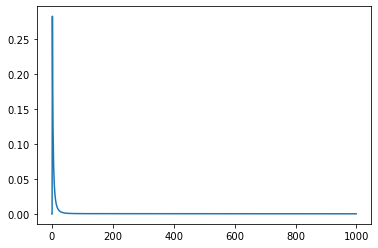

In [4]:
plt.plot(range(len(df_original.iloc[1000:2000,8])), df_original.iloc[1000:2000, 8])

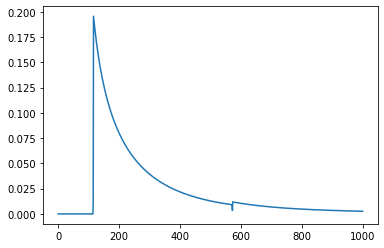

In [5]:
plt.plot(range(len(df_bm.iloc[1000:2000,8])), df_bm.iloc[1000:2000, 8])

In [ ]:
↽−−

In [8]:
gas = ct.Solution('original_2000/base_modified_pt.yaml', 'gas')
surf = ct.Interface('original_2000/base_modified_pt.yaml', 'surface1', [gas])

def eliminate_index(rxns):
    """
    This function eliminate the indices after species in
    a reaction
    rxns:a list of cantera reaction objects
    """
    new_rxn_list = []
    for rxn in rxns:
        new_r = []
        element_num = []
        for num in range(10):
            element_num.append(str(num))
        for s in rxn.equation.split():
            if len(s) != 1 and s != '<=>':
                s = s.replace('_', '')
                s = re.sub(r'\(\d+\)','', s)
                s = s.replace('X', 'Pt')
                s_l = list(s)
                new_str = [] 
                for element in s_l:
                    if element in element_num:
                        new_str.append('_')
                        new_str.append(element)
                    else:
                        new_str.append(element)
                new_r.append('$\mathregular{'+ ''.join(new_str) + '}$')
            elif s == '<=>':
                new_r.append('⇌')
            else:
                new_r.append('$\mathregular{' + f'{s}' +'}$')
        rxn_eq = ' '.join(new_r)
        rxn_eq =  rxn_eq
        new_rxn_list.append(rxn_eq) 
    return new_rxn_list

def compare_trends(ratio, rxn_id, property_id):
    '''
    This function plots the sensitivity change over the catalyst area for models with and without Blowers Masel approximation
    ratio: Carbon/Oxygen input ratio 0.6, 1.0, 1.2, 1.6, 2.0, 2.6 available
    rxn_id: reaction id in the model 0 to 106
    property_id: the id of the descriptor to be plotted
    '''
    f_o = f'/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_models_sim/original_2000/sens_trends/plot_data/{ratio}/kin_sens_trend_plot{rxn_id}.csv'
    f_b = f'/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_models_sim/bm_2000/sens_trends/plot_data/{ratio}/kin_sens_trend_plot{rxn_id}.csv'
    df_original = pd.read_csv(f_o)
    df_bm = pd.read_csv(f_b)
    y_or = df_original.iloc[1000:2000, property_id]
    y_bm = df_bm.iloc[1000:2000, property_id]
    plt.figure()
    plt.plot(range(1000, 2000), y_or, label = 'original')
    plt.plot(range(1000, 2000), y_bm, label='BMA')
    print(f'the absolute maximum index in original model is {np.abs(y_or).argmax() + 1000}, value ={y_or[np.abs(y_or).argmax() + 1000]}')
    print(f'the absolute maximum index in BMA model is {np.abs(y_bm).argmax() + 1000}, value ={y_bm[np.abs(y_bm).argmax() + 1000]}')
    descriptor = df_original.columns[property_id]
    plt.xlabel('reactor indices')
    plt.ylabel('sensitivity value')
    plt.title(f'The sensitivity of {descriptor} for reaction {surf.reaction(rxn_id)} comparison at C/O={ratio} between origianl and BMA models on catalyst area')
    plt.legend()
    plt.show()

def compare_sens(ratio, property_id, bm_pos, or_pos, top):
    '''
    This function plots the sensitivity change over the catalyst area for models with and without Blowers Masel approximation
    ratio: Carbon/Oxygen input ratio 0.6, 1.0, 1.2, 1.6, 2.0, 2.6 available
    property_id: the id of the descriptor to be plotted
    bm_pos: postion to compare the sensitvity for Blowers-Masel models
    or_pos: position to compare the sensitivity for original models
    top: top rxns to plot the sensitivity values
    '''
    sens_bm = []
    sens_or = []
    for rxn_id in range(107):
        f_o = f'/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_models_sim/original_2000/sens_trends/plot_data/{ratio}/kin_sens_trend_plot{rxn_id}.csv'
        f_b = f'/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_models_sim/bm_2000/sens_trends/plot_data/{ratio}/kin_sens_trend_plot{rxn_id}.csv'
        df_original = pd.read_csv(f_o)
        df_bm = pd.read_csv(f_b)
        y_or = df_original.iloc[or_pos, property_id]
        y_bm = df_bm.iloc[bm_pos, property_id]
        sens_or.append(y_or)
        sens_bm.append(y_bm)
    sens_or = np.array(sens_or)
    sens_bm = np.array(sens_bm)
    title_name = df_bm.columns[property_id]
    print(title_name)
    sens_values_or = []
    sens_values_bm =[]
    rxn_eqs = []
    # rank sens values based on original model
    order = np.array(np.abs(sens_or)).argsort()
    ranks = np.flip(order)
    for i in ranks[:top]:
        sens_values_or.append(sens_or[i])
        sens_values_bm.append(sens_bm[i])
        rxn_eqs.append(eliminate_index(surf.reactions())[i])

    plt.rcParams["figure.figsize"] = (20,10)
    plt.rcParams.update({'font.size': 24})
    # plt.subplot(1, 2, 1) # row 1, col 2 index 1
    fig, axs = plt.subplots(1, 2, sharey=True)
    ax1 = axs[0]
    ax2 = axs[1]
    ax1.barh(rxn_eqs, sens_values_or)
    # plt.title(f"CMPO Model at C/O={ratio}", fontsize=18)
    ax1.set(xlabel='sensitivity value', ylabel='Reactions')
    # plt.xlabel('sensitivity value', fontsize=18)
    # plt.ylabel('Reactions', fontsize=18)
    # plt.yticks(fontsize=18)
    # plt.xticks(fontsize=18)

    # plt.subplot(1, 2, 2) # index 2
    ax2.barh(rxn_eqs, sens_values_bm)
    ax2.set(xlabel='sensitivity value')
    # plt.title(f"BMA-CMPO Model at C/O={ratio}", fontsize=18)
    # plt.xlabel('sensitivity value', fontsize=18)
    # plt.ylabel('Reactions', fontsize=18)
    # plt.suptitle(f'{title_name} Comparison at C/O input = {ratio}', fontsize=20)
    # plt.yticks(fontsize=18)
    # plt.xticks(fontsize=18)
    plt.tight_layout()
    plt.savefig(f'kin_sens_plots/{ratio}_{title_name}_kin_sens.pdf')
    plt.show()

In [30]:
df_bm.columns

Index(['Reactions', 'Ratio', 'SYNGAS Selec', 'SYNGAS Yield', 'CO Selectivity',
       'CO % Yield', 'H2 Selectivity', 'H2 % Yield', 'CH4 Conversion',
       'H2O+CO2 Selectivity', 'H2O+CO2 yield', 'Exit Temp', 'Peak Temp',
       'Dist to peak temp', 'O2 Conversion', 'Max CH4 Conv',
       'Dist to 50 CH4 Conv'],
      dtype='object')

SYNGAS Selec


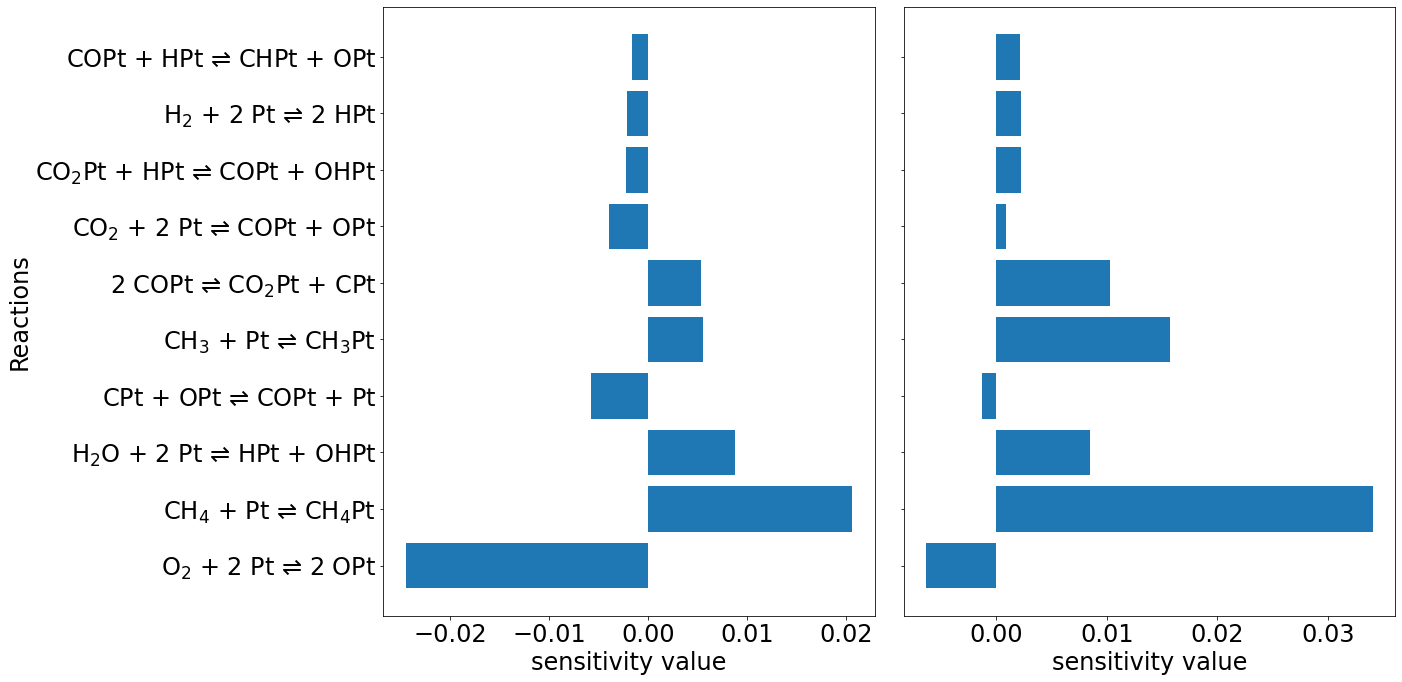

In [9]:
compare_sens(0.6, 2, 1500, 1500, 10)

CH4 Conversion


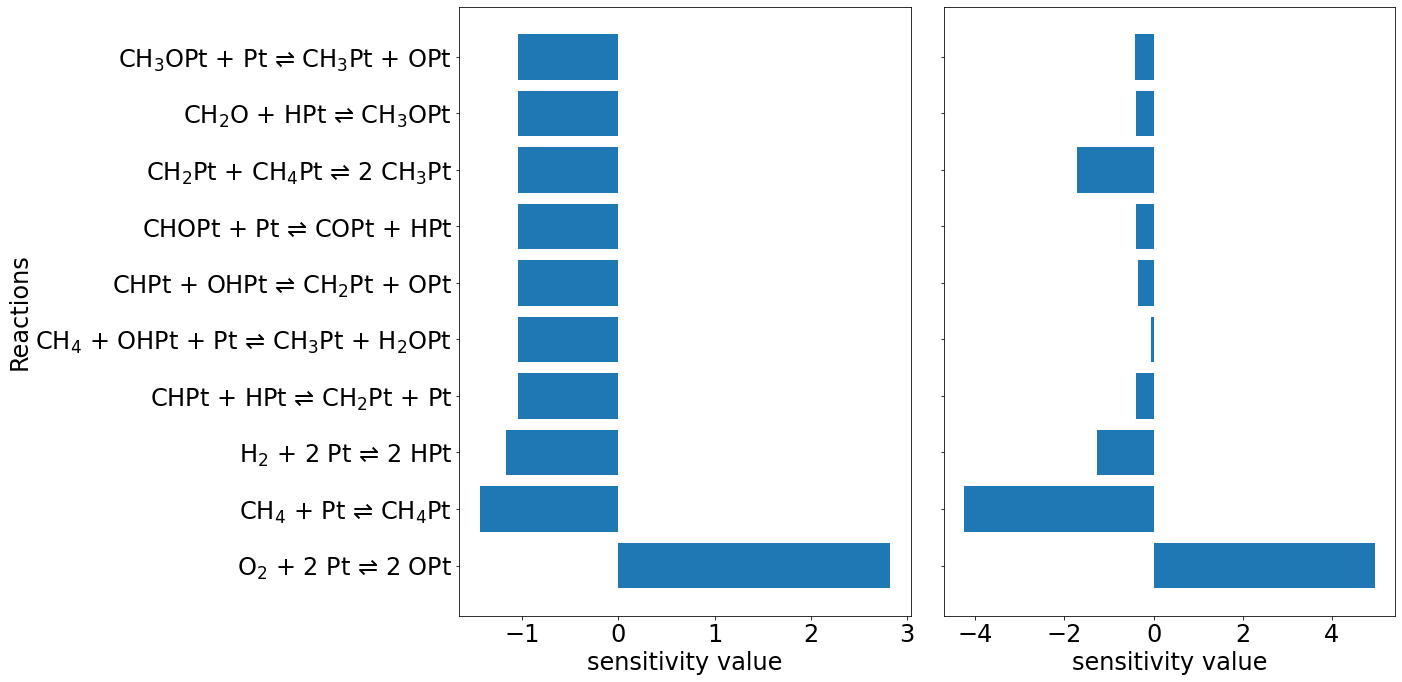

In [10]:
compare_sens(1.0, 8, 1045, 1045, 10)

CH4 Conversion


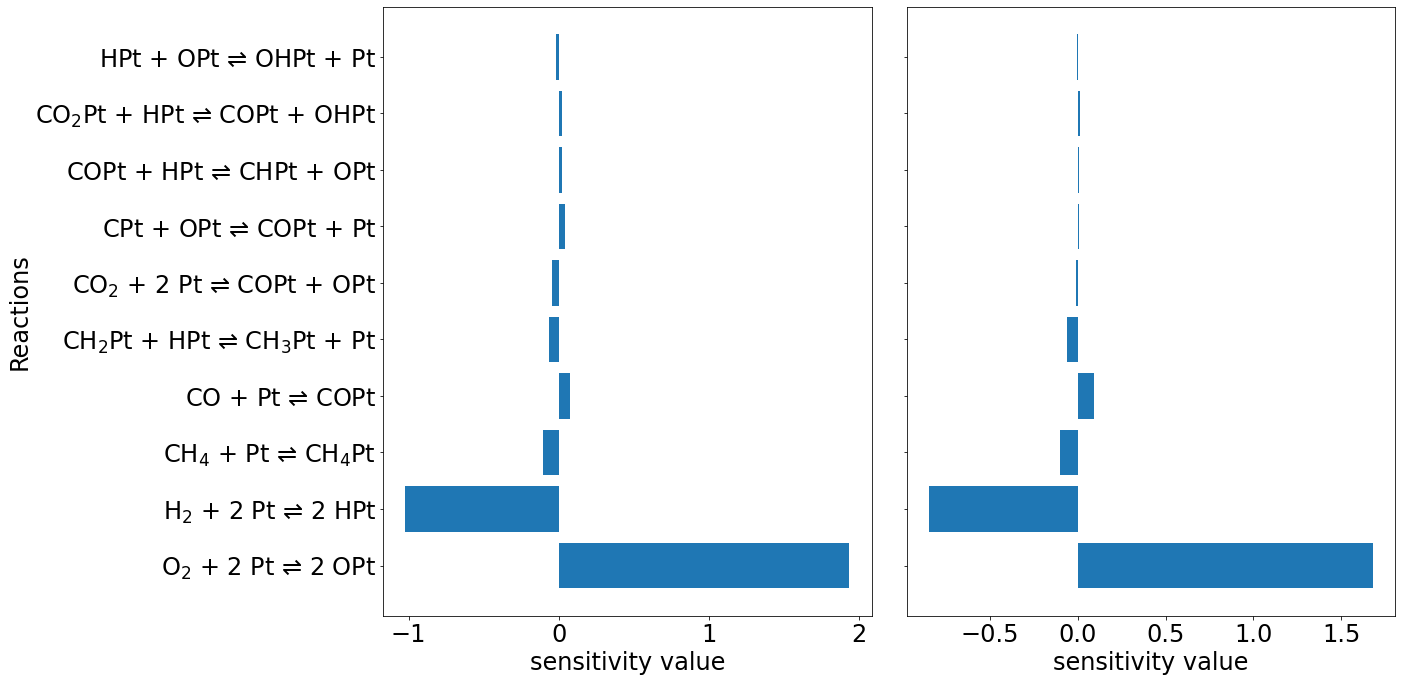

In [11]:
compare_sens(2.6, 8, 1045, 1045, 10)

Peak Temp


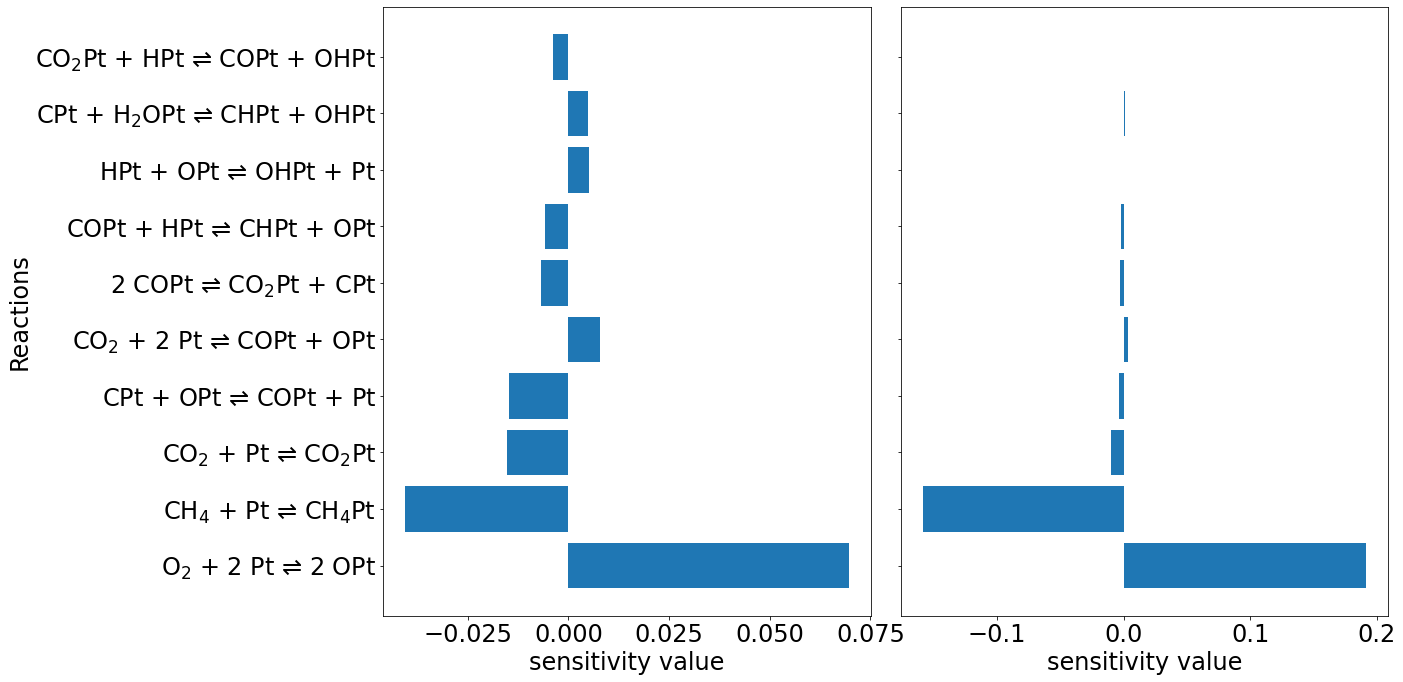

In [12]:
compare_sens(1.0, 12, 1100, 1100, 10)

Peak Temp


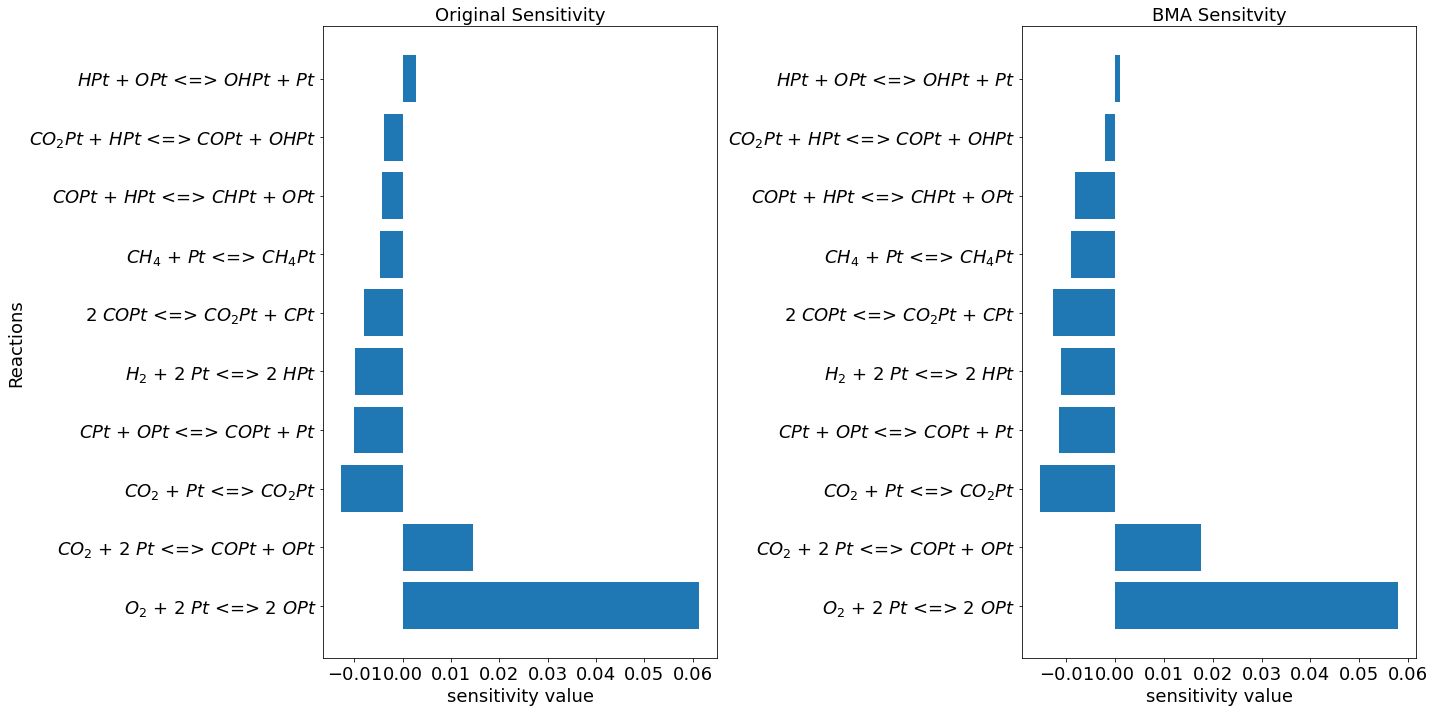

In [55]:
compare_sens(2.6, 12, 1100, 1100, 10)

the absolute maximum index in original model is 1000, value =-0.003506959926172513
the absolute maximum index in BMA model is 1000, value =-0.004766745461388067


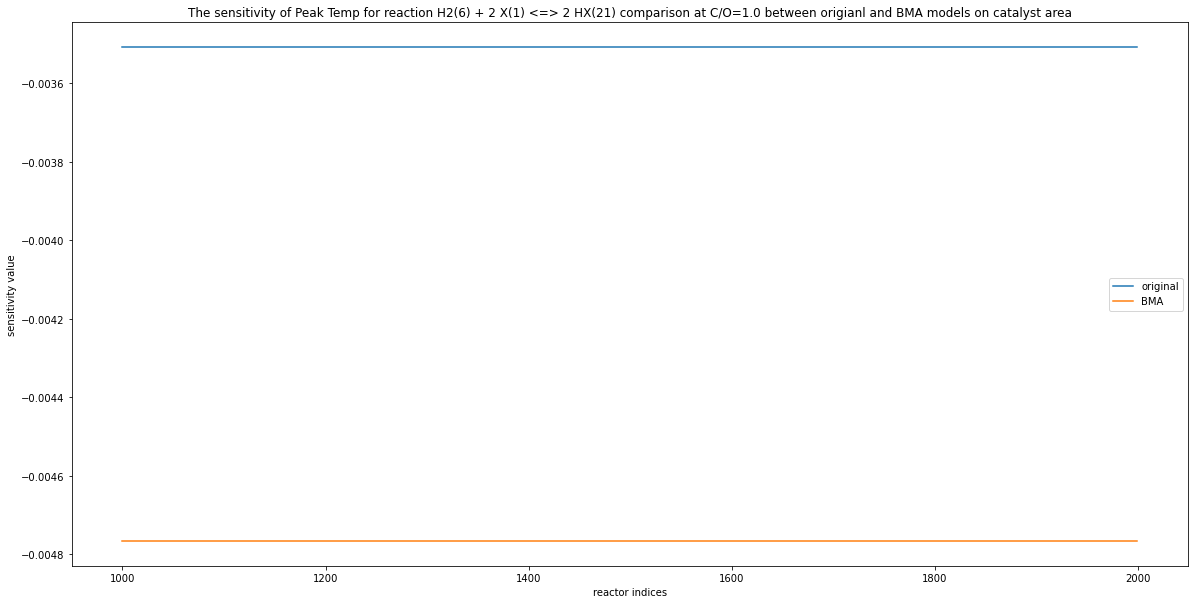

the absolute maximum index in original model is 1000, value =0.0001346629738469044
the absolute maximum index in BMA model is 1000, value =2.7324928730271925e-05


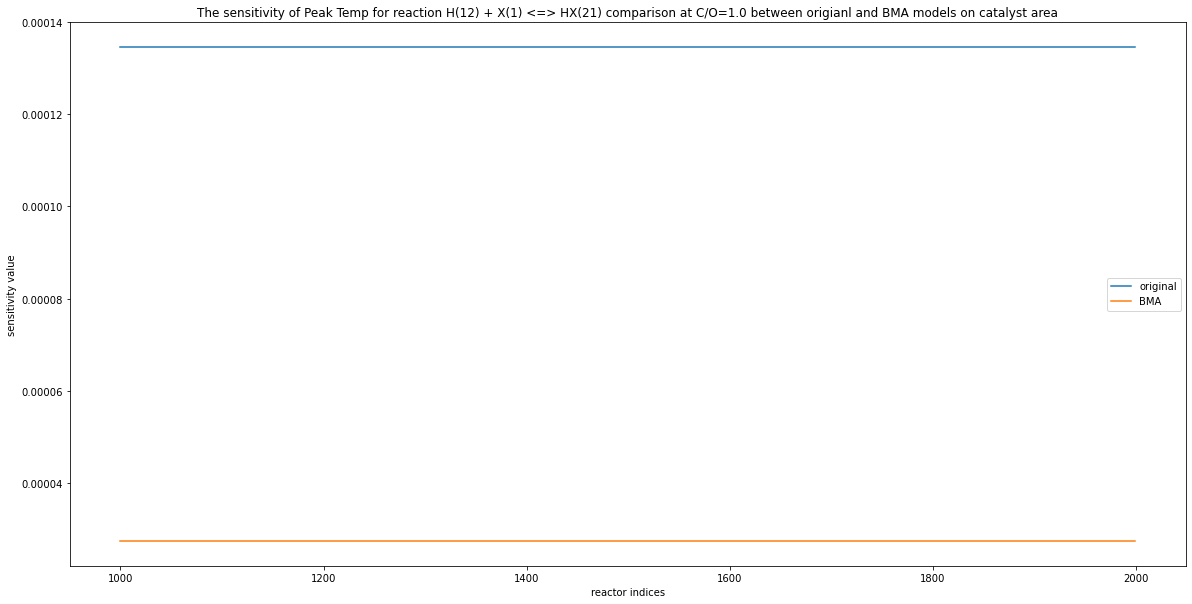

the absolute maximum index in original model is 1000, value =-0.015142184647440028
the absolute maximum index in BMA model is 1000, value =-0.009704577578850085


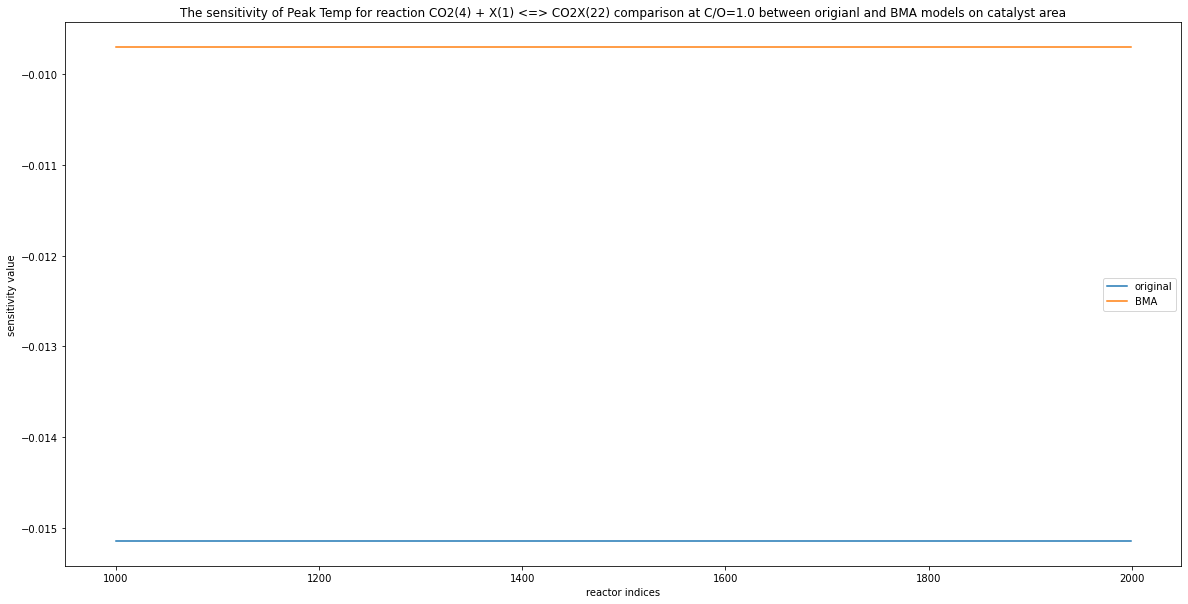

the absolute maximum index in original model is 1000, value =0.0001302014077953431
the absolute maximum index in BMA model is 1000, value =0.00019642452626234824


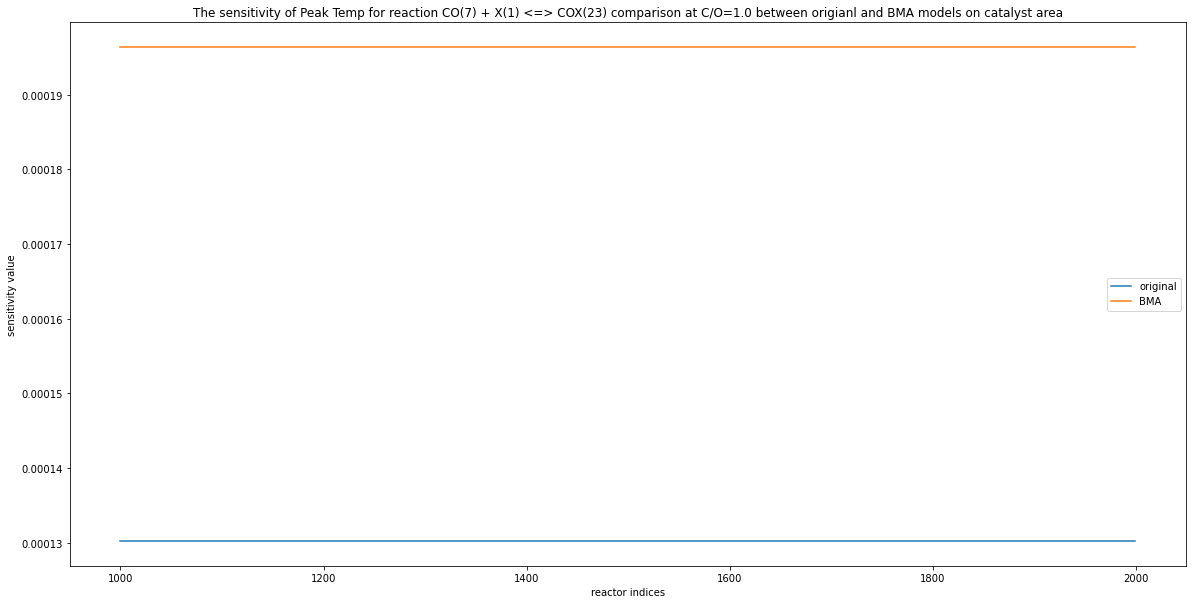

the absolute maximum index in original model is 1000, value =0.06968897486246423
the absolute maximum index in BMA model is 1000, value =0.1917627689970808


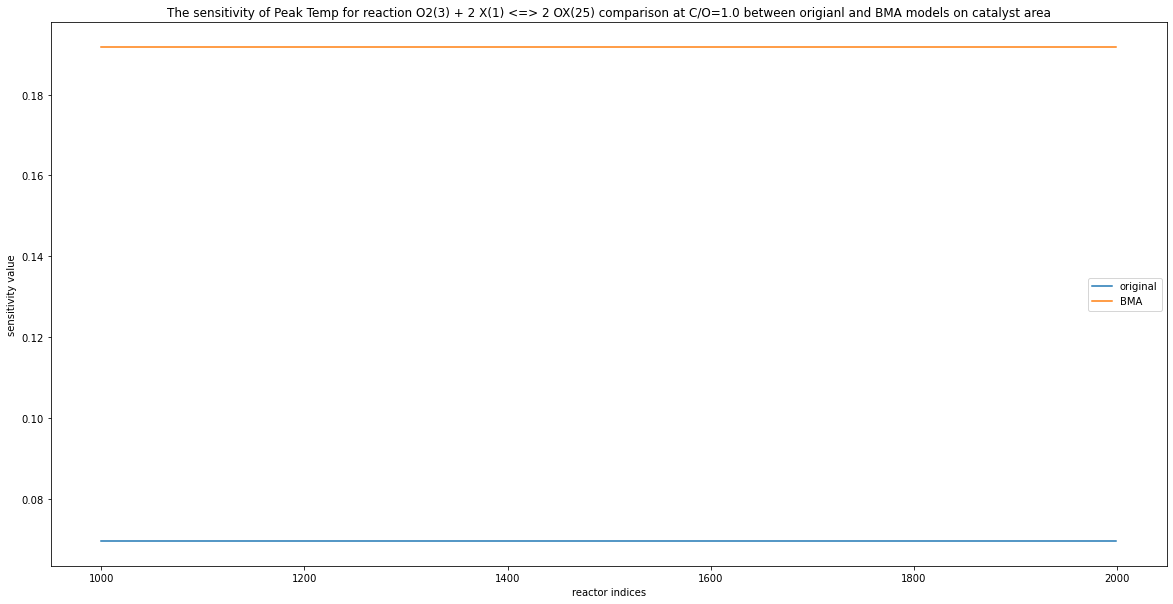

the absolute maximum index in original model is 1000, value =1.796615897447602e-05
the absolute maximum index in BMA model is 1000, value =-2.444149502460585e-05


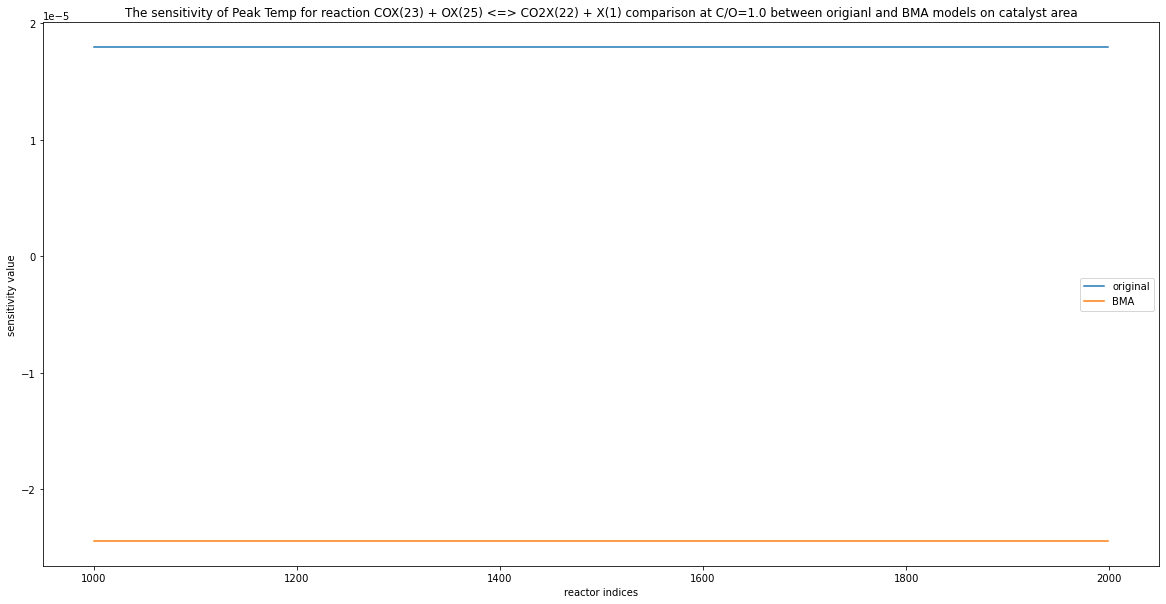

the absolute maximum index in original model is 1000, value =5.772641431635393e-05
the absolute maximum index in BMA model is 1000, value =-2.0555141935027037e-05


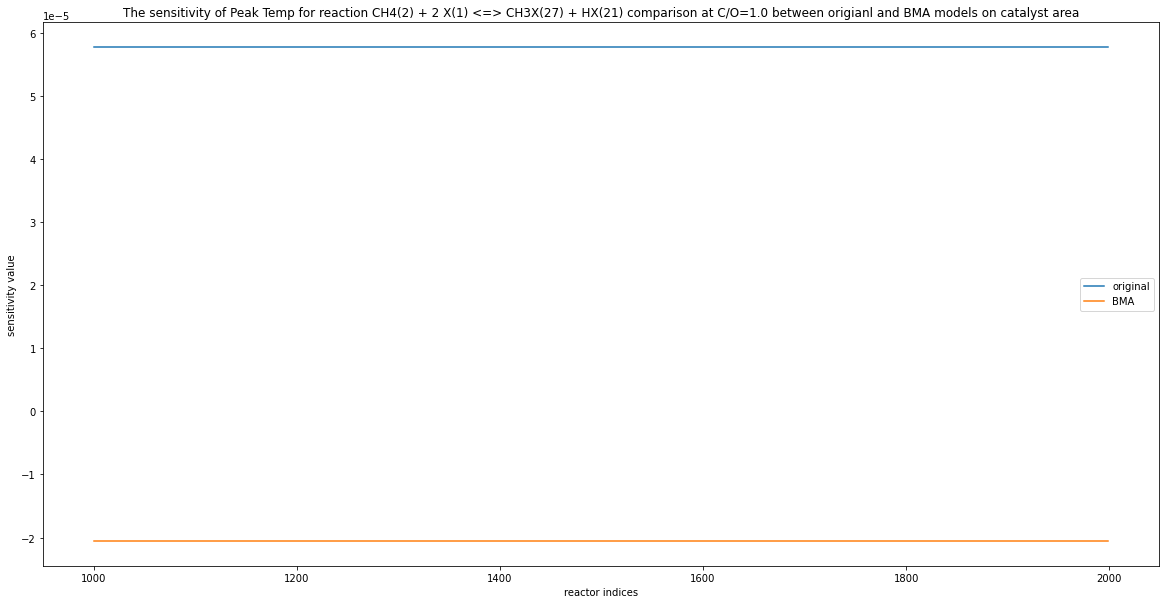

the absolute maximum index in original model is 1000, value =-0.0011874565041638965
the absolute maximum index in BMA model is 1000, value =-0.0033464337107603275


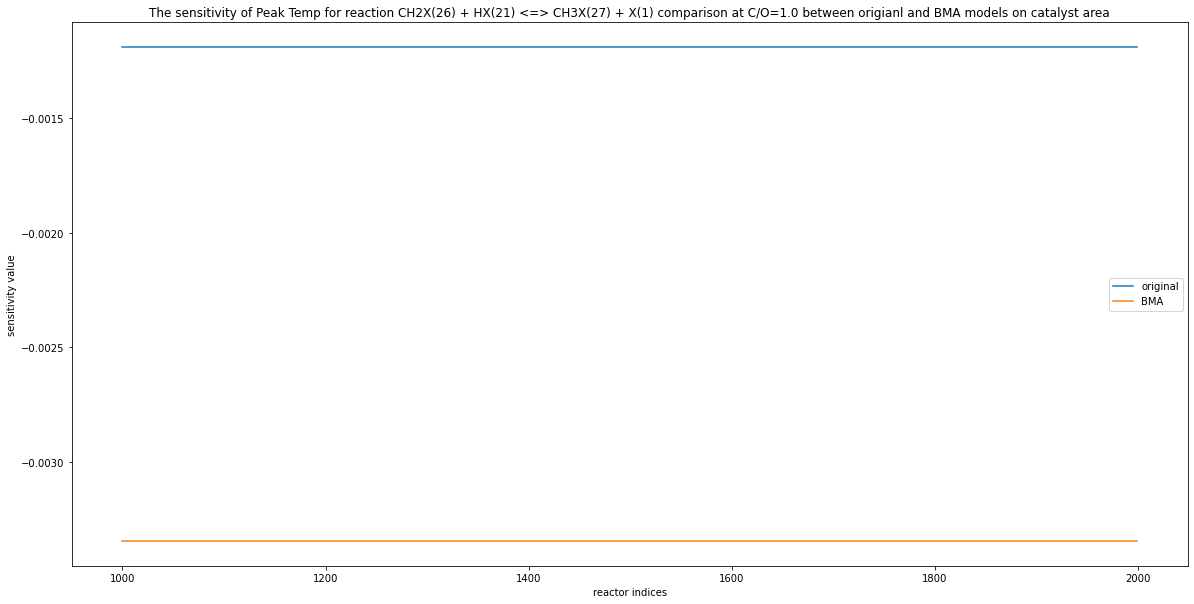

the absolute maximum index in original model is 1000, value =-1.740336089921817e-05
the absolute maximum index in BMA model is 1000, value =7.777138857528822e-06


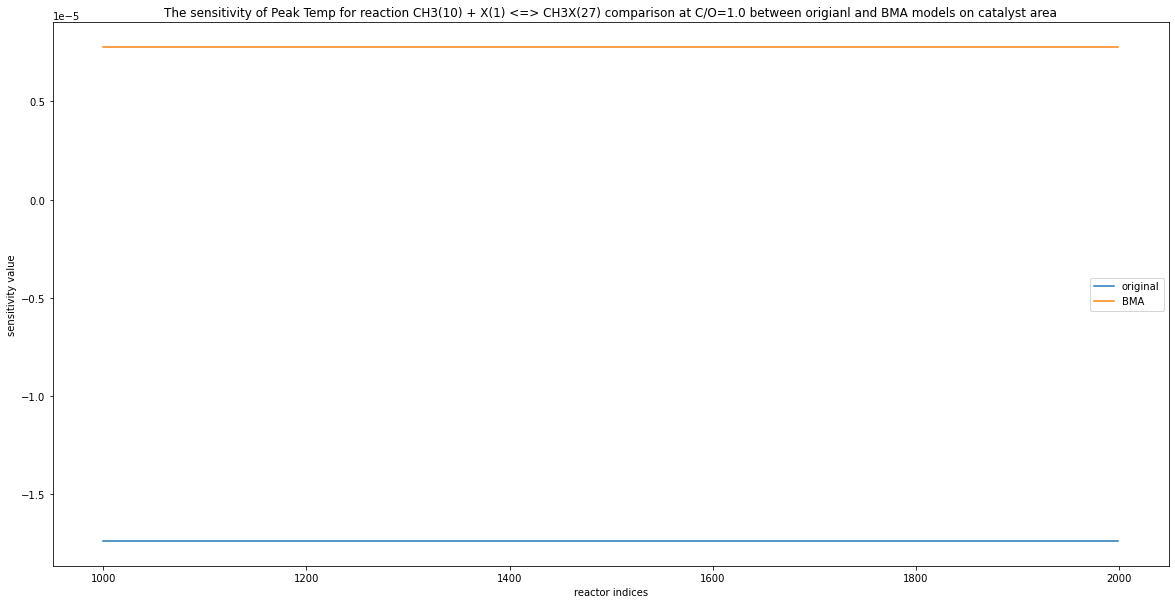

the absolute maximum index in original model is 1000, value =8.360911854664402e-05
the absolute maximum index in BMA model is 1000, value =-3.115907524976021e-05


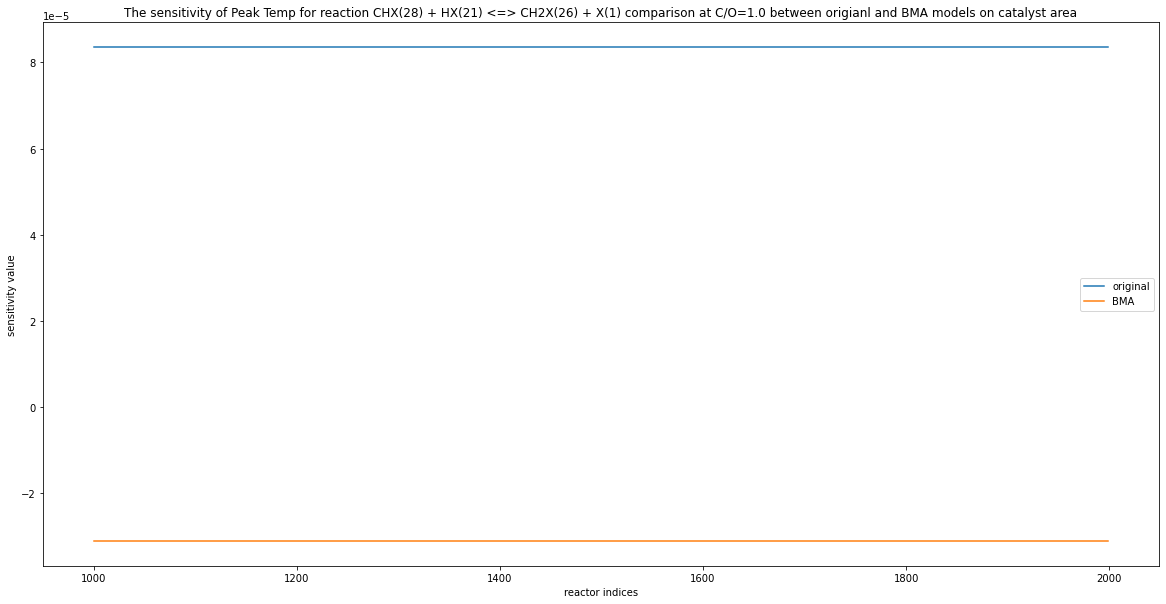

the absolute maximum index in original model is 1000, value =-0.005839971456620557
the absolute maximum index in BMA model is 1000, value =-0.0019009690950586421


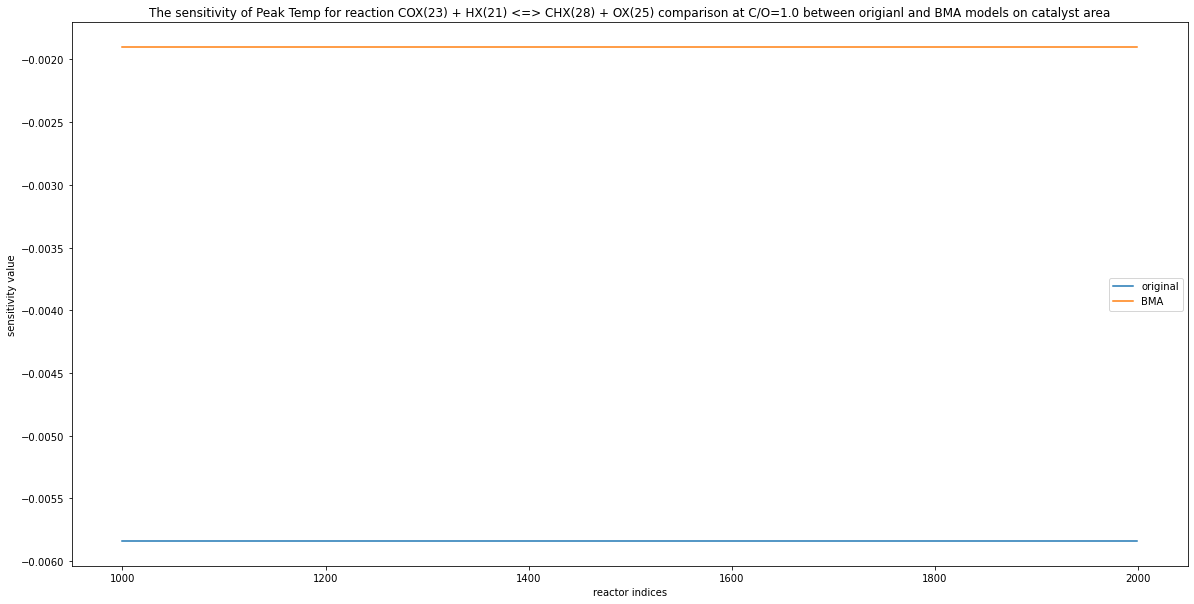

the absolute maximum index in original model is 1000, value =-0.01486845289485429
the absolute maximum index in BMA model is 1000, value =-0.0037564643464133756


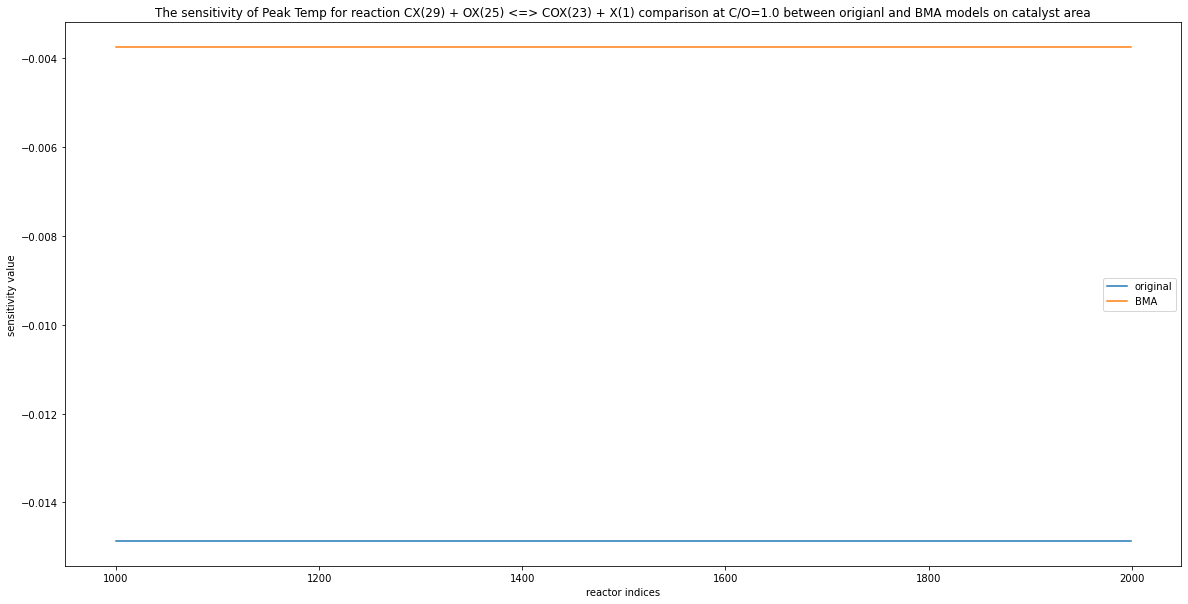

the absolute maximum index in original model is 1000, value =5.991717557778395e-05
the absolute maximum index in BMA model is 1000, value =5.414105522086472e-06


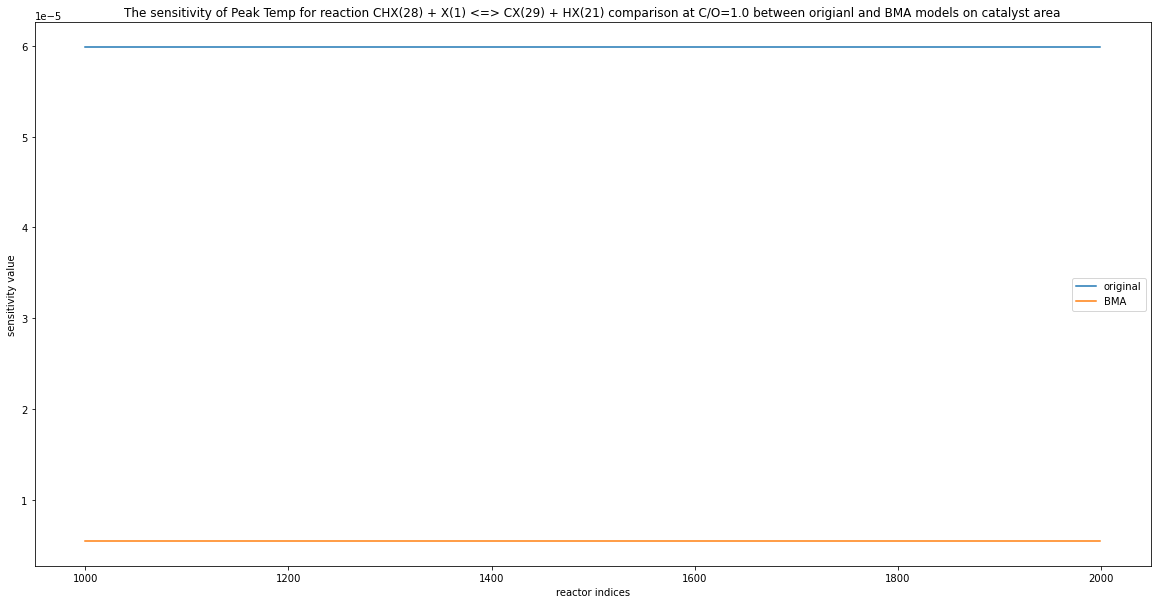

the absolute maximum index in original model is 1000, value =-1.851275962476264e-05
the absolute maximum index in BMA model is 1000, value =7.102593188925345e-07


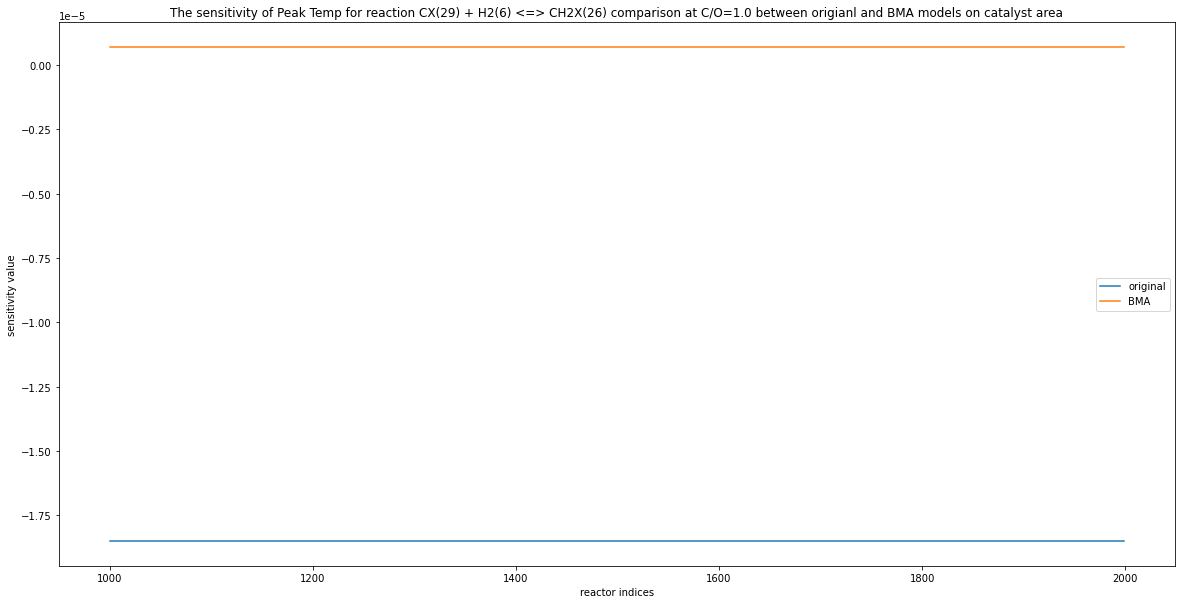

the absolute maximum index in original model is 1000, value =-0.0069080045609117
the absolute maximum index in BMA model is 1000, value =-0.002945572924169988


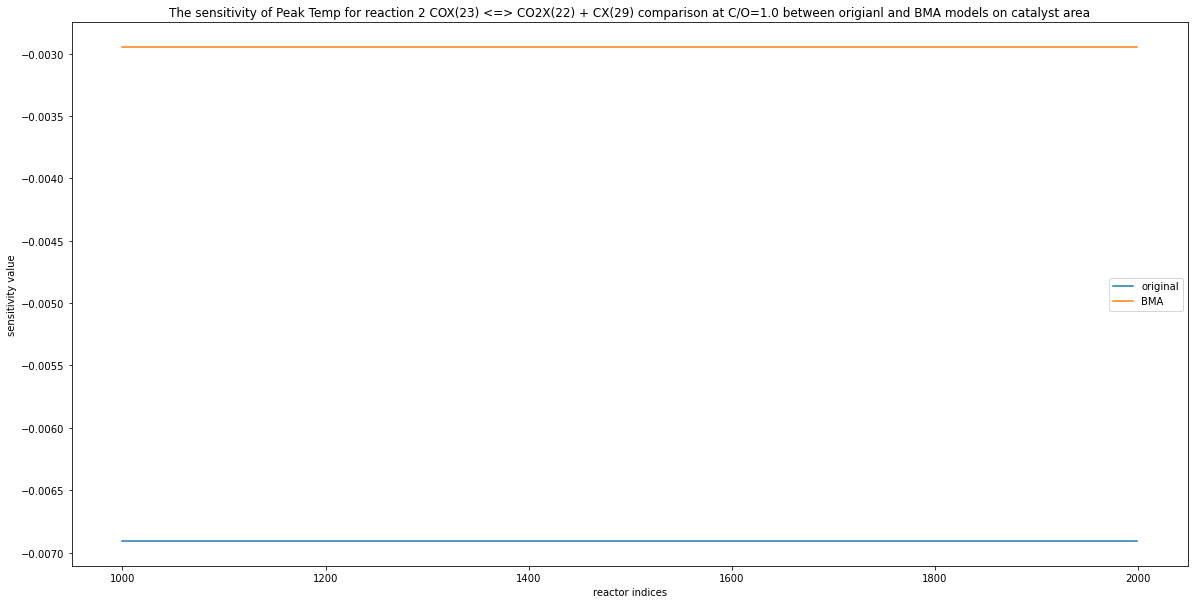

the absolute maximum index in original model is 1000, value =1.7739333668383414e-05
the absolute maximum index in BMA model is 1000, value =8.754914102831733e-05


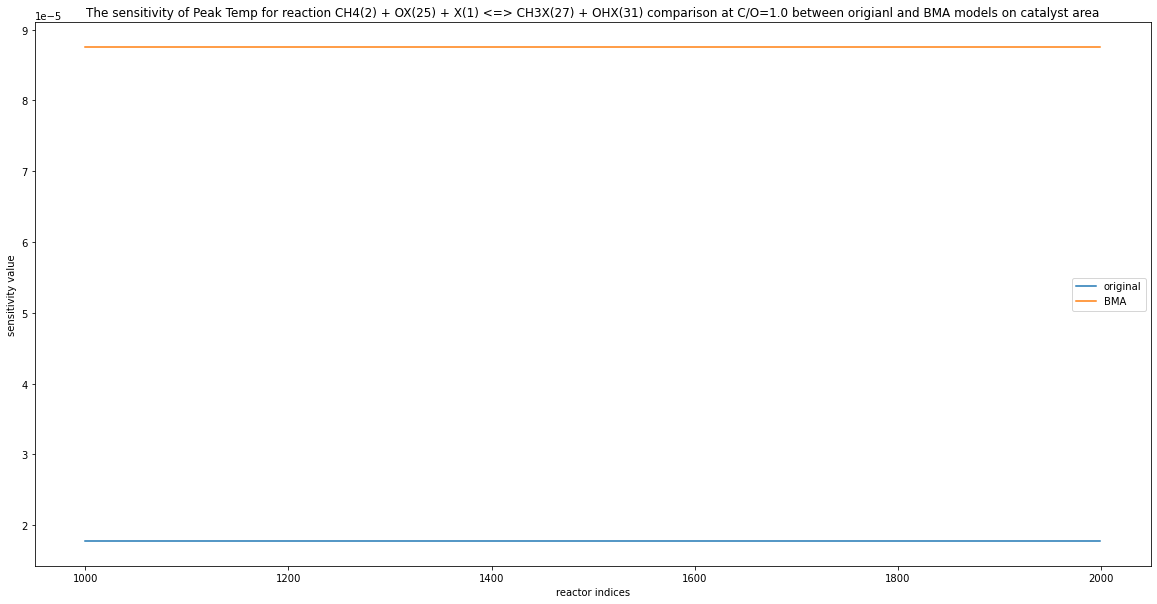

the absolute maximum index in original model is 1000, value =-0.003794108099078672
the absolute maximum index in BMA model is 1000, value =0.00014412010080062958


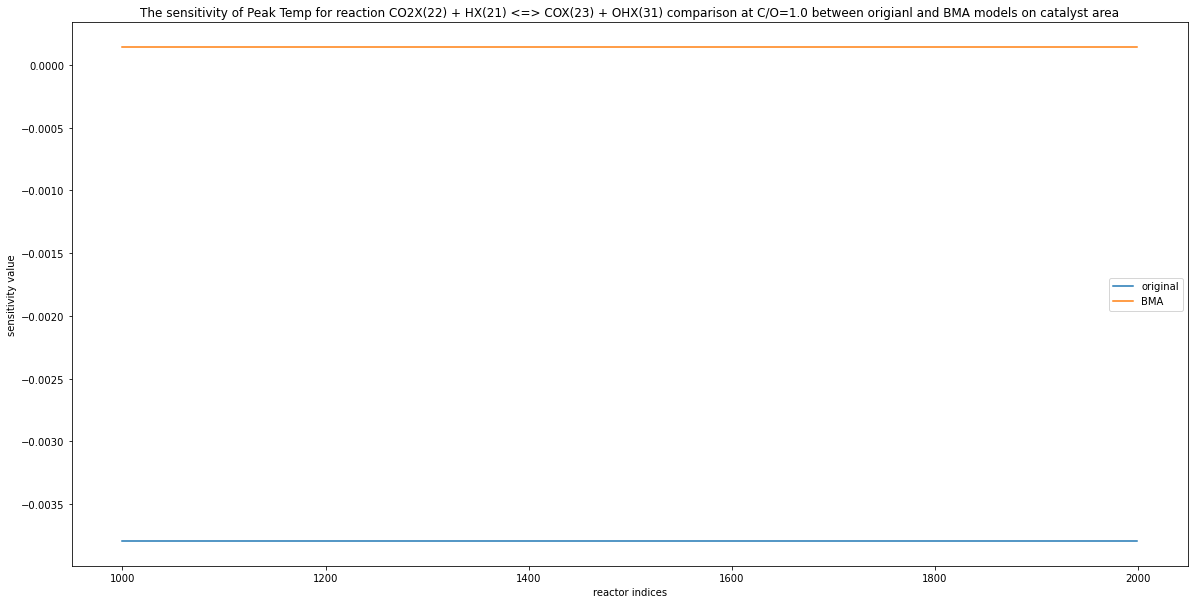

the absolute maximum index in original model is 1000, value =0.005039921658299786
the absolute maximum index in BMA model is 1000, value =0.0005747107540345143


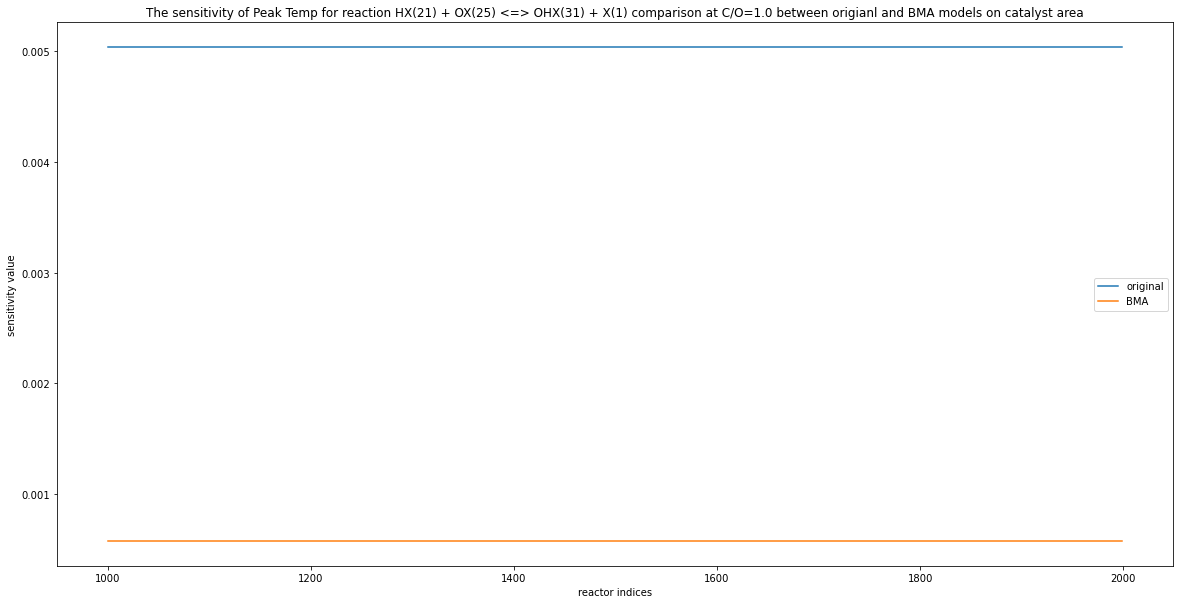

the absolute maximum index in original model is 1000, value =-1.4766942018852084e-05
the absolute maximum index in BMA model is 1000, value =1.904830767467628e-05


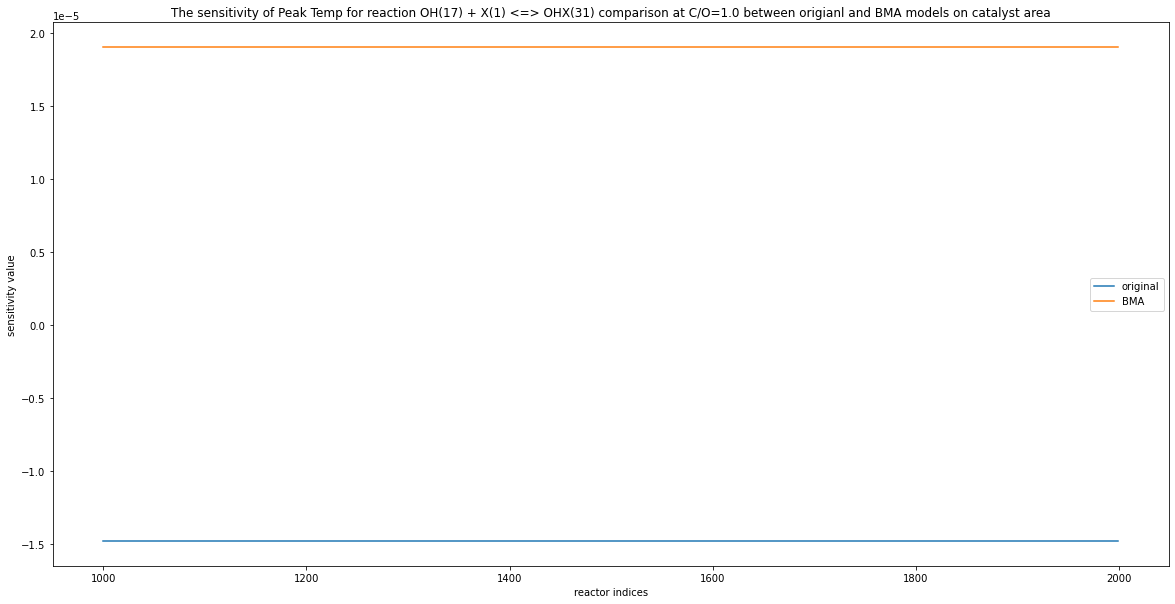

the absolute maximum index in original model is 1000, value =9.245319384015364e-05
the absolute maximum index in BMA model is 1000, value =-1.4503193883239582e-05


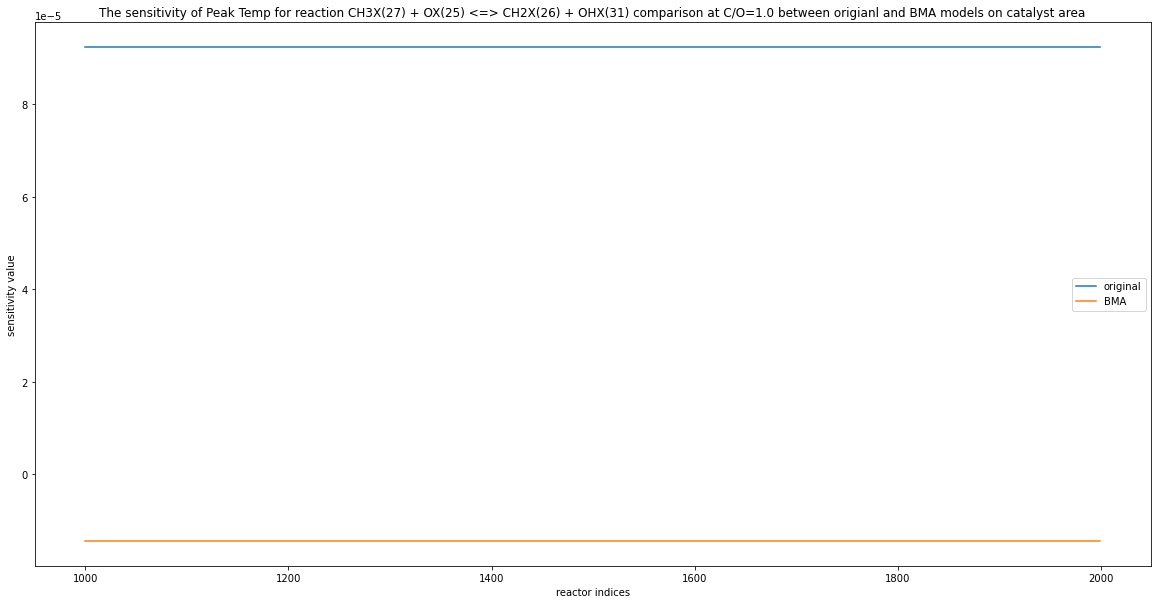

the absolute maximum index in original model is 1000, value =9.24505172539294e-05
the absolute maximum index in BMA model is 1000, value =7.147002399546553e-05


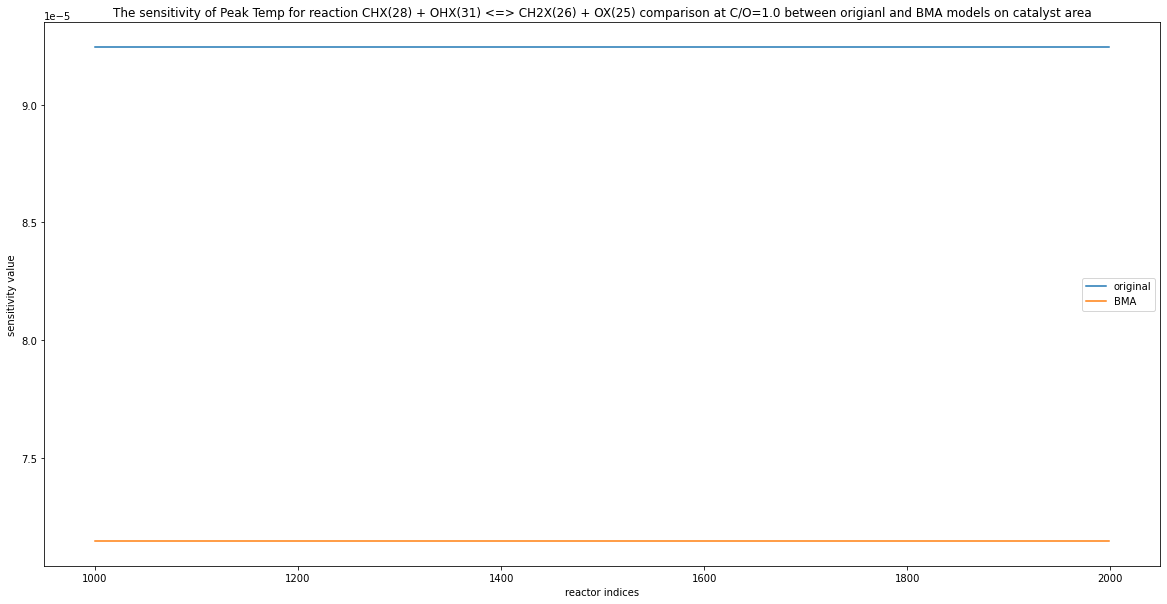

the absolute maximum index in original model is 1000, value =8.184026354562799e-05
the absolute maximum index in BMA model is 1000, value =-1.4502174373371454e-05


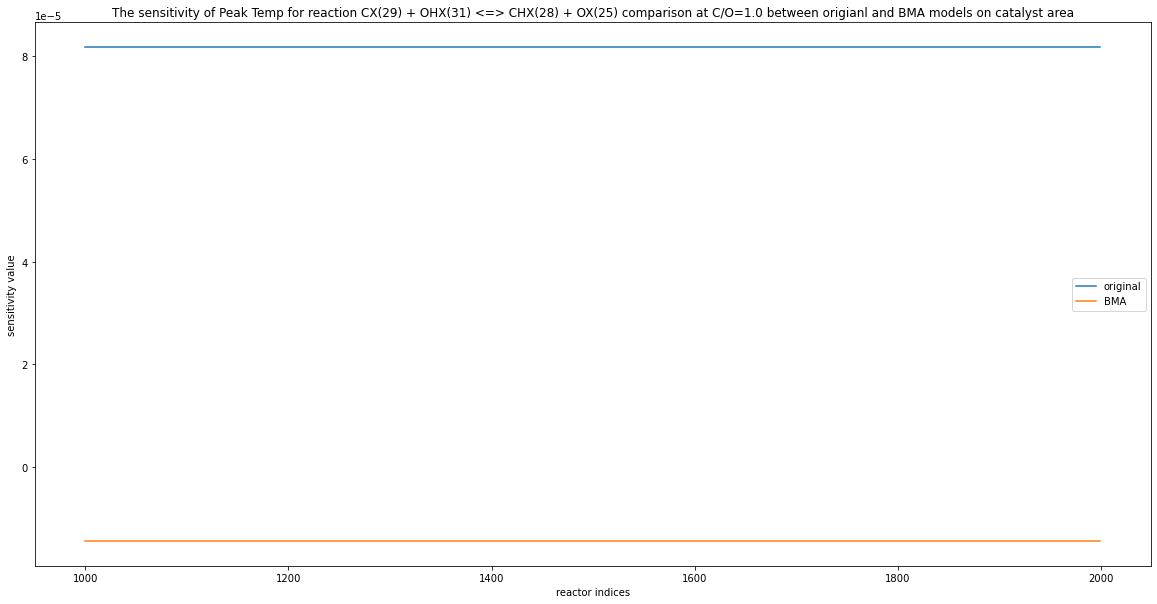

the absolute maximum index in original model is 1000, value =-0.00024323902825903223
the absolute maximum index in BMA model is 1000, value =-0.0001246813991181594


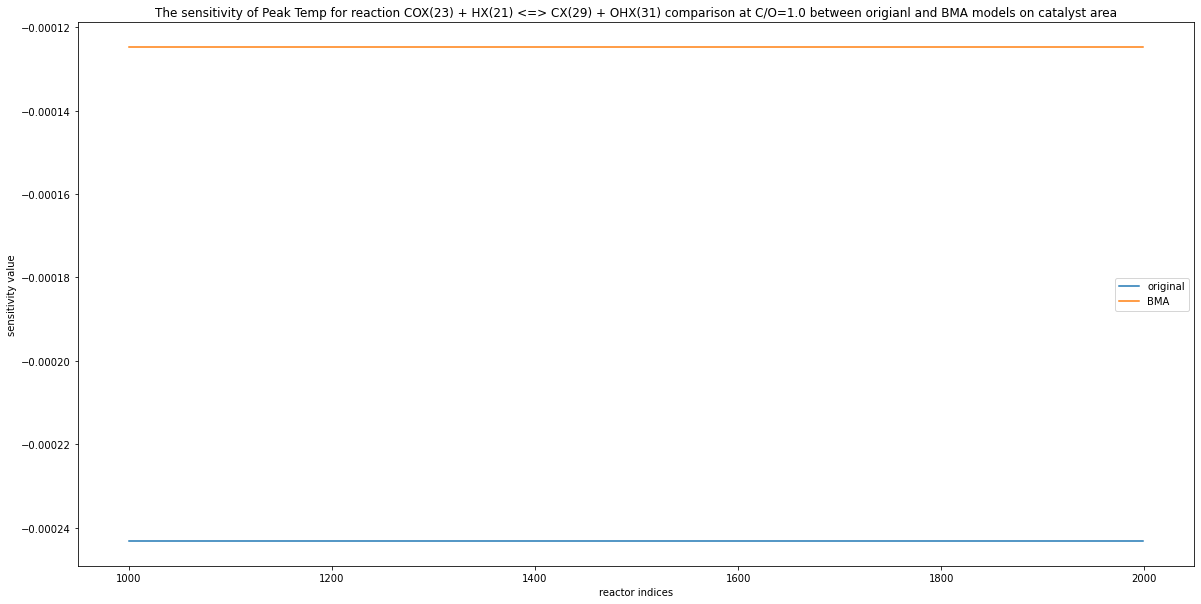

the absolute maximum index in original model is 1000, value =9.250543105631187e-05
the absolute maximum index in BMA model is 1000, value =1.220992044661906e-05


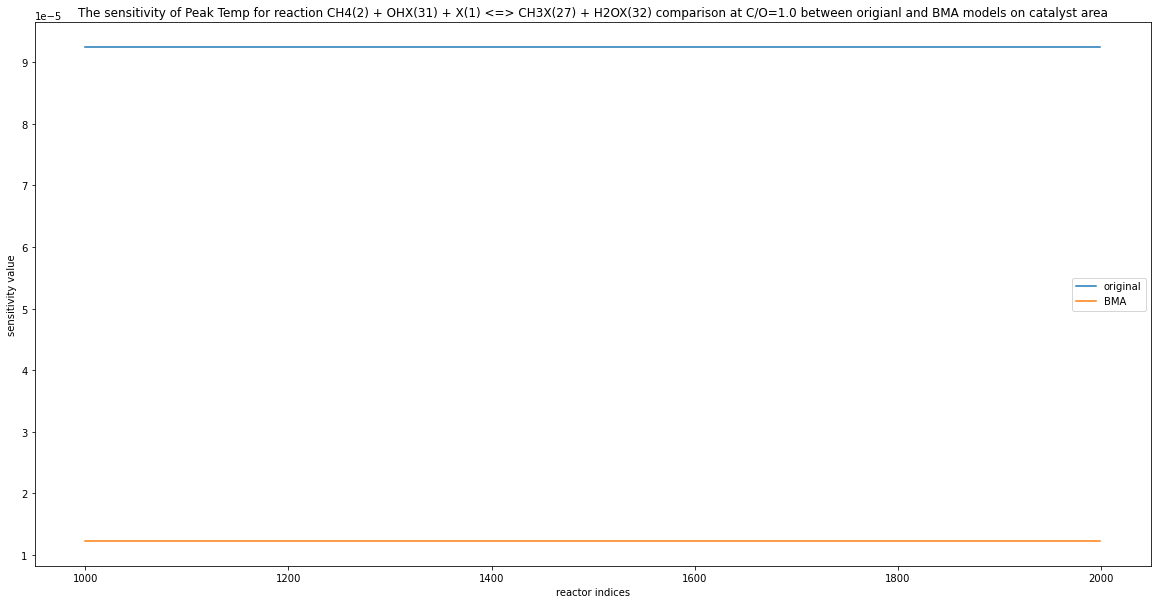

the absolute maximum index in original model is 1000, value =1.808632771223001e-05
the absolute maximum index in BMA model is 1000, value =3.385098503058423e-05


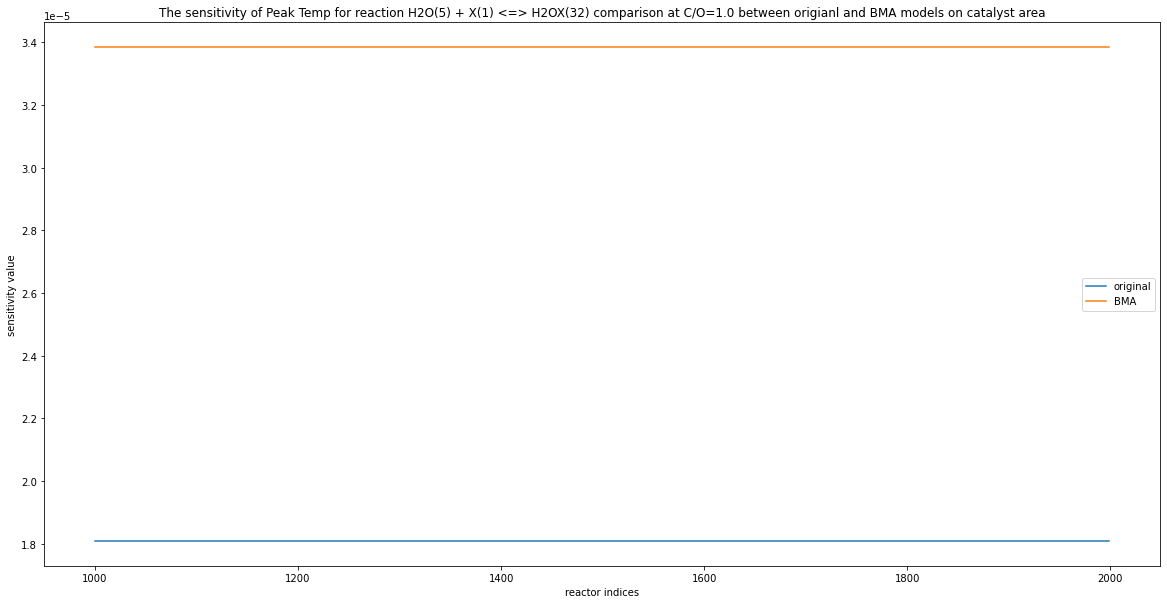

the absolute maximum index in original model is 1000, value =1.7738143229323826e-05
the absolute maximum index in BMA model is 1000, value =-2.514389347666759e-05


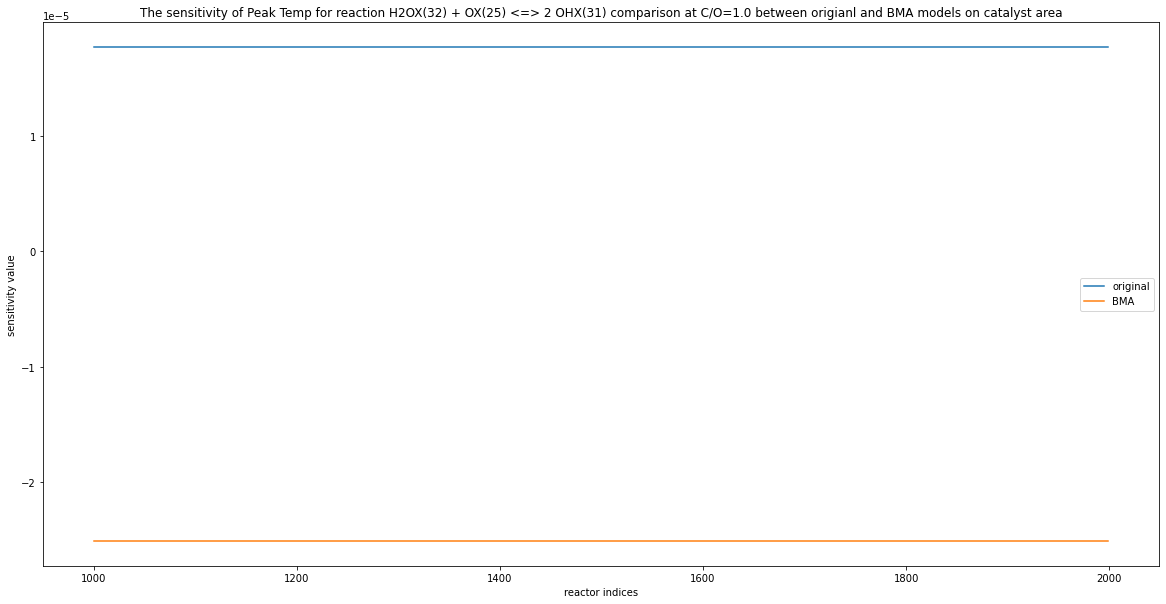

the absolute maximum index in original model is 1000, value =-1.41177489083162e-05
the absolute maximum index in BMA model is 1000, value =-2.4195706441122656e-05


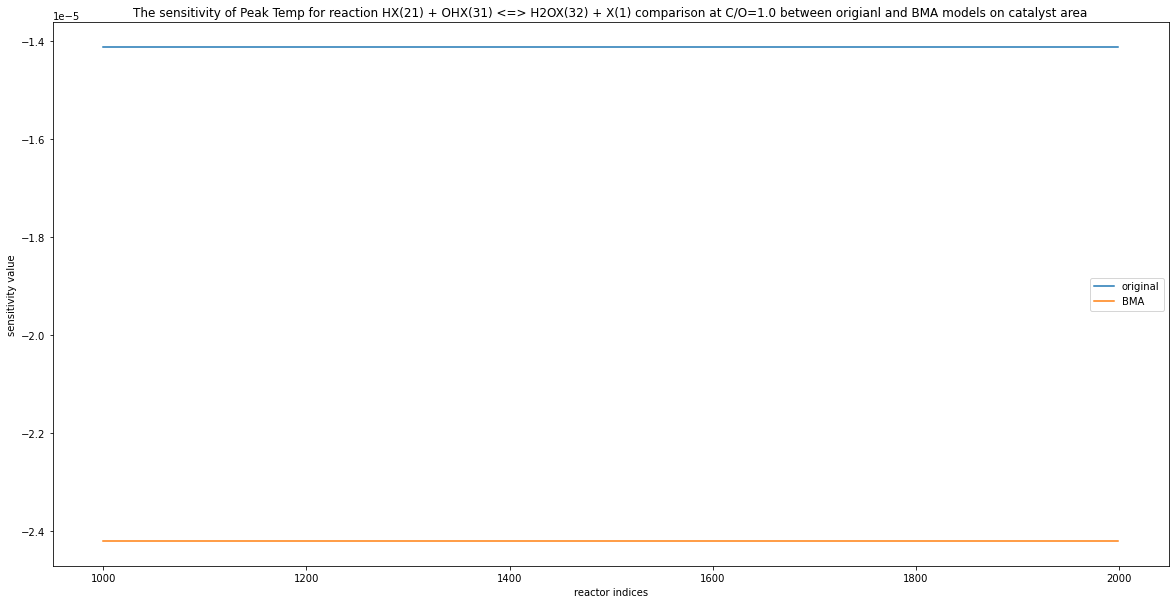

the absolute maximum index in original model is 1000, value =6.016016264340392e-05
the absolute maximum index in BMA model is 1000, value =5.798883758455067e-05


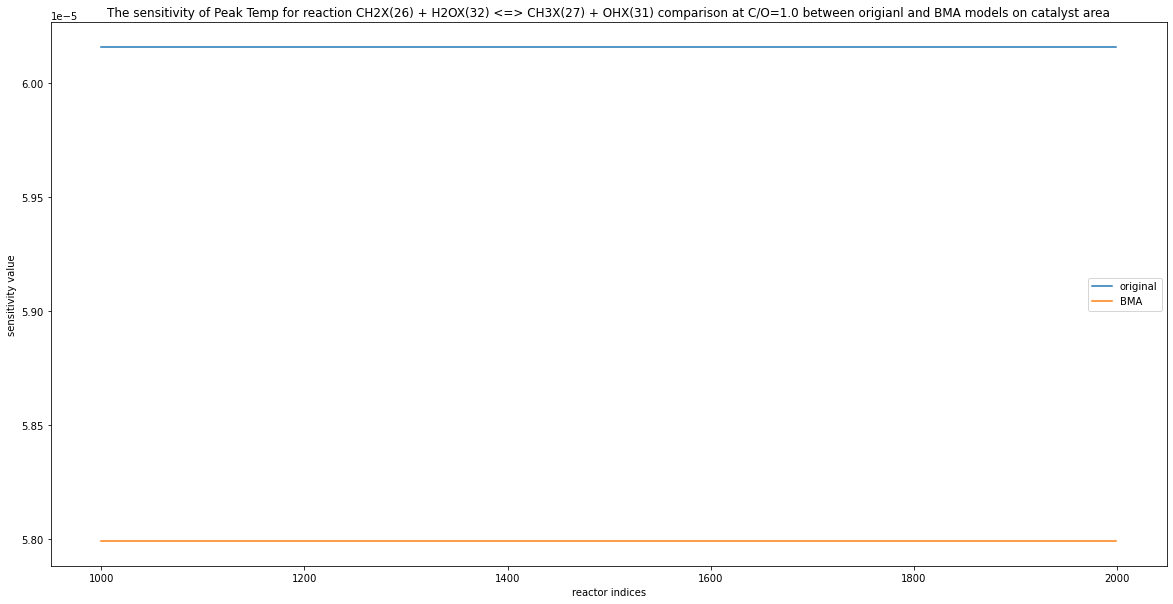

the absolute maximum index in original model is 1000, value =2.659158934321127e-05
the absolute maximum index in BMA model is 1000, value =5.217792195838941e-05


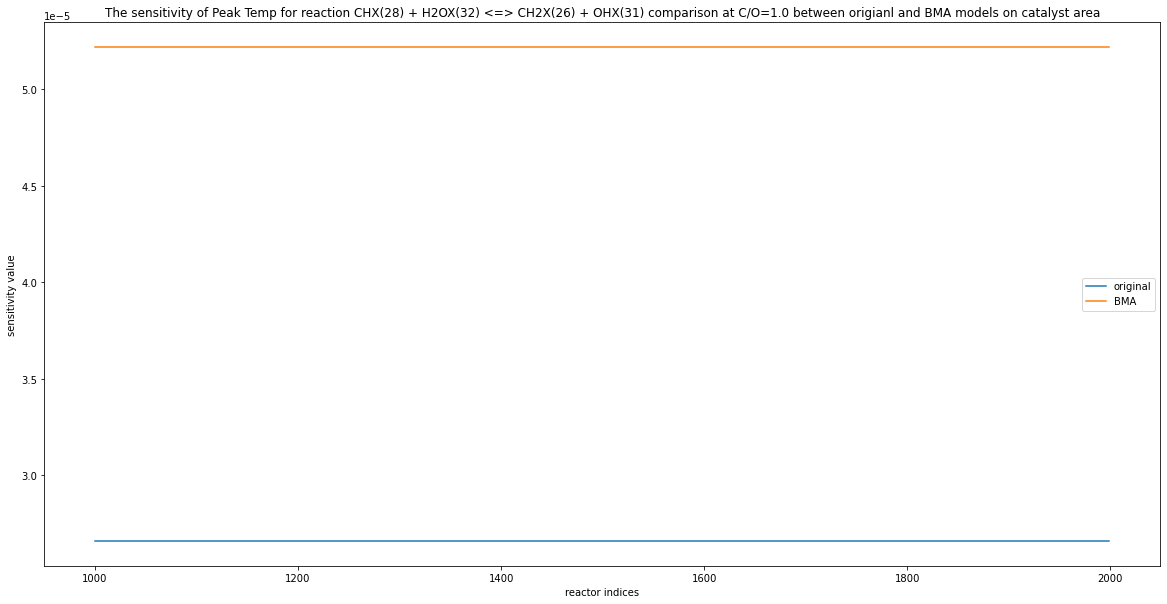

the absolute maximum index in original model is 1000, value =0.004980715197940152
the absolute maximum index in BMA model is 1000, value =0.001278120616979933


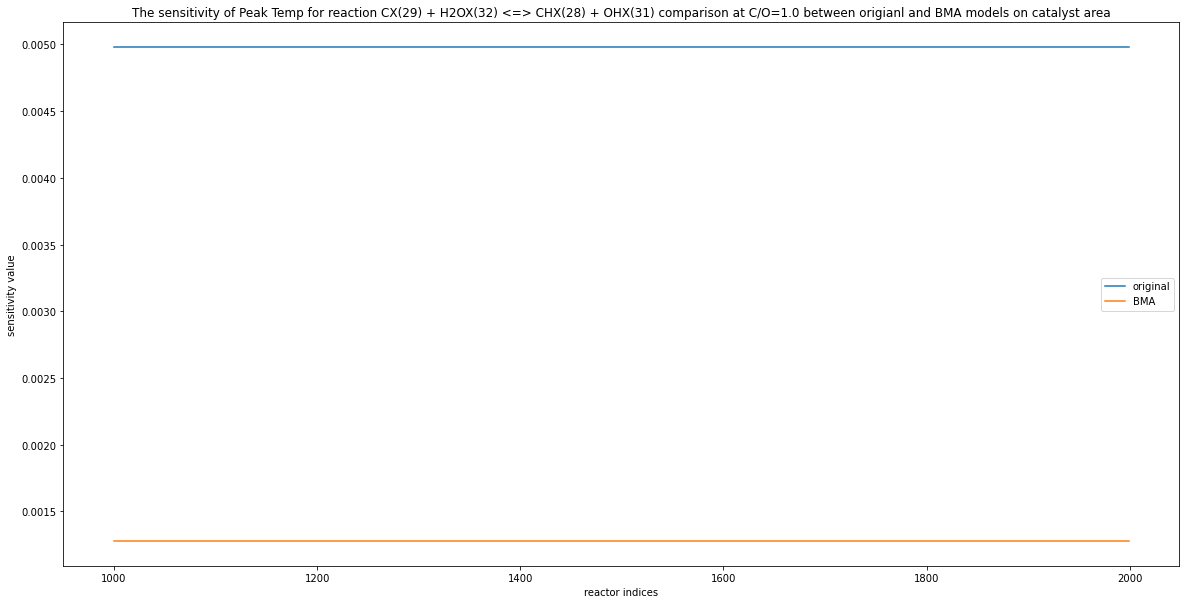

the absolute maximum index in original model is 1000, value =1.7736759026041558e-05
the absolute maximum index in BMA model is 1000, value =2.73240216928235e-05


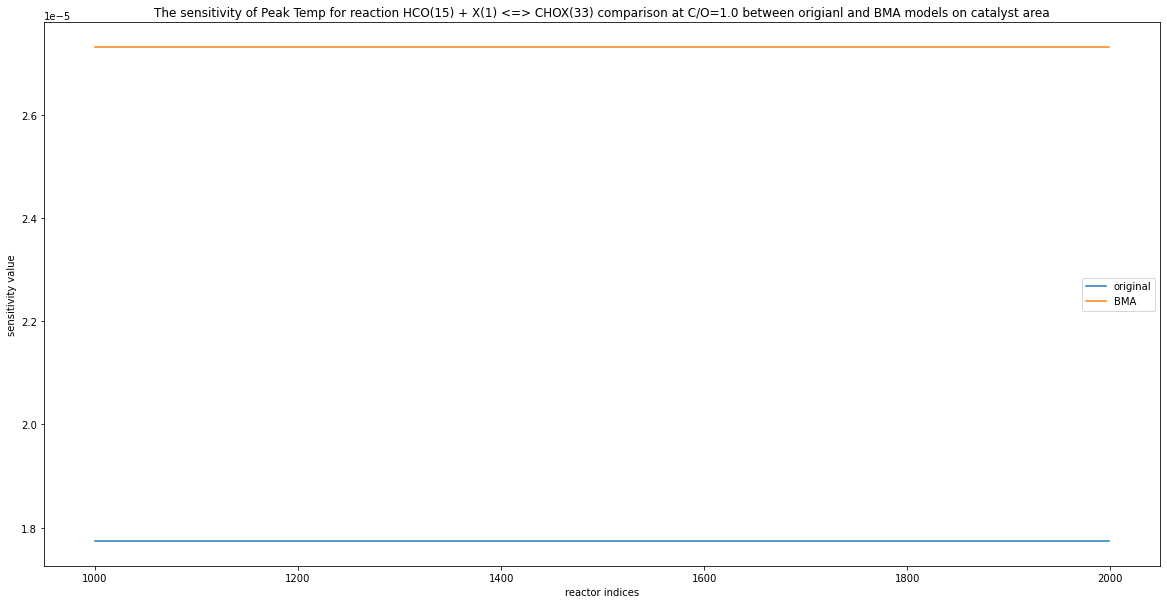

the absolute maximum index in original model is 1000, value =9.244598427482725e-05
the absolute maximum index in BMA model is 1000, value =4.967512518481625e-05


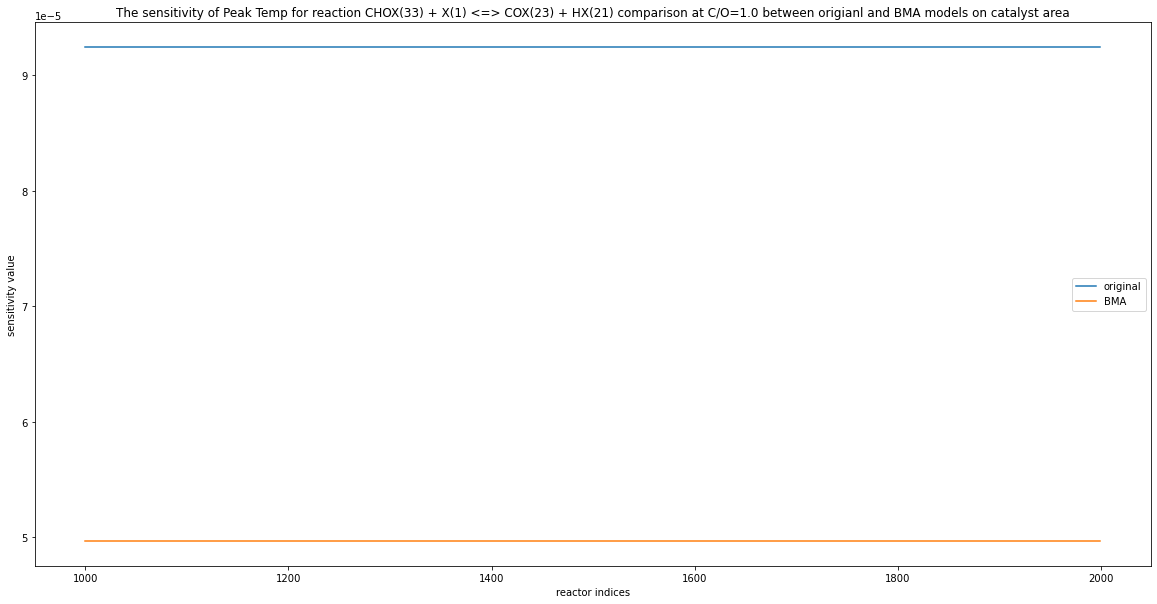

the absolute maximum index in original model is 1000, value =-0.04049116178682094
the absolute maximum index in BMA model is 1000, value =-0.15881557827204426


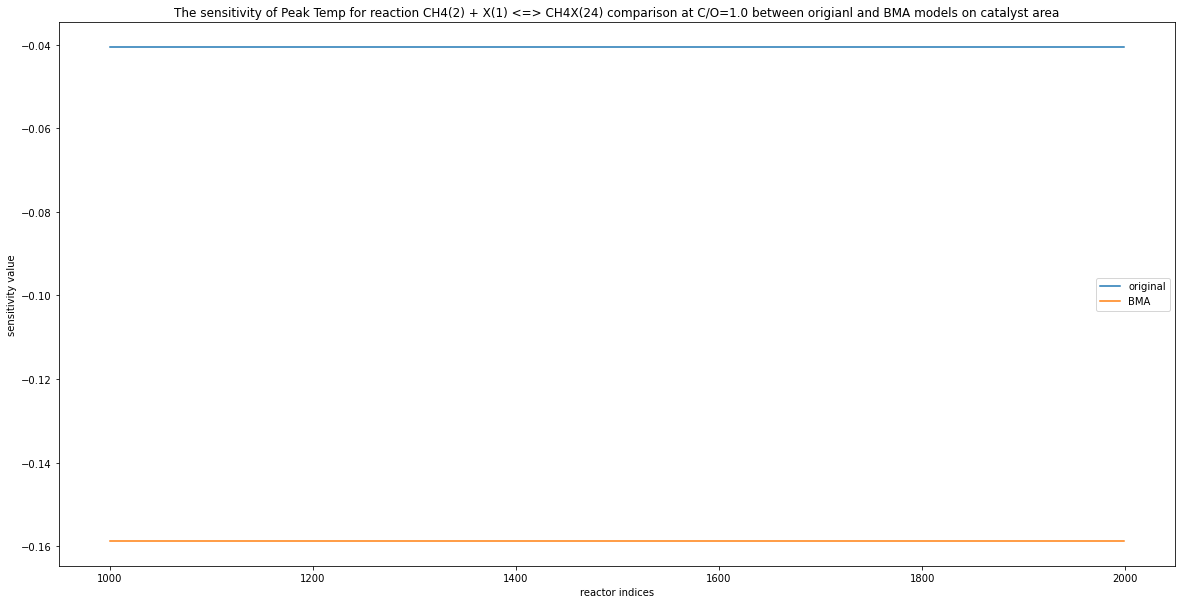

the absolute maximum index in original model is 1000, value =1.7812995767330938e-05
the absolute maximum index in BMA model is 1000, value =5.891225355854724e-06


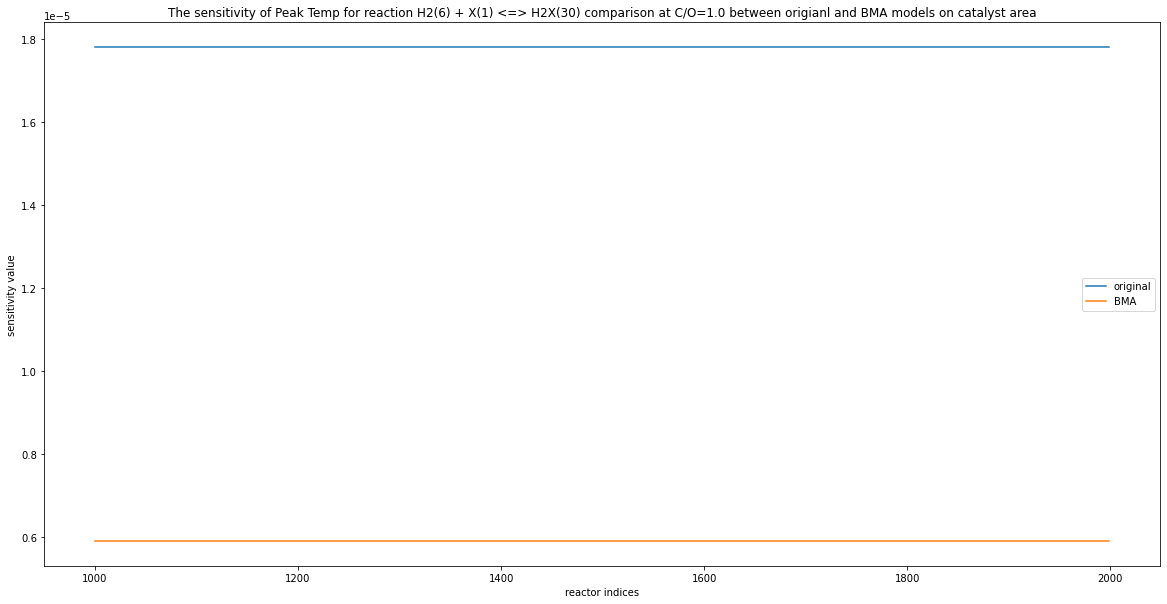

the absolute maximum index in original model is 1000, value =0.007752476096177497
the absolute maximum index in BMA model is 1000, value =0.0030829521304517717


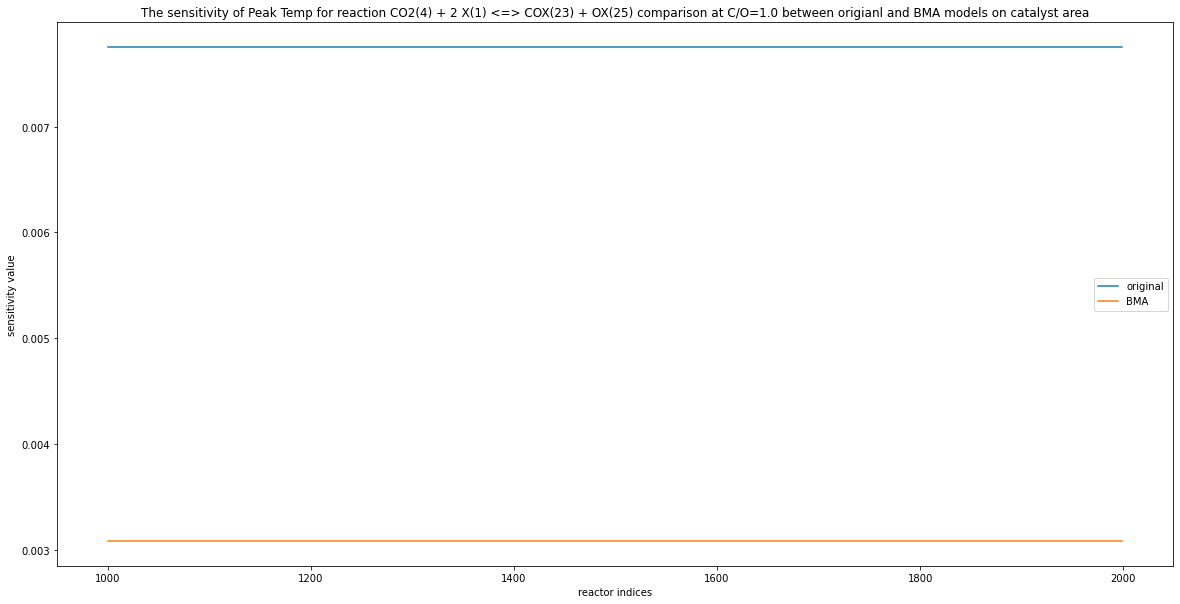

the absolute maximum index in original model is 1000, value =0.0036066955485357963
the absolute maximum index in BMA model is 1000, value =7.897988830568139e-05


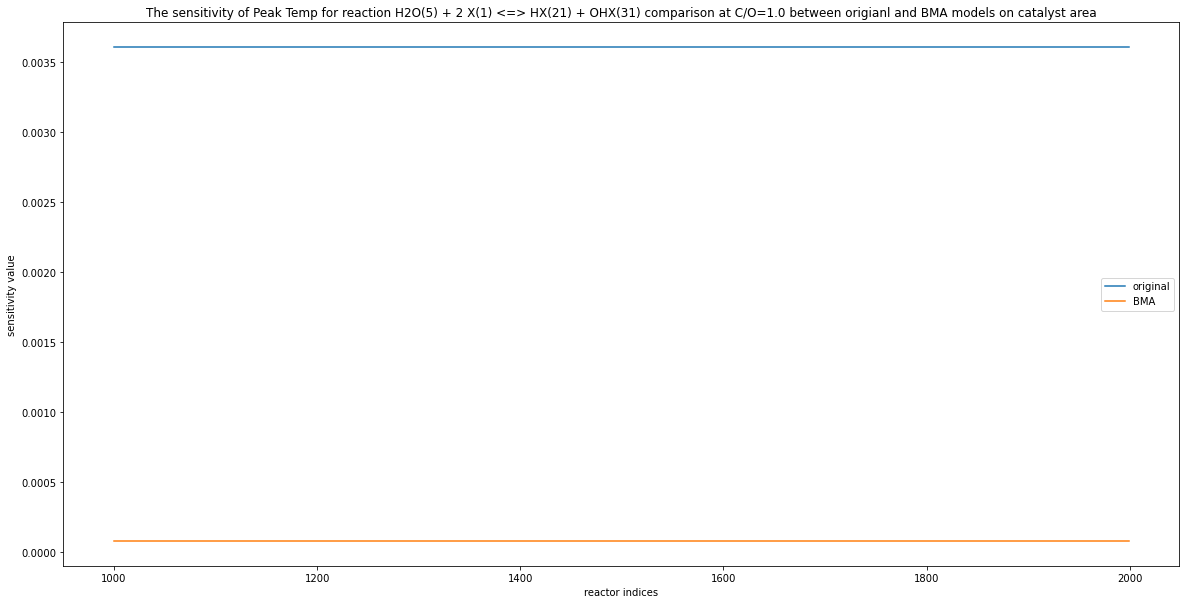

the absolute maximum index in original model is 1000, value =6.259226838380189e-05
the absolute maximum index in BMA model is 1000, value =-2.362260733135137e-05


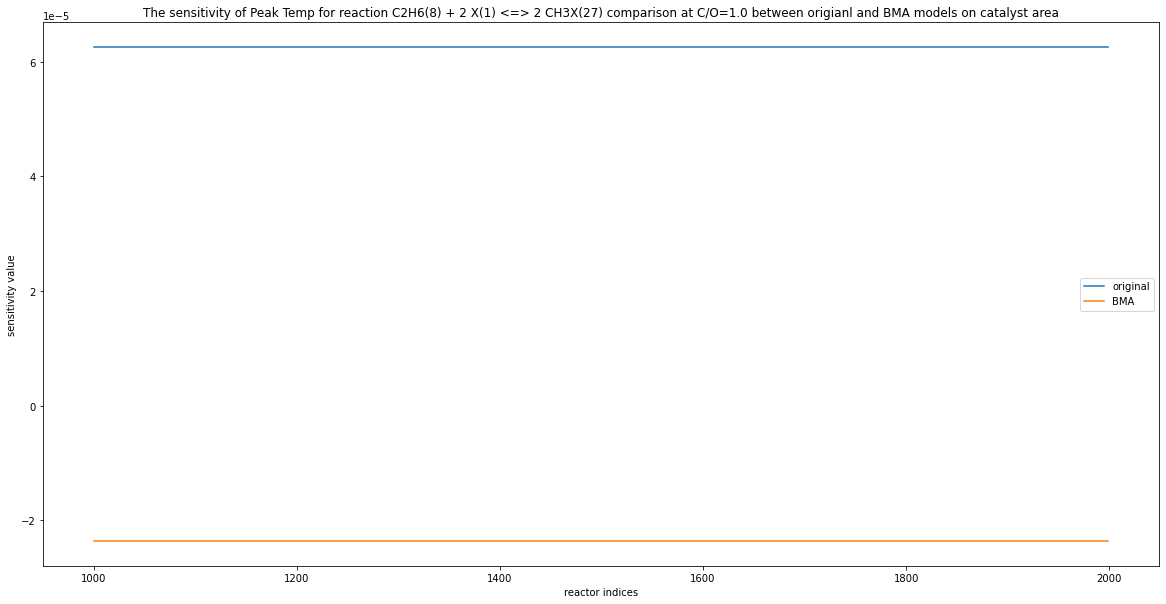

the absolute maximum index in original model is 1000, value =1.7741070051610486e-05
the absolute maximum index in BMA model is 1000, value =-2.514100040914316e-05


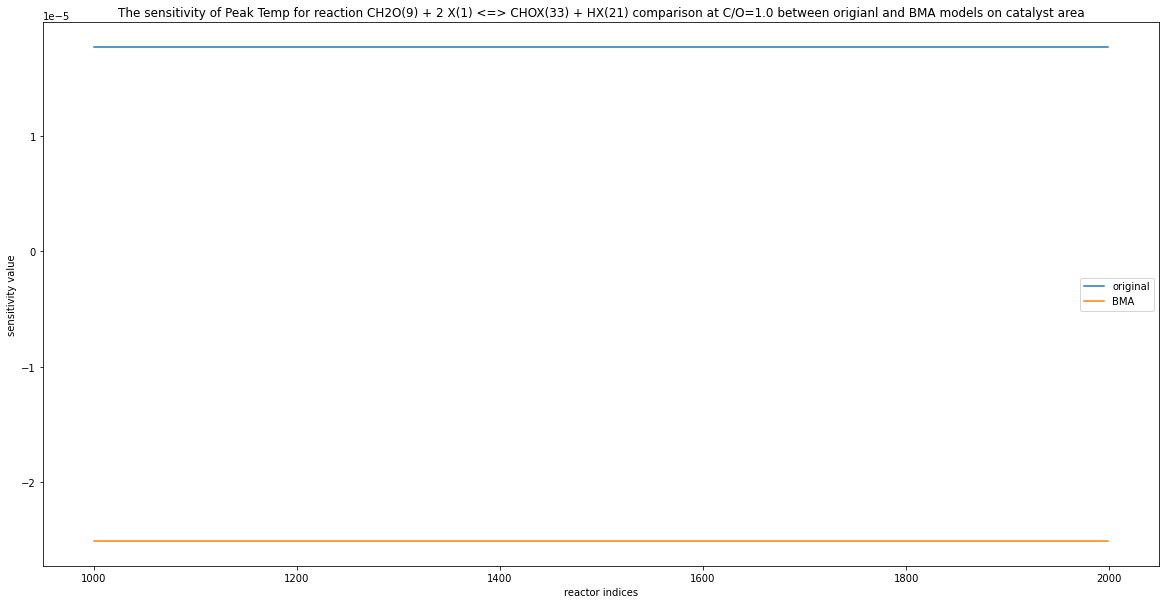

the absolute maximum index in original model is 1000, value =1.4829741538496234e-05
the absolute maximum index in BMA model is 1000, value =0.00011534977986215334


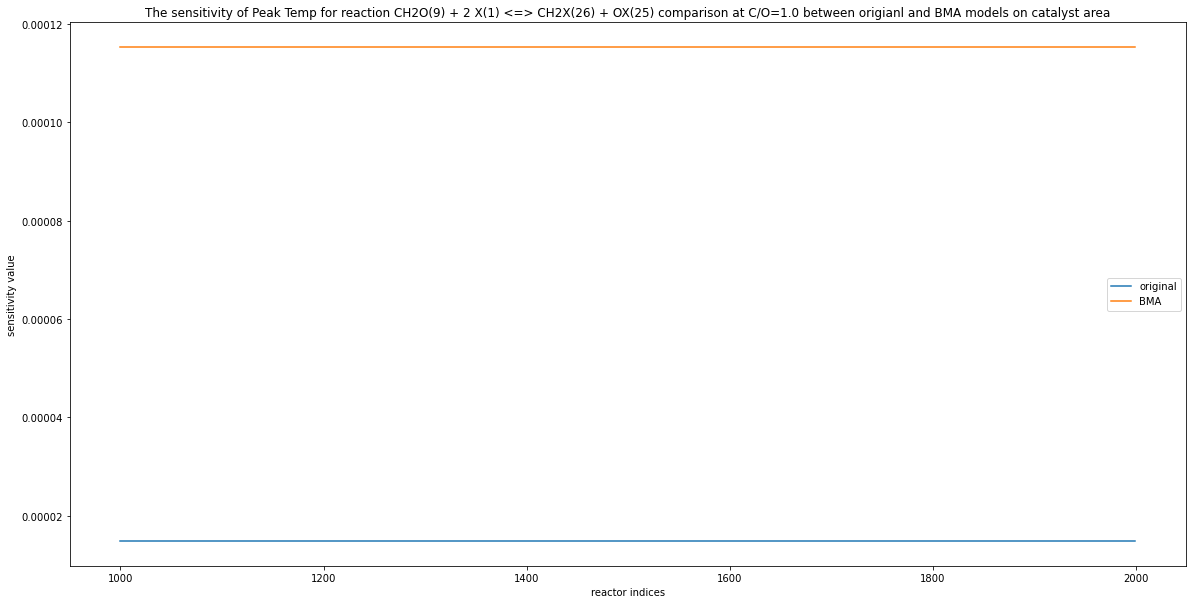

the absolute maximum index in original model is 1000, value =1.7690689470698618e-05
the absolute maximum index in BMA model is 1000, value =-2.502521490422349e-05


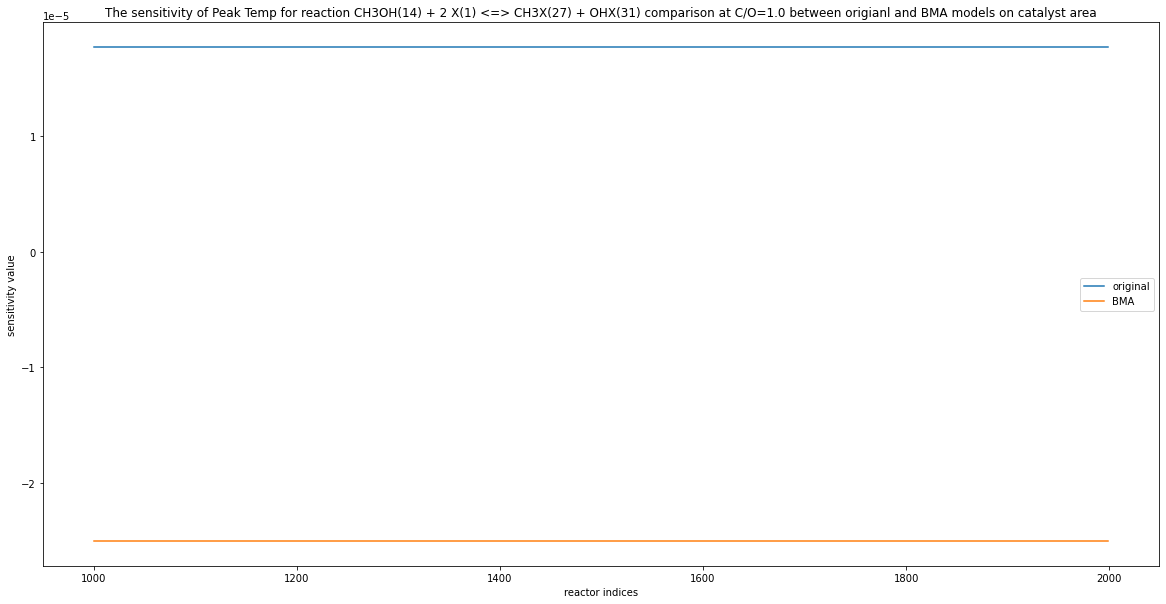

the absolute maximum index in original model is 1000, value =1.7736121205602613e-05
the absolute maximum index in BMA model is 1000, value =5.679825296792831e-05


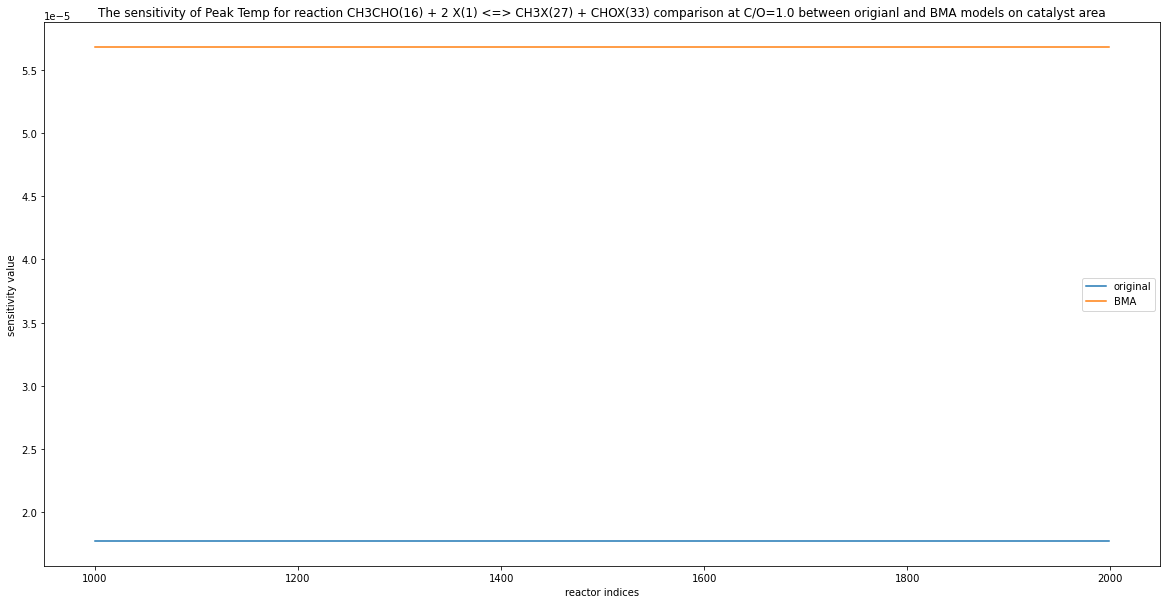

the absolute maximum index in original model is 1000, value =0.00011295485692753069
the absolute maximum index in BMA model is 1000, value =-2.4925542920601254e-05


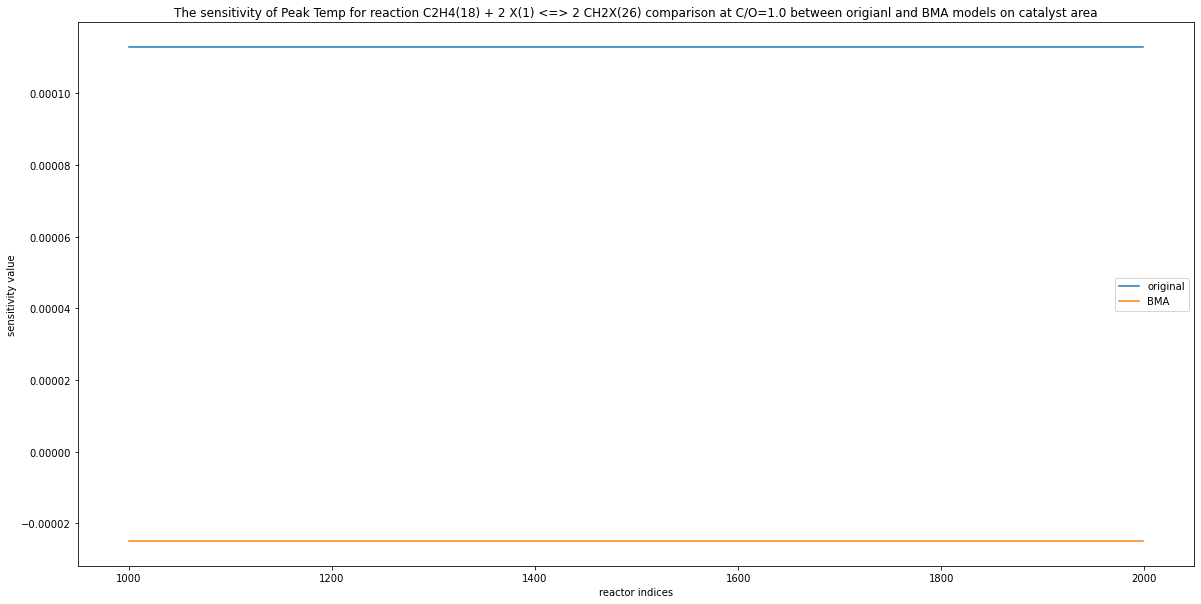

the absolute maximum index in original model is 1000, value =3.759938768838957e-05
the absolute maximum index in BMA model is 1000, value =-0.0001493551446517056


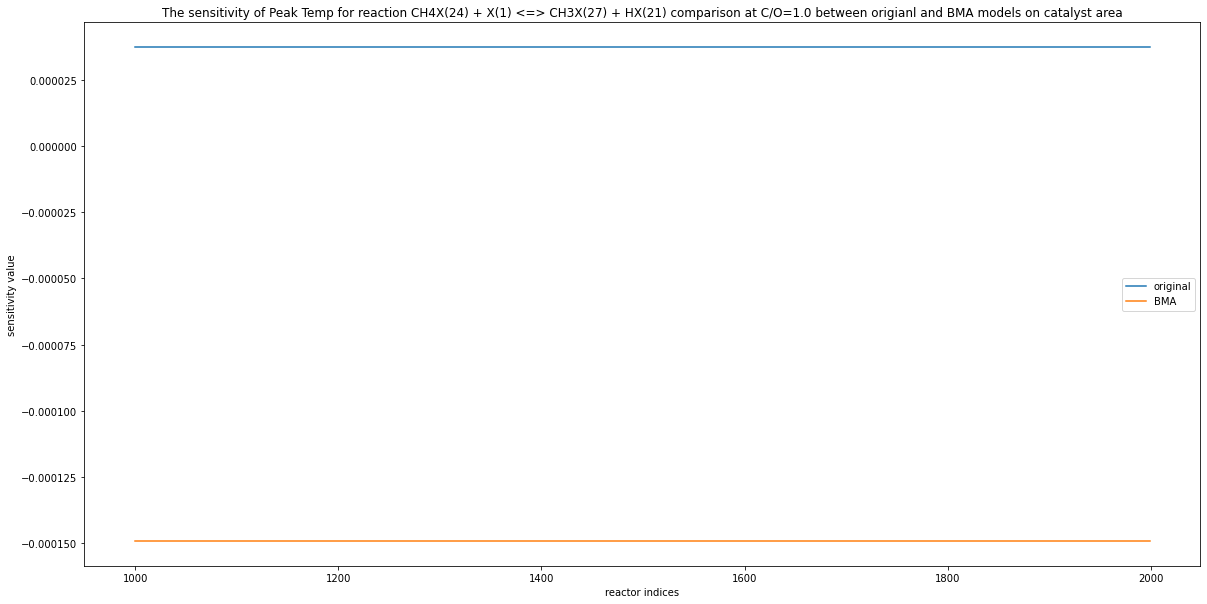

the absolute maximum index in original model is 1000, value =1.7680681165468882e-05
the absolute maximum index in BMA model is 1000, value =-1.455317335761664e-05


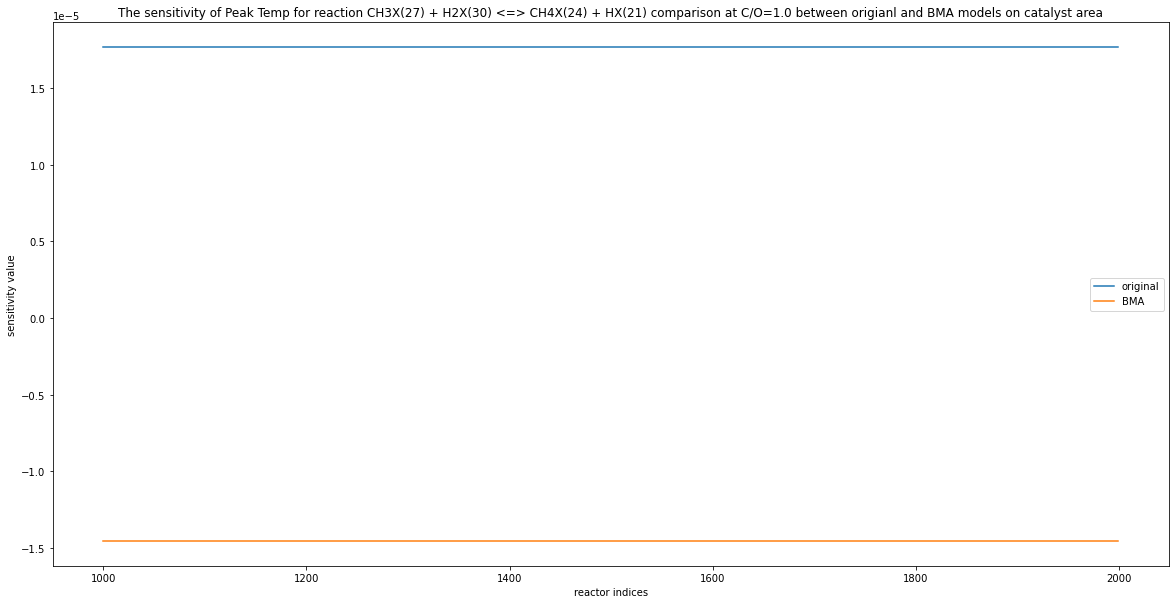

the absolute maximum index in original model is 1000, value =-1.6524102557603553e-05
the absolute maximum index in BMA model is 1000, value =2.8115791106480706e-05


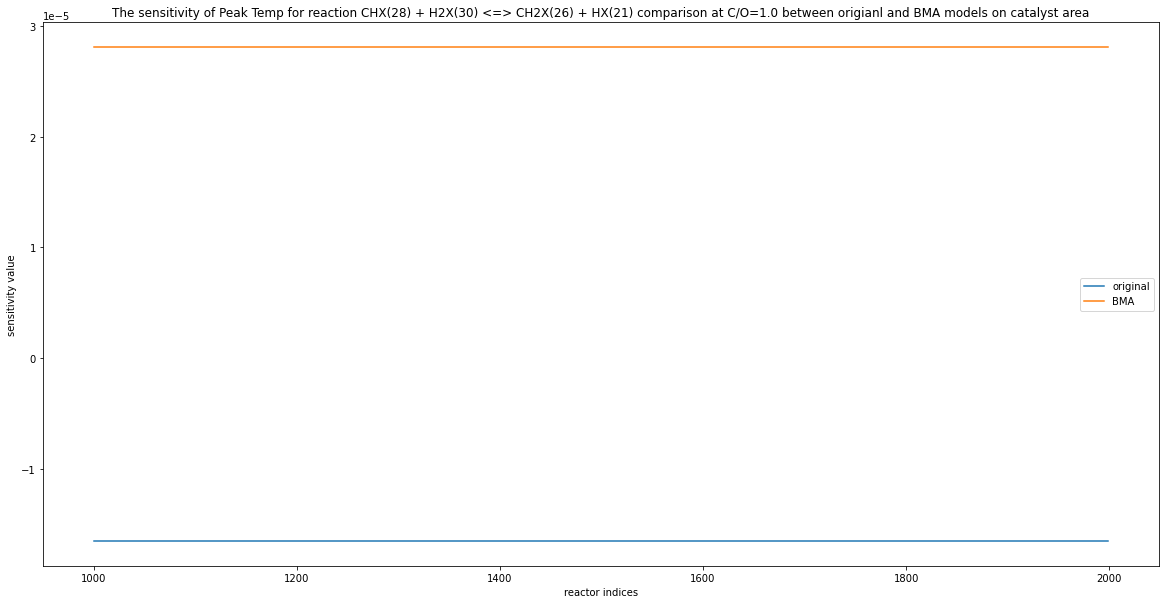

the absolute maximum index in original model is 1000, value =-1.4768207424325547e-05
the absolute maximum index in BMA model is 1000, value =2.968326468160015e-05


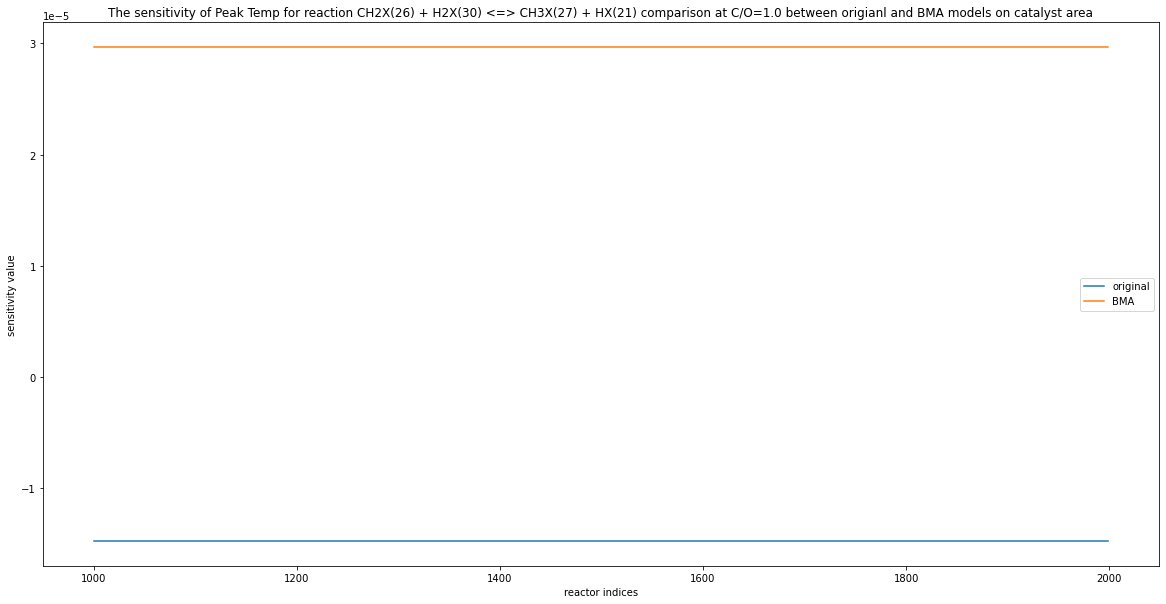

the absolute maximum index in original model is 1000, value =5.763221884020738e-05
the absolute maximum index in BMA model is 1000, value =2.510964558755092e-05


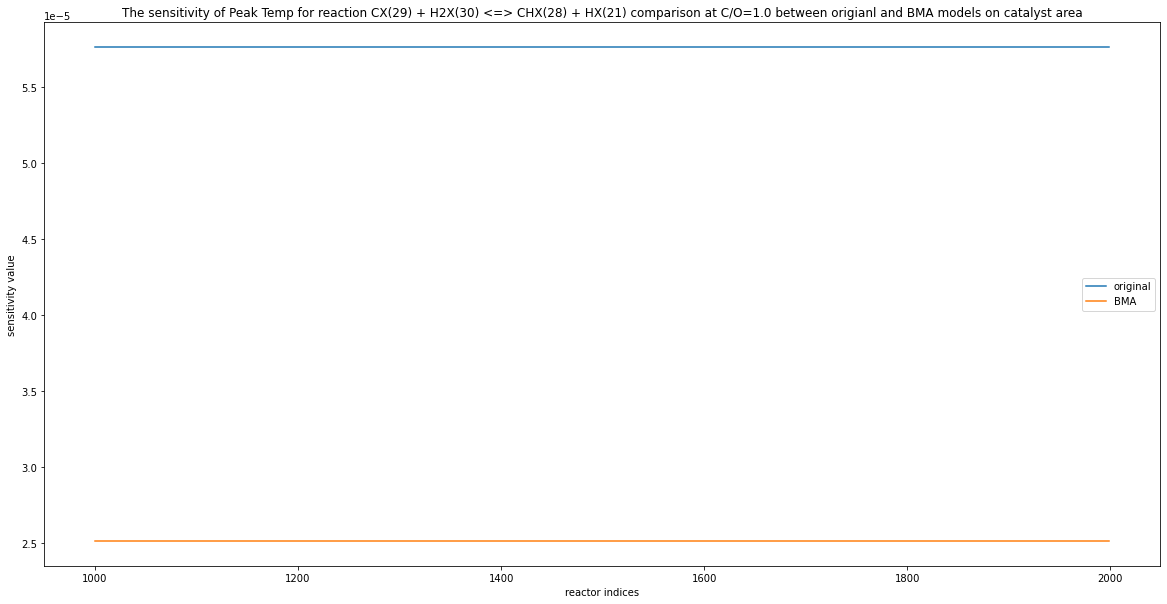

the absolute maximum index in original model is 1000, value =2.2423294028104942e-05
the absolute maximum index in BMA model is 1000, value =-5.754408051407751e-05


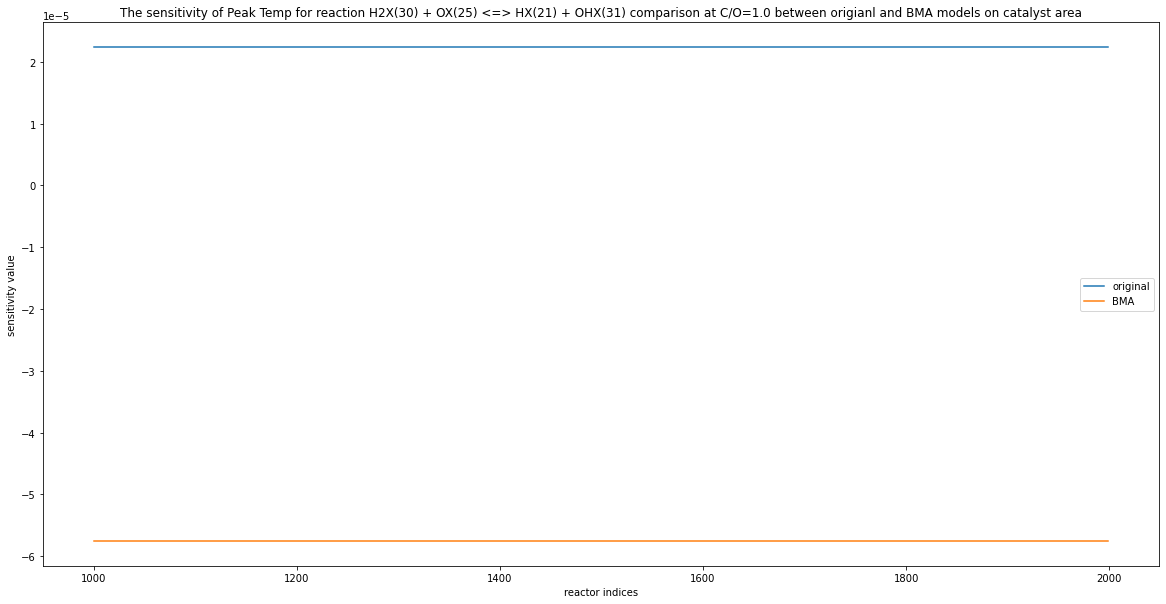

the absolute maximum index in original model is 1000, value =1.7842454995149047e-05
the absolute maximum index in BMA model is 1000, value =1.914102853437415e-05


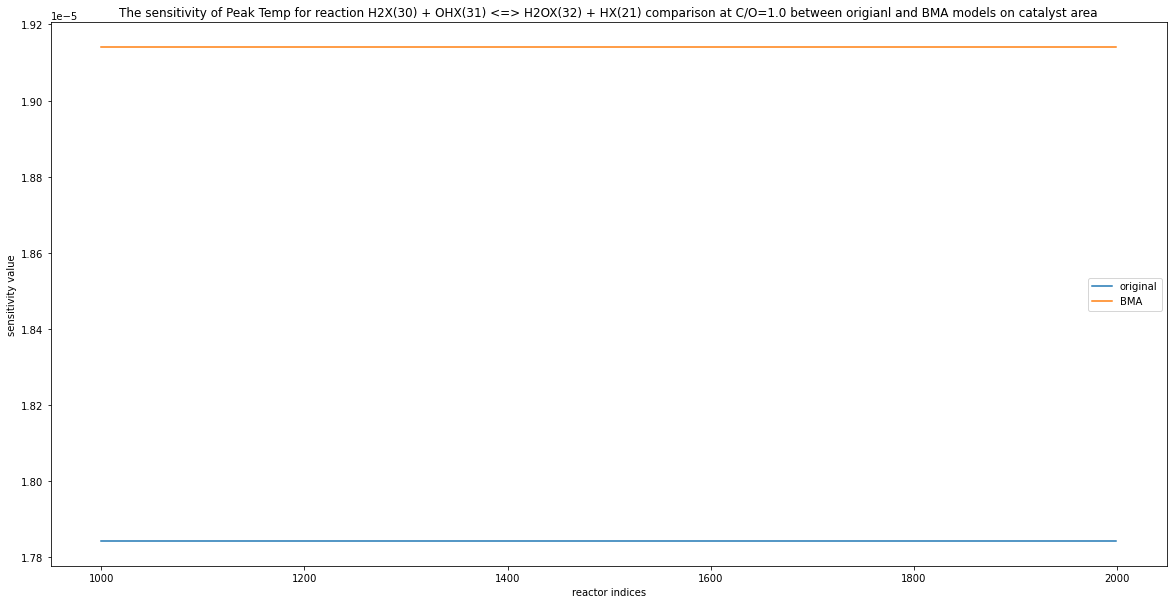

the absolute maximum index in original model is 1000, value =-1.5281949741693115e-05
the absolute maximum index in BMA model is 1000, value =2.6617220285111955e-05


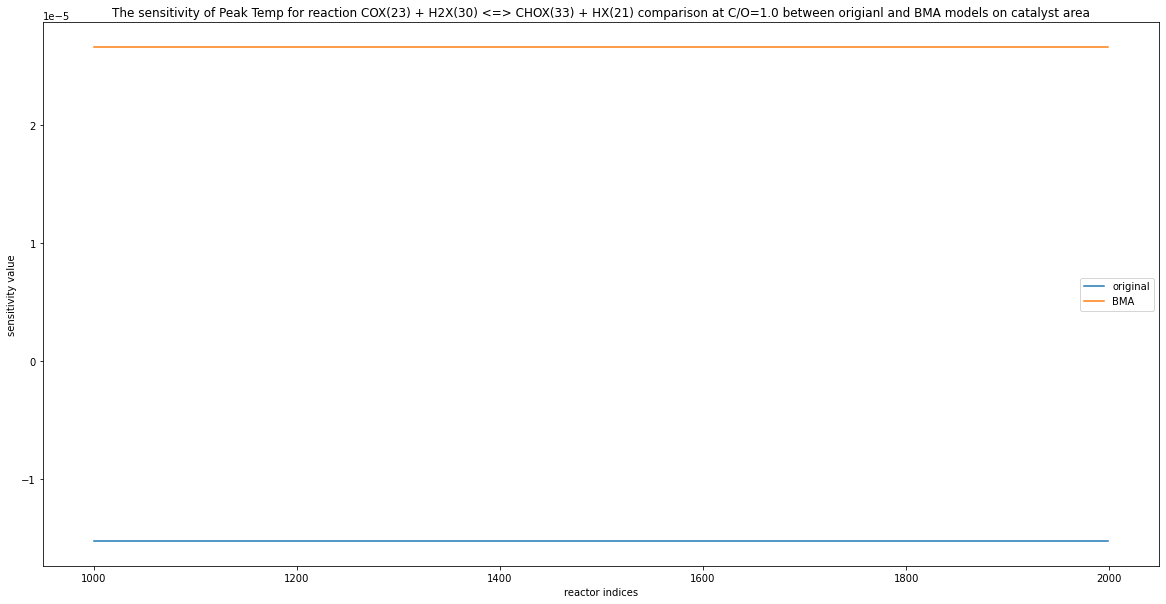

the absolute maximum index in original model is 1000, value =8.100715511380637e-06
the absolute maximum index in BMA model is 1000, value =7.796281396548389e-05


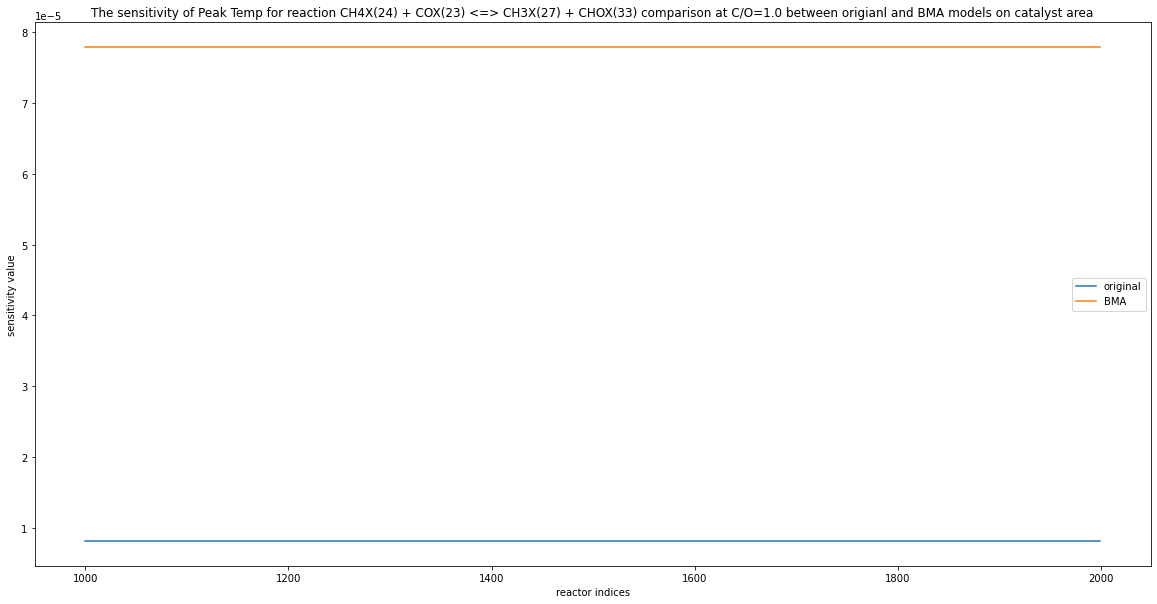

the absolute maximum index in original model is 1000, value =5.994215292894716e-05
the absolute maximum index in BMA model is 1000, value =1.9036137498359336e-05


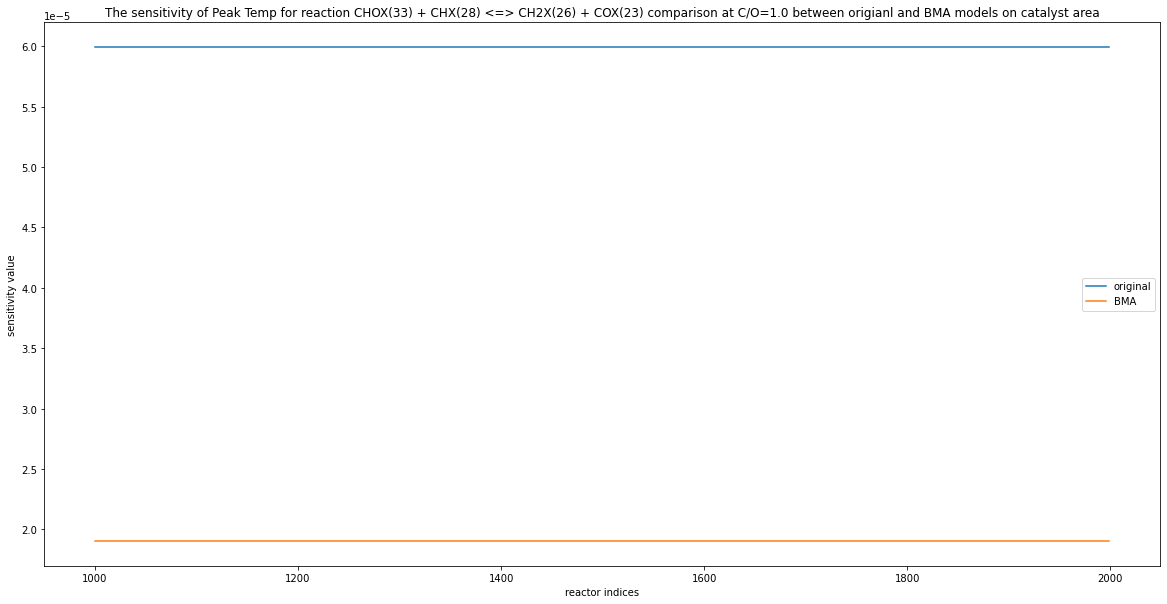

the absolute maximum index in original model is 1000, value =5.9944350110454565e-05
the absolute maximum index in BMA model is 1000, value =2.9670385507360784e-05


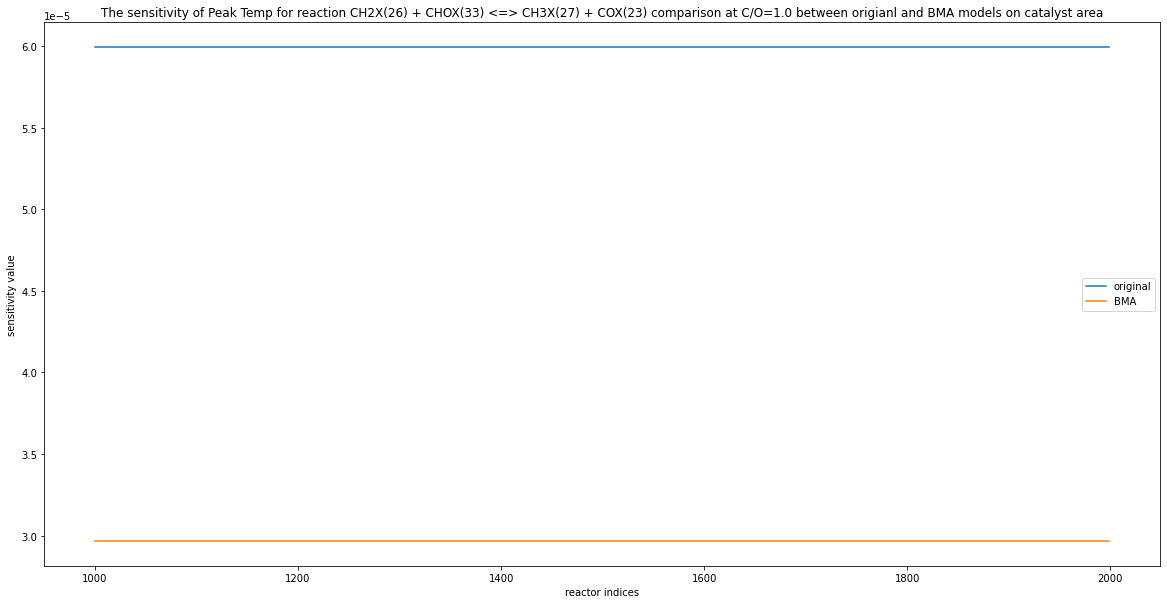

the absolute maximum index in original model is 1000, value =1.7735740426185318e-05
the absolute maximum index in BMA model is 1000, value =4.967753675544903e-05


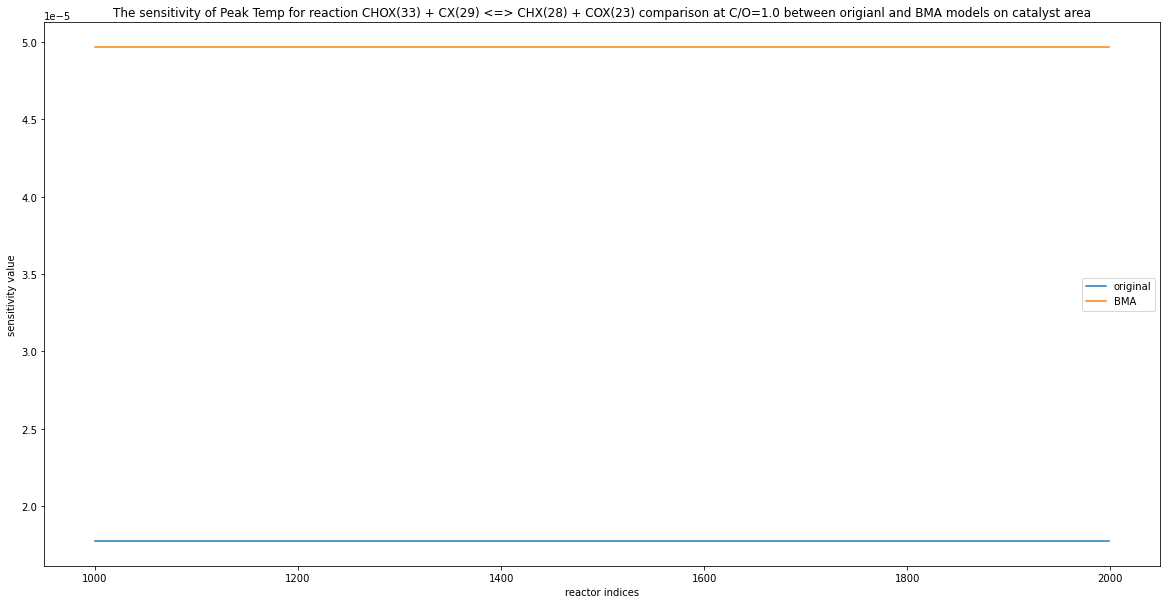

the absolute maximum index in original model is 1000, value =2.320474972451315e-05
the absolute maximum index in BMA model is 1000, value =-5.820078913536741e-05


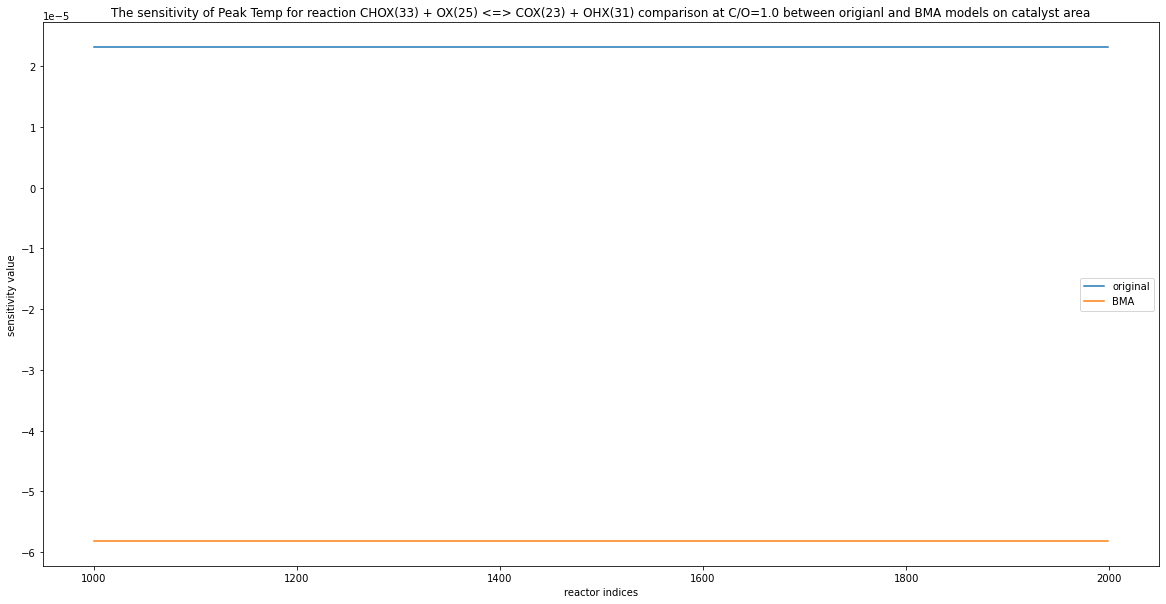

the absolute maximum index in original model is 1000, value =5.995309123905707e-05
the absolute maximum index in BMA model is 1000, value =2.9688486383475746e-05


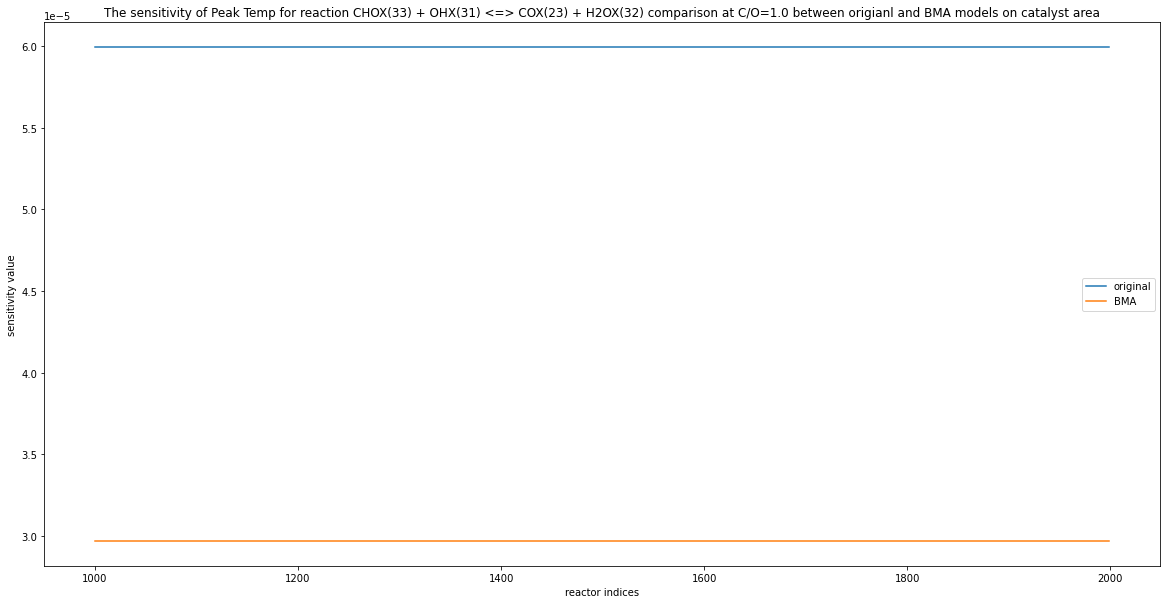

the absolute maximum index in original model is 1000, value =0.002573671284630315
the absolute maximum index in BMA model is 1000, value =0.00010683880751880524


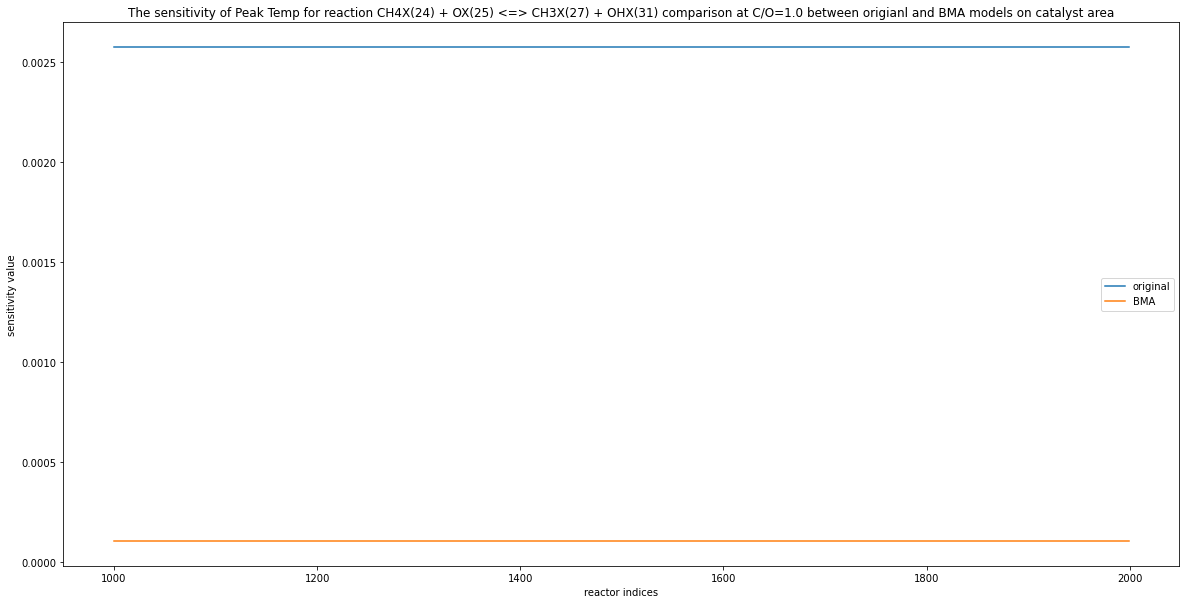

the absolute maximum index in original model is 1000, value =9.245109121961396e-05
the absolute maximum index in BMA model is 1000, value =2.732681592716824e-05


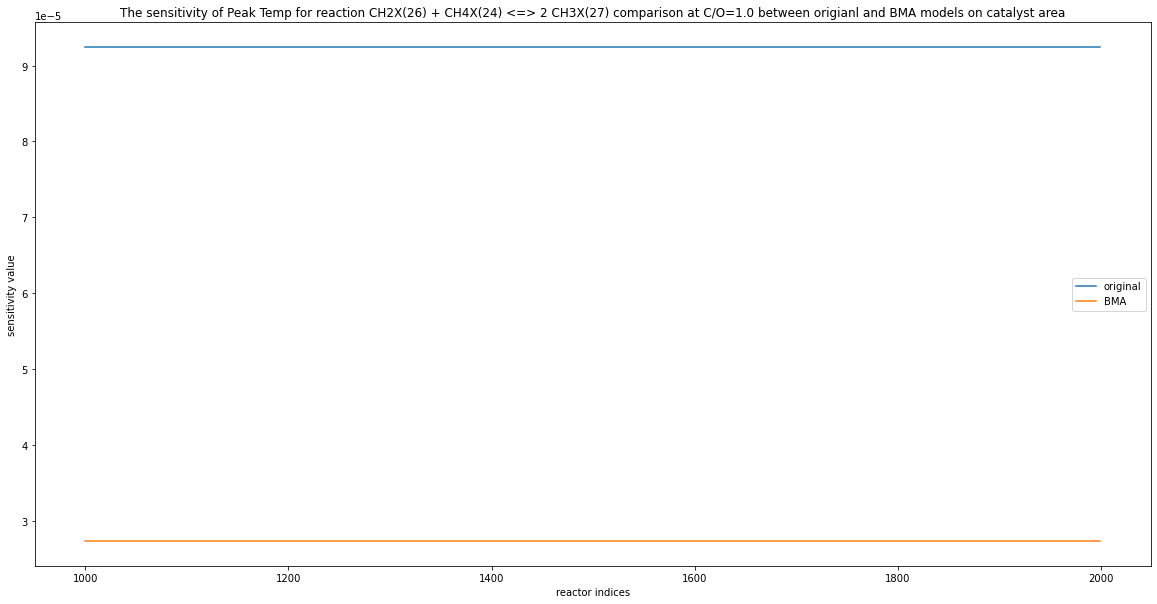

the absolute maximum index in original model is 1000, value =9.245144565544934e-05
the absolute maximum index in BMA model is 1000, value =1.9044403493532707e-05


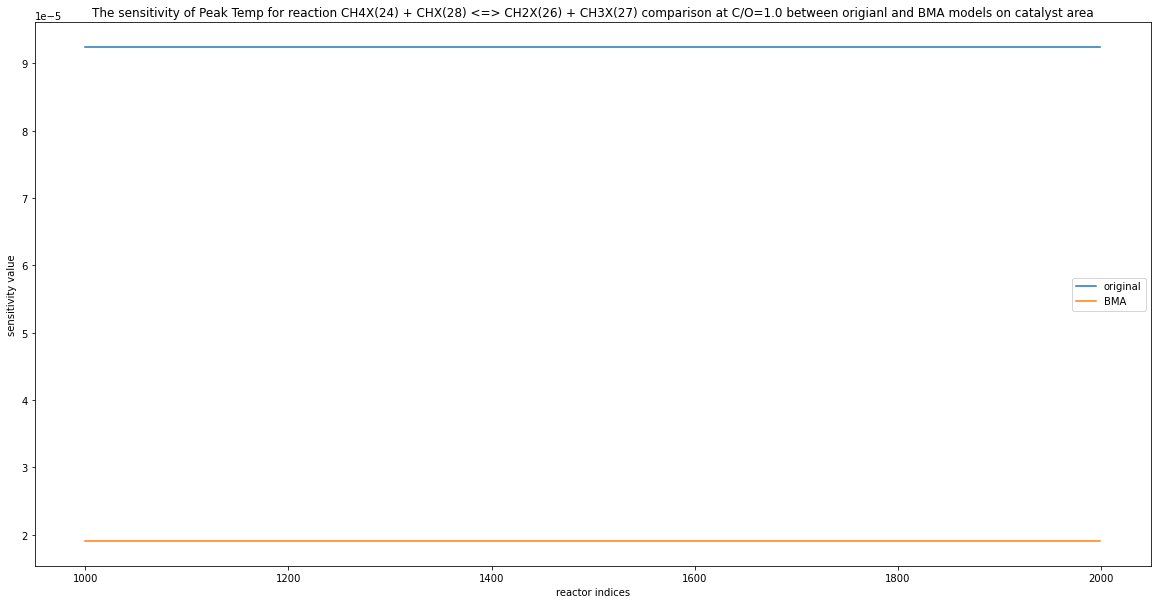

the absolute maximum index in original model is 1000, value =-1.4768380475370947e-05
the absolute maximum index in BMA model is 1000, value =-5.8692978444859605e-05


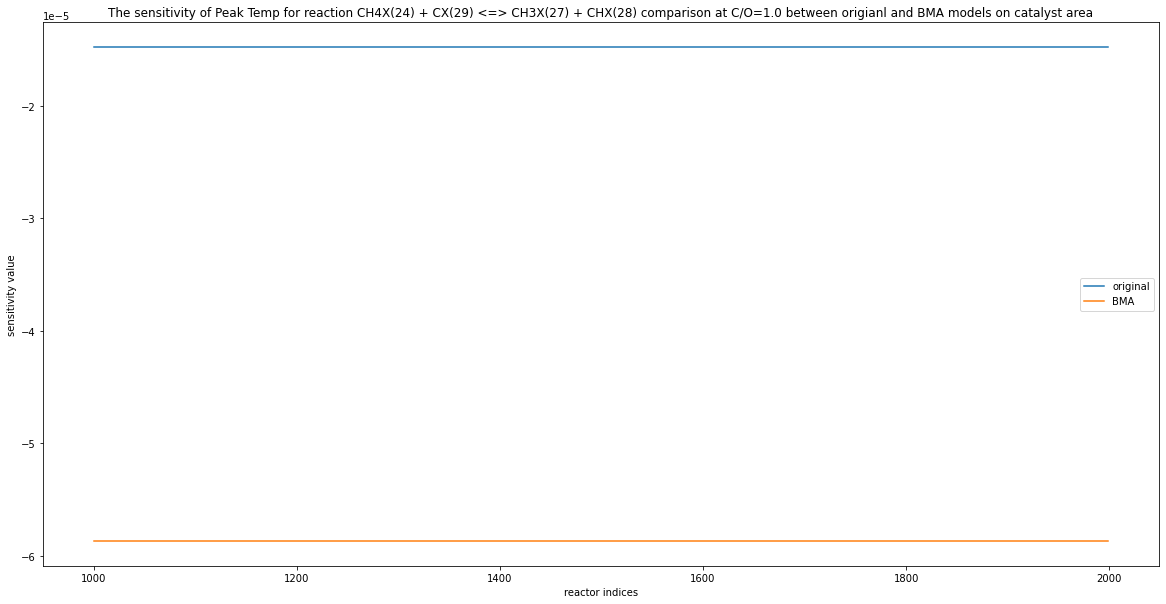

the absolute maximum index in original model is 1000, value =1.7856147281581187e-05
the absolute maximum index in BMA model is 1000, value =4.969630449897484e-05


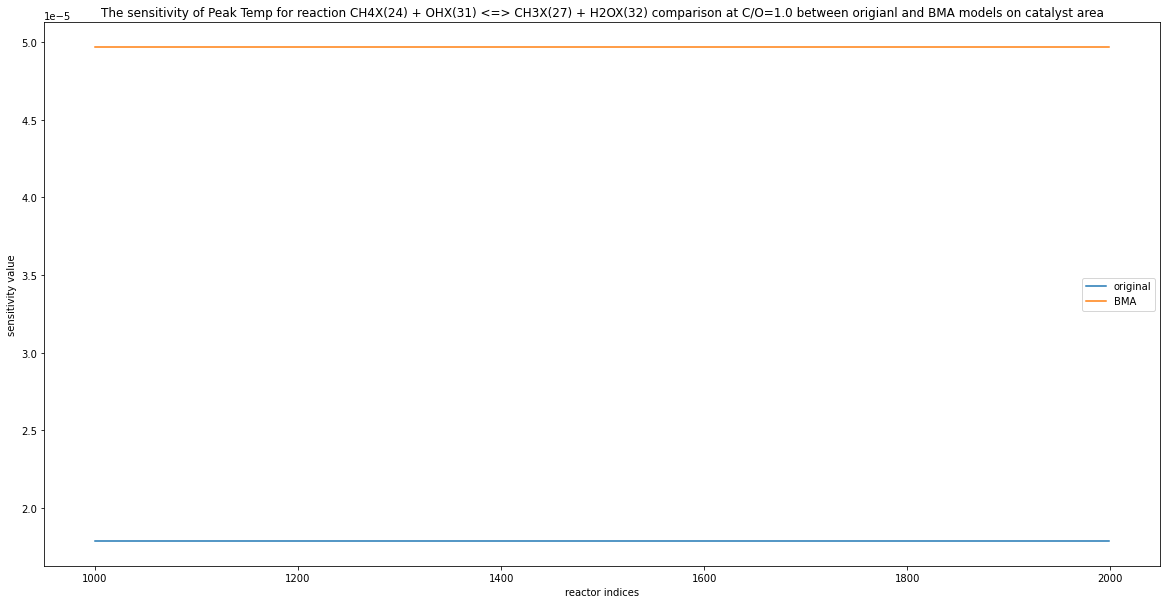

the absolute maximum index in original model is 1000, value =5.992354397557462e-05
the absolute maximum index in BMA model is 1000, value =-2.5177191264907723e-05


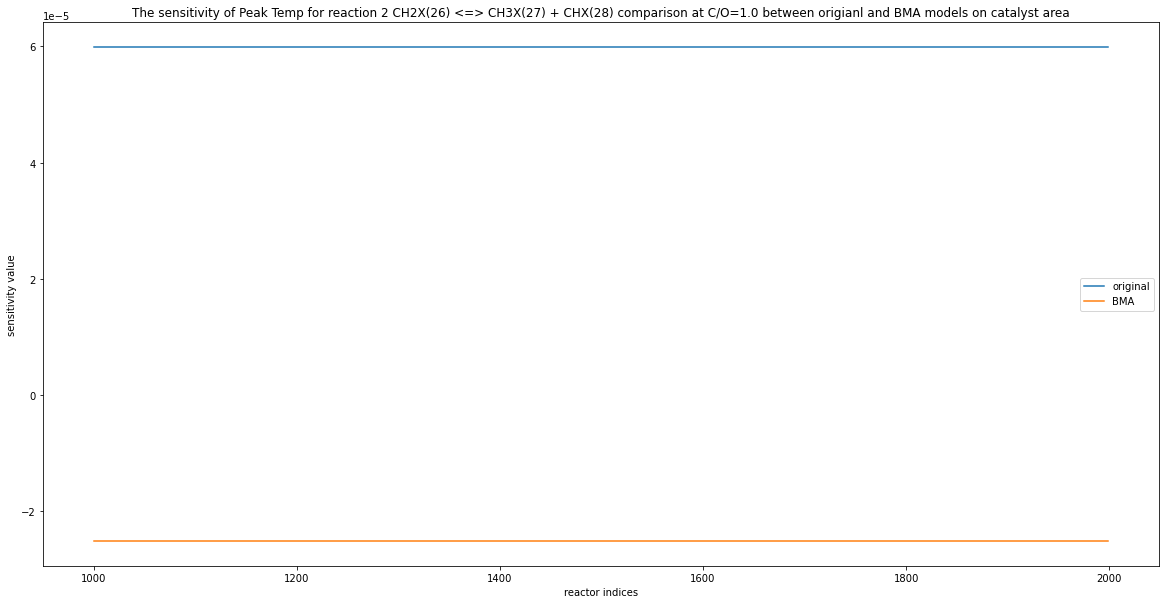

the absolute maximum index in original model is 1000, value =-2.6374869215137877e-05
the absolute maximum index in BMA model is 1000, value =2.54111802451874e-05


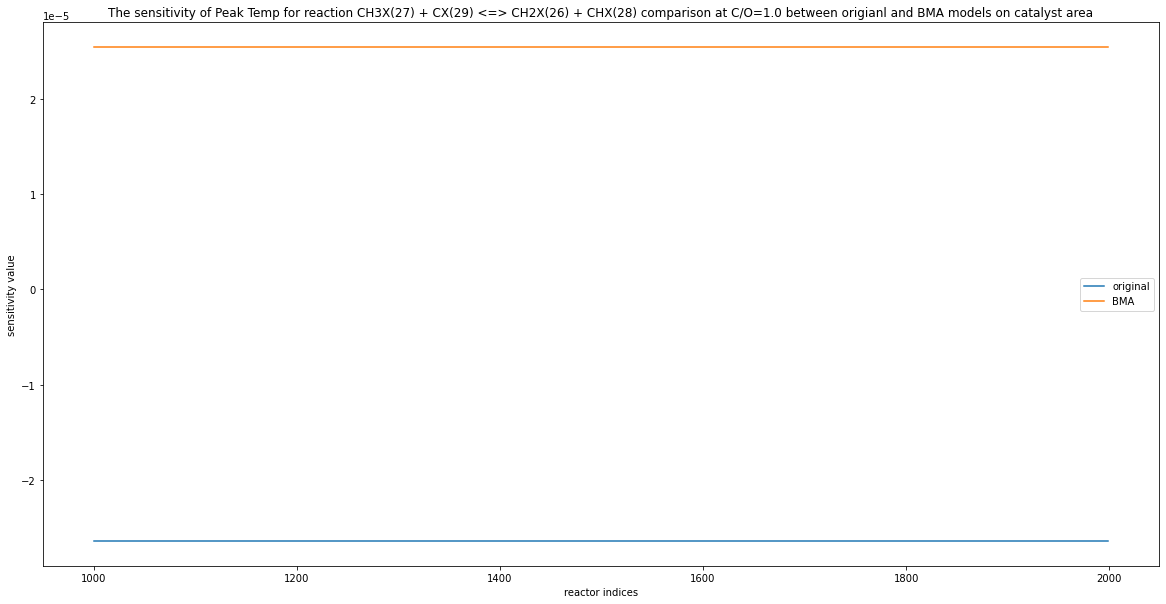

the absolute maximum index in original model is 1000, value =1.7735290273471328e-05
the absolute maximum index in BMA model is 1000, value =5.7968091572814576e-05


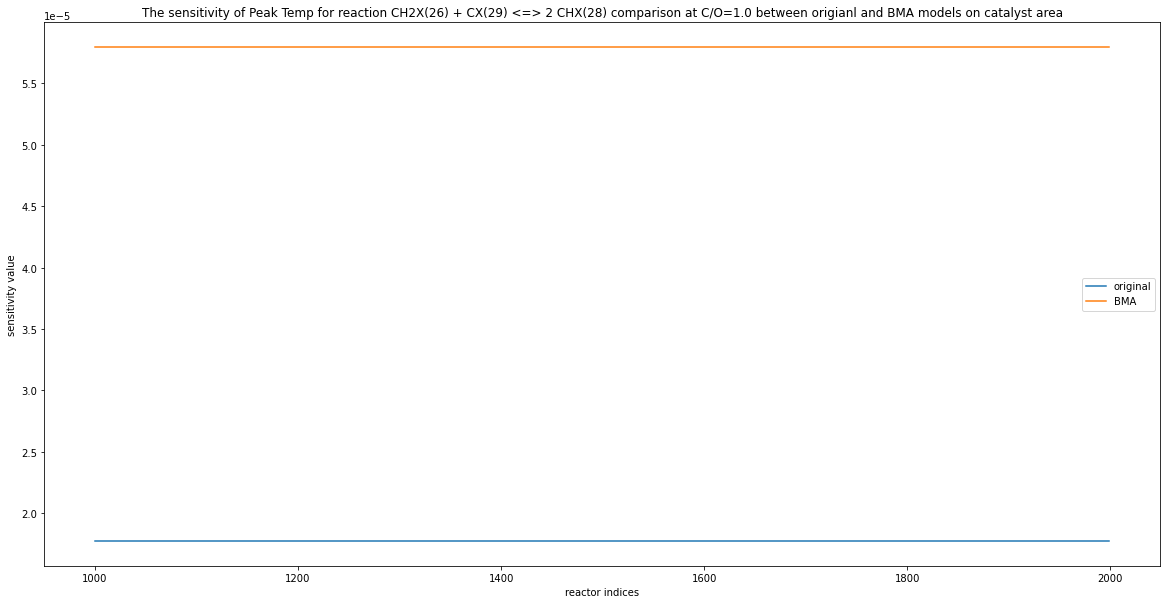

the absolute maximum index in original model is 1000, value =-1.4767697816775976e-05
the absolute maximum index in BMA model is 1000, value =-1.4503970480295474e-05


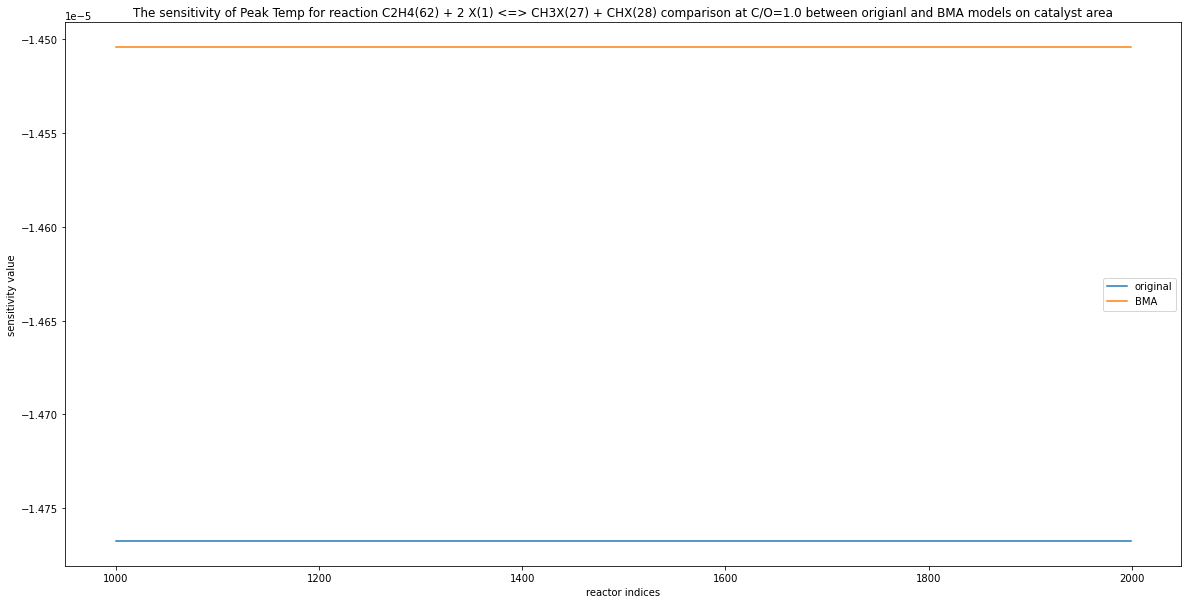

the absolute maximum index in original model is 1000, value =-1.4765688265706067e-05
the absolute maximum index in BMA model is 1000, value =1.3798284803465397e-05


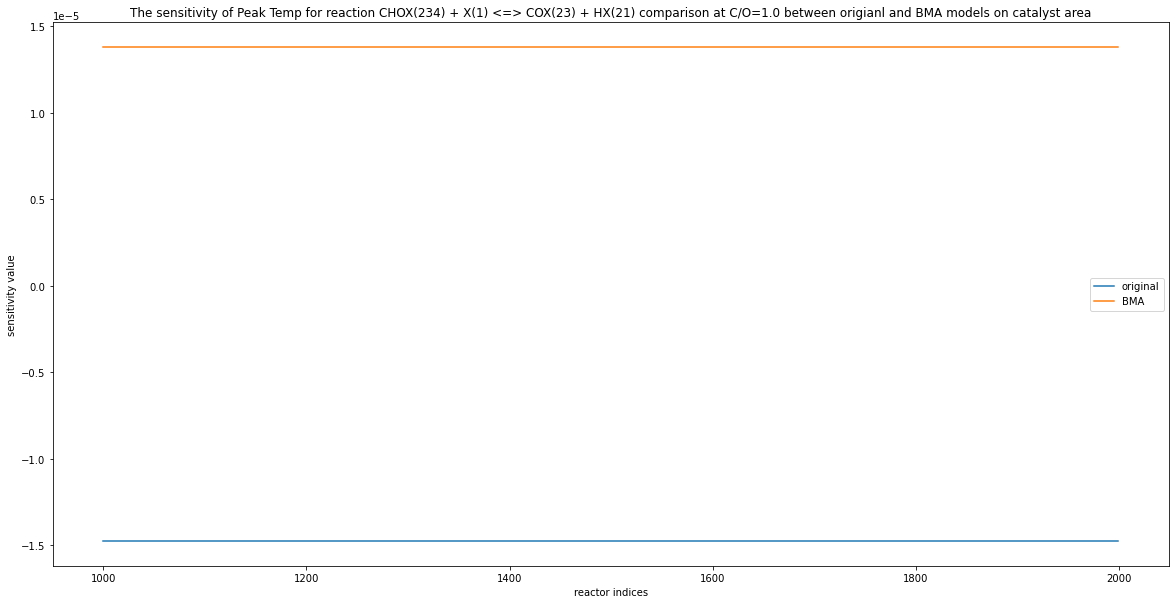

the absolute maximum index in original model is 1000, value =-4.346773818876213e-05
the absolute maximum index in BMA model is 1000, value =-1.0464246692951387e-05


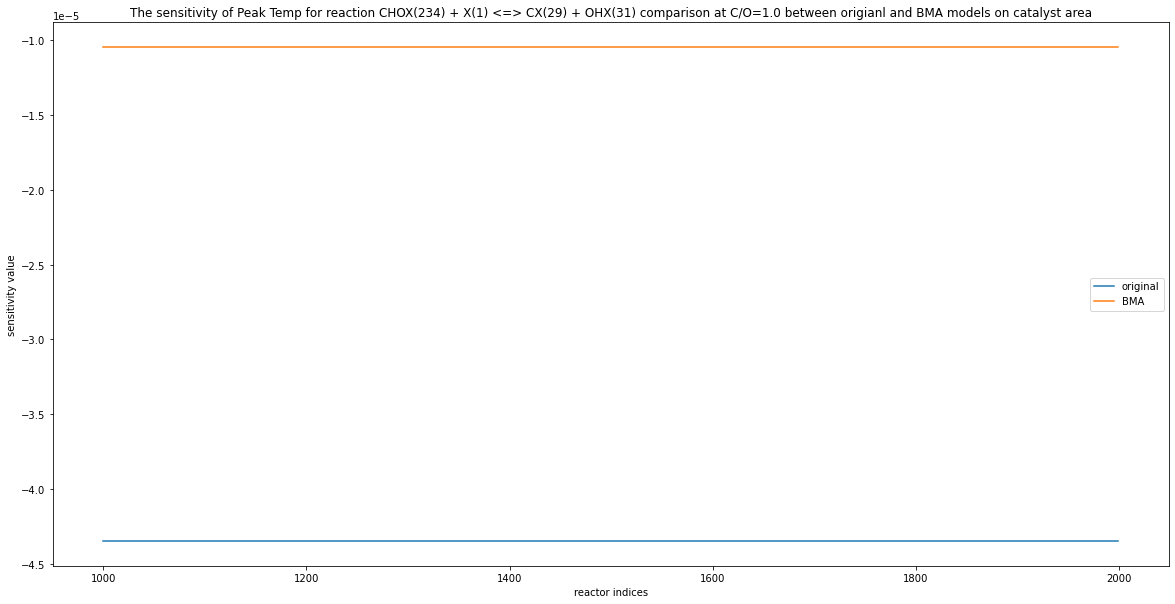

the absolute maximum index in original model is 1000, value =9.03713477782837e-05
the absolute maximum index in BMA model is 1000, value =-1.4837831909306424e-05


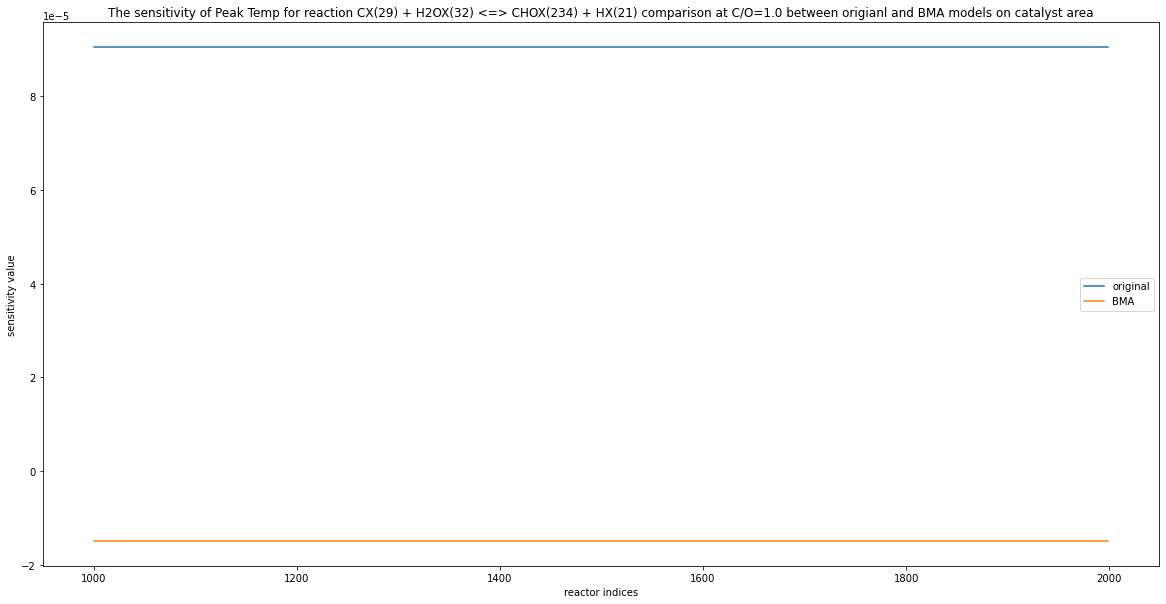

the absolute maximum index in original model is 1000, value =1.7599773071358426e-05
the absolute maximum index in BMA model is 1000, value =-1.4513096531239624e-05


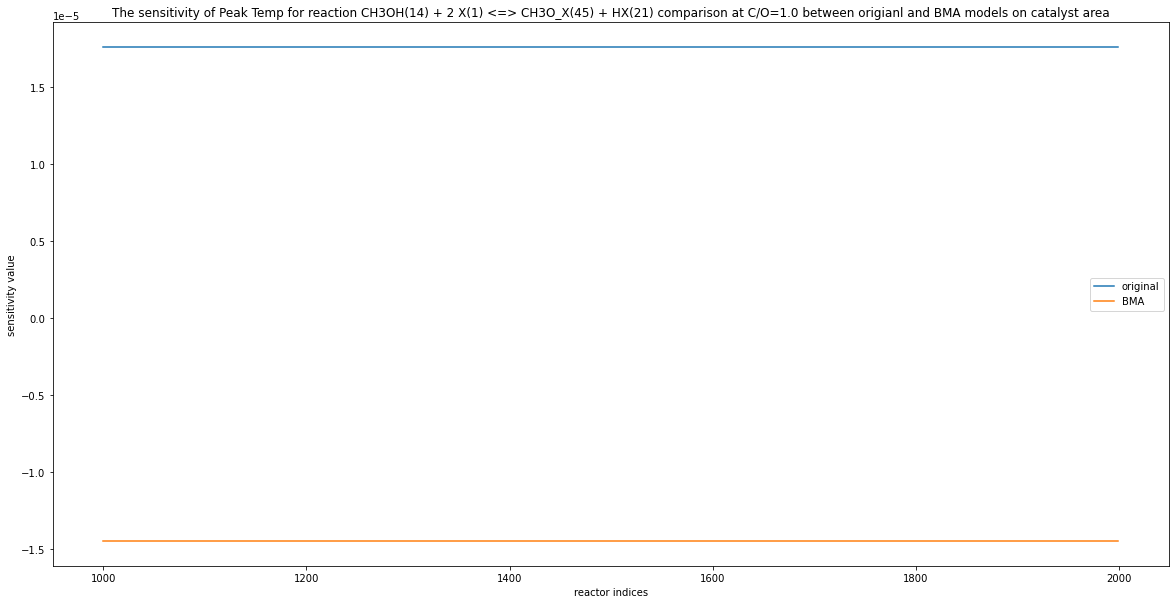

the absolute maximum index in original model is 1000, value =9.245022840671476e-05
the absolute maximum index in BMA model is 1000, value =1.904615685422024e-05


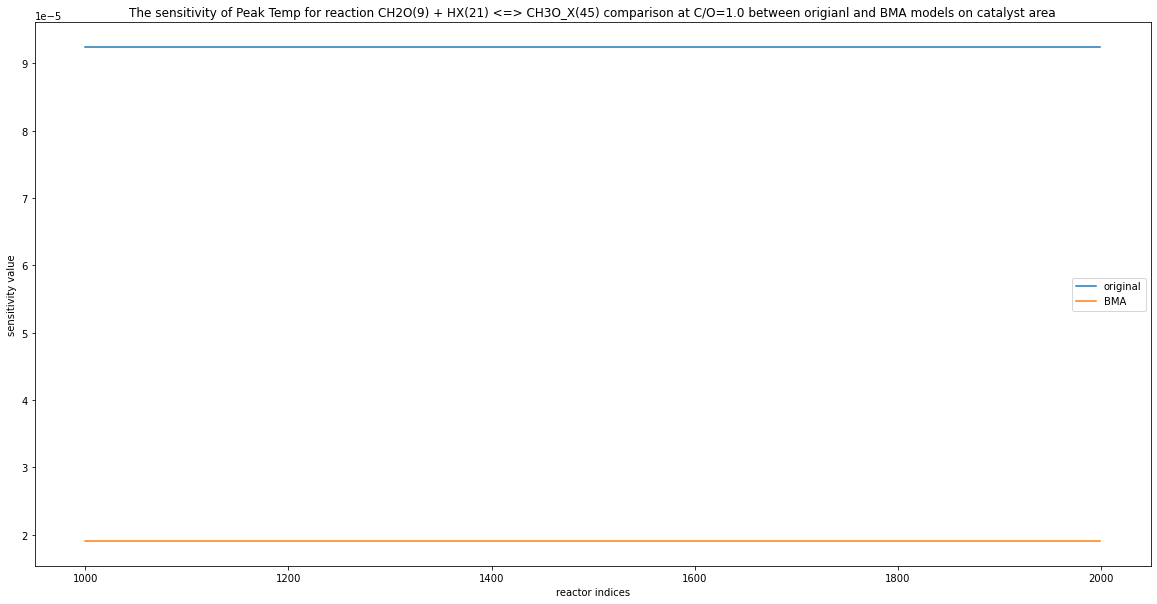

the absolute maximum index in original model is 1000, value =5.641101262099287e-05
the absolute maximum index in BMA model is 1000, value =-5.957151756888582e-05


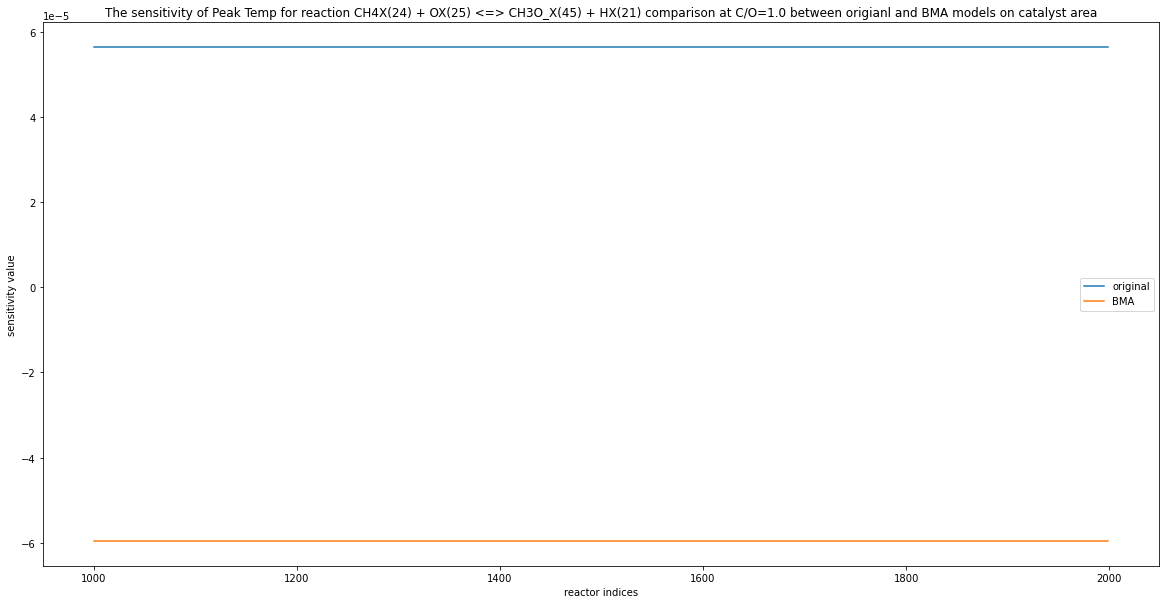

the absolute maximum index in original model is 1000, value =9.245061239285256e-05
the absolute maximum index in BMA model is 1000, value =3.3912008669656345e-05


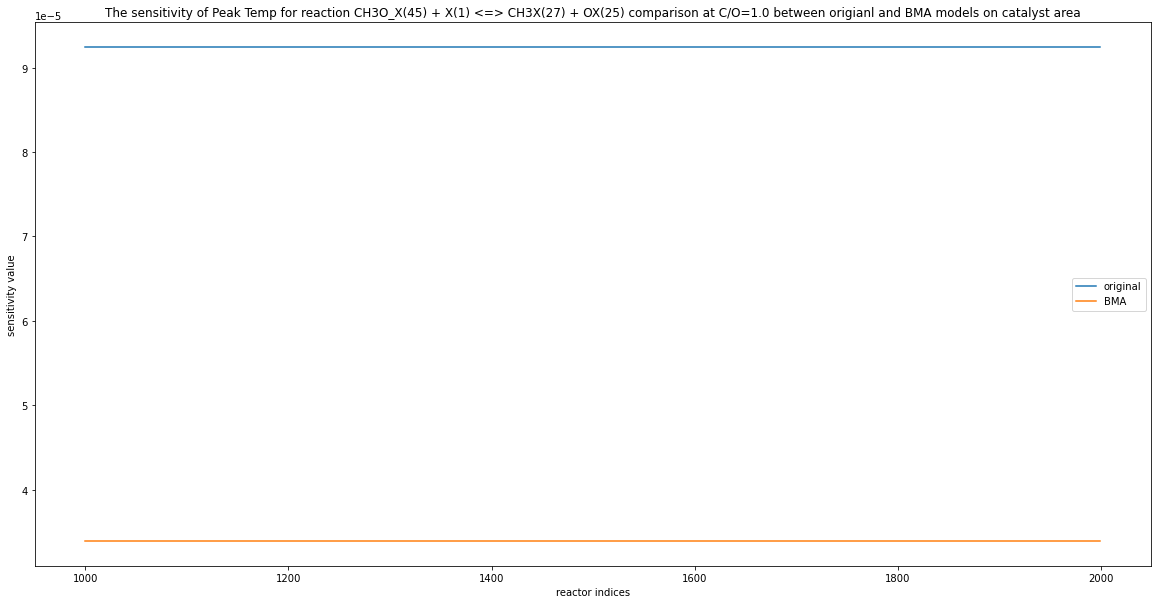

the absolute maximum index in original model is 1000, value =-1.4765595382673513e-05
the absolute maximum index in BMA model is 1000, value =-1.4503192577156405e-05


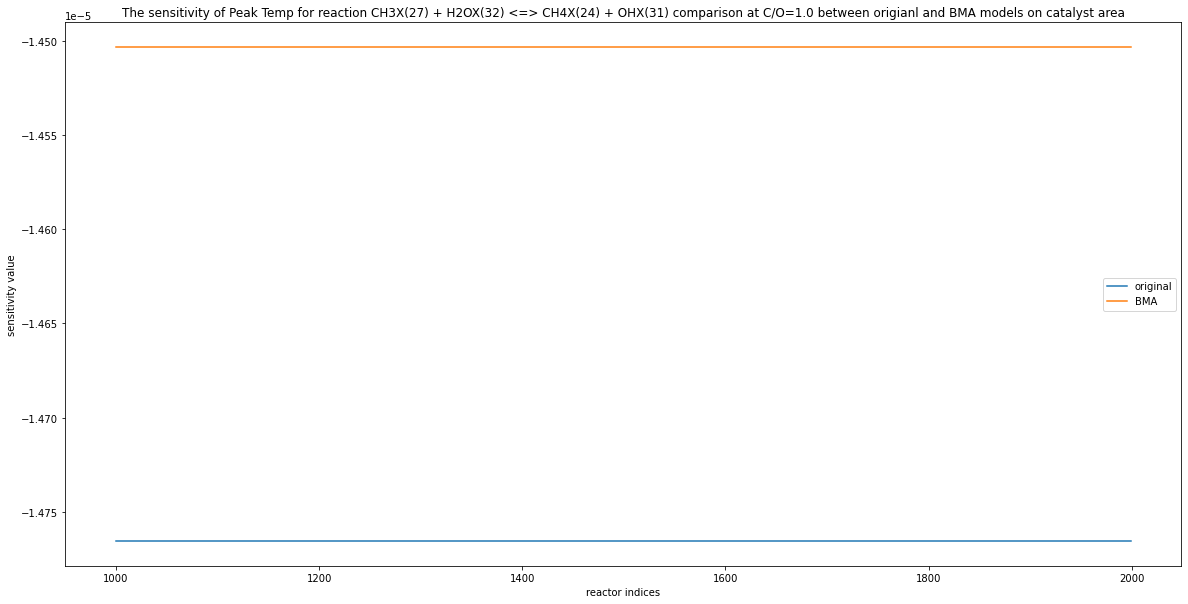

the absolute maximum index in original model is 1000, value =1.7735454095873393e-05
the absolute maximum index in BMA model is 1000, value =-1.4503072846645914e-05


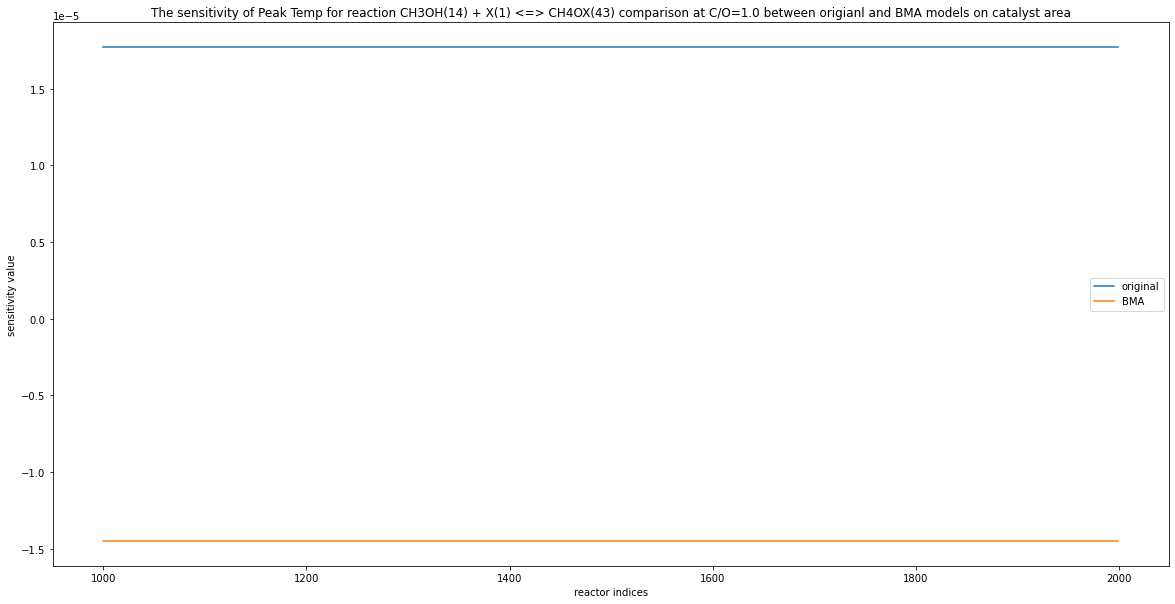

the absolute maximum index in original model is 1000, value =5.99392816836015e-05
the absolute maximum index in BMA model is 1000, value =2.745482058652392e-05


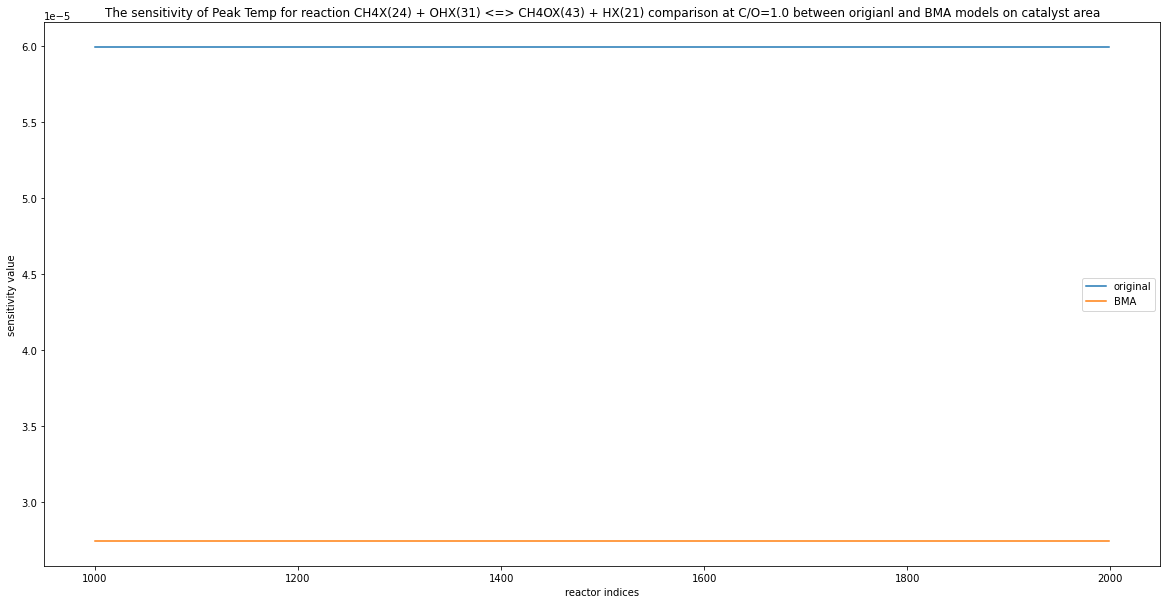

the absolute maximum index in original model is 1000, value =5.994755615979434e-05
the absolute maximum index in BMA model is 1000, value =2.7323927095084962e-05


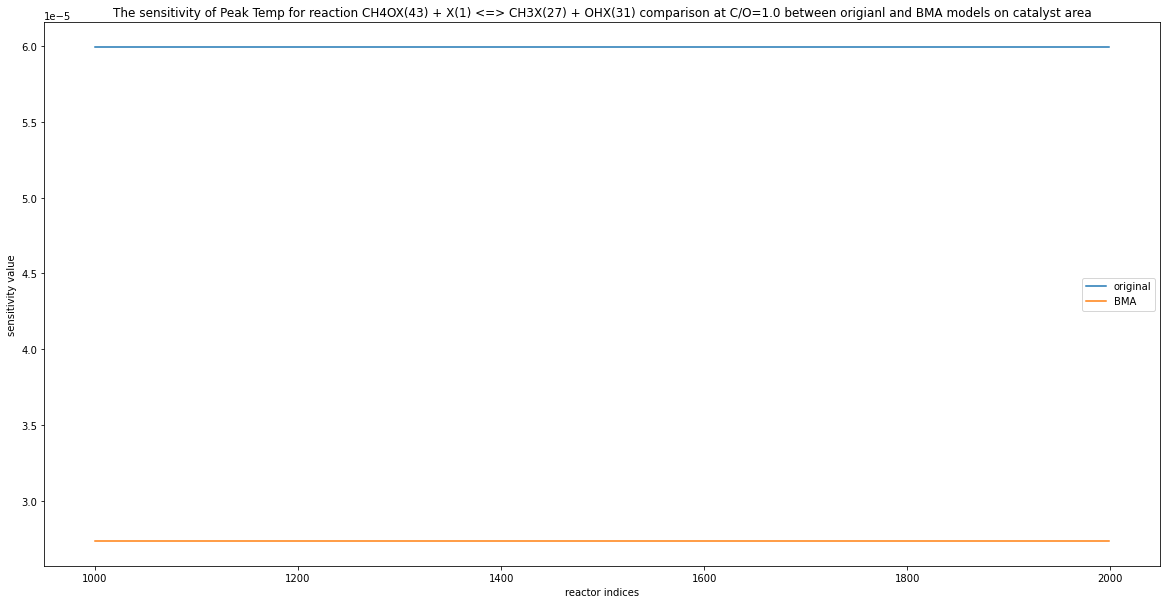

the absolute maximum index in original model is 1000, value =9.245039716970366e-05
the absolute maximum index in BMA model is 1000, value =2.9683667328384694e-05


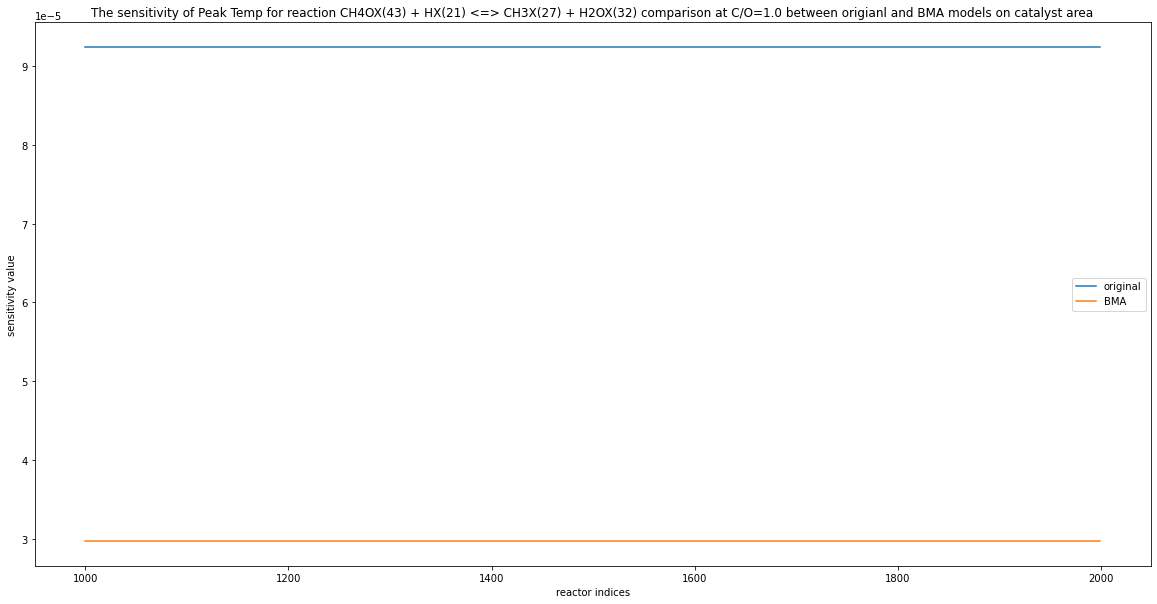

the absolute maximum index in original model is 1000, value =5.994690972595496e-05
the absolute maximum index in BMA model is 1000, value =-1.450538383021588e-05


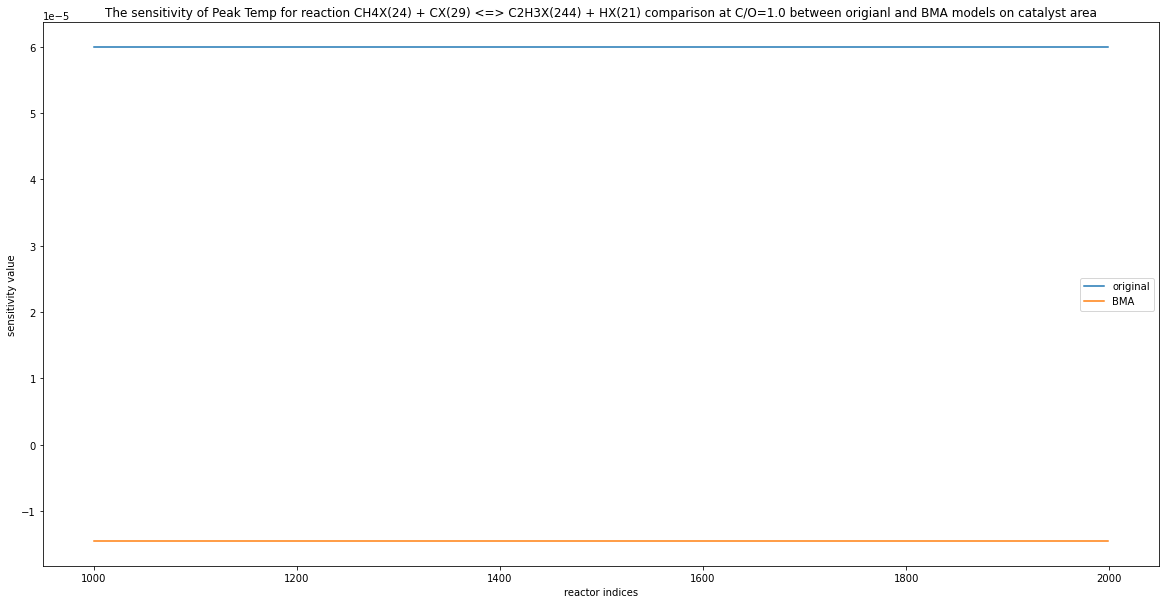

the absolute maximum index in original model is 1000, value =1.7735310240899647e-05
the absolute maximum index in BMA model is 1000, value =2.7324110711721052e-05


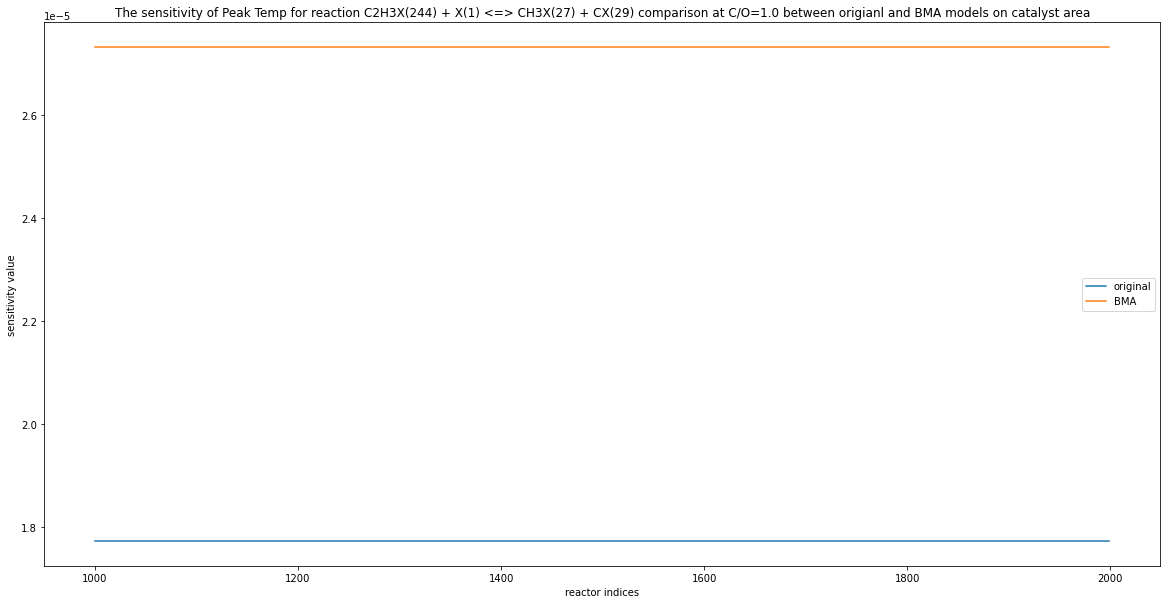

the absolute maximum index in original model is 1000, value =5.9946819303893946e-05
the absolute maximum index in BMA model is 1000, value =2.9683386371235407e-05


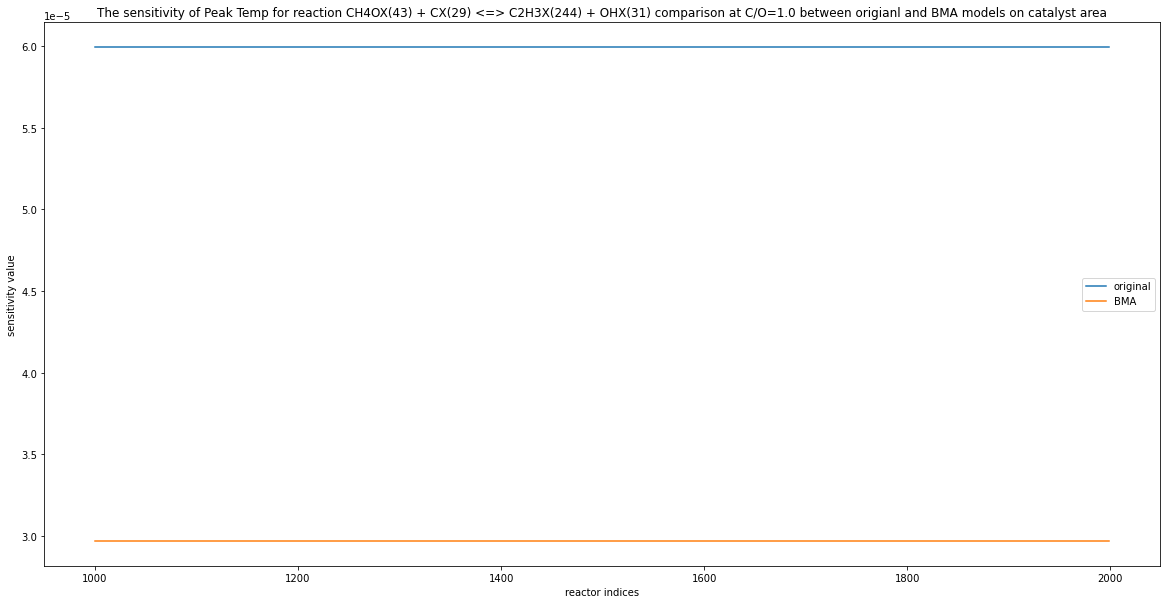

the absolute maximum index in original model is 1000, value =-1.4768395614074769e-05
the absolute maximum index in BMA model is 1000, value =-7.399073733815932e-06


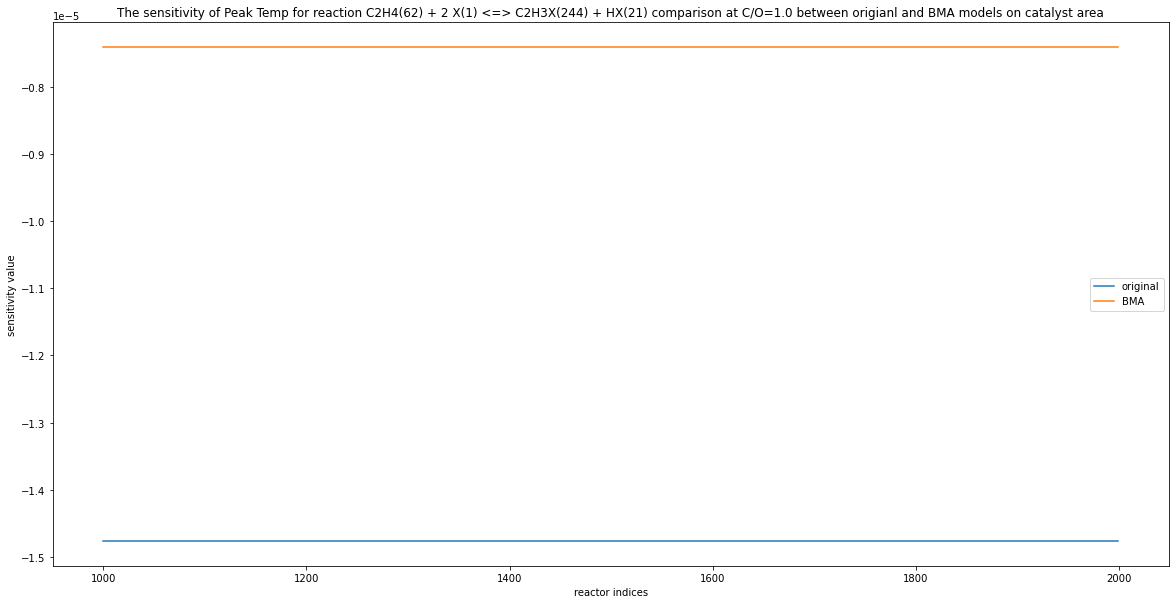

the absolute maximum index in original model is 1000, value =9.245049881528646e-05
the absolute maximum index in BMA model is 1000, value =0.00010783206642119692


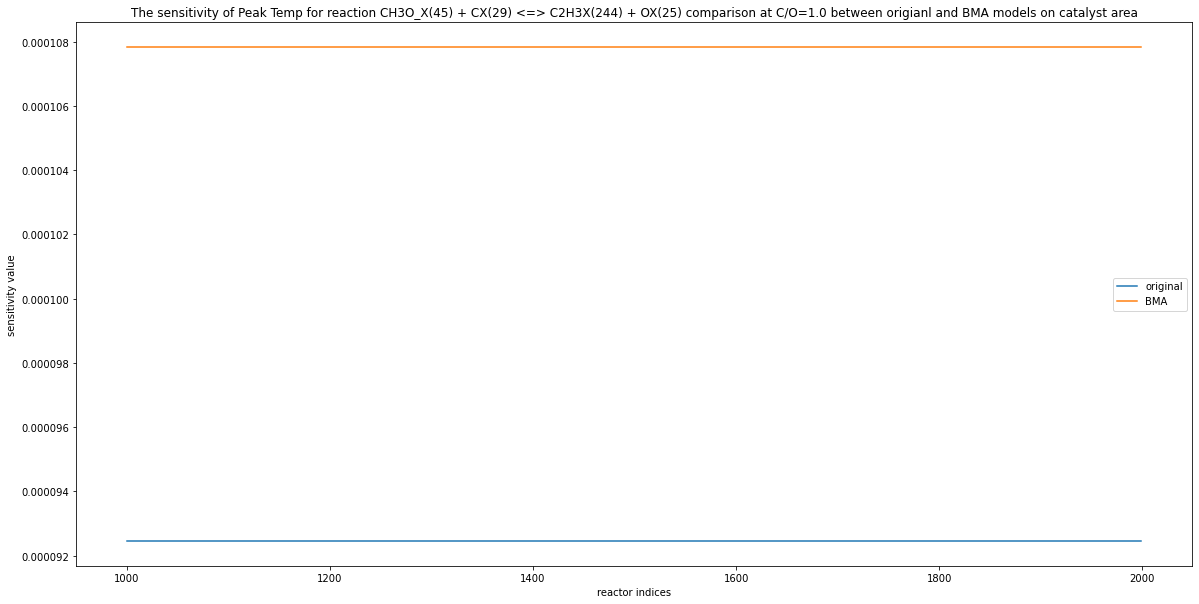

the absolute maximum index in original model is 1000, value =-1.4709336006804766e-05
the absolute maximum index in BMA model is 1000, value =-2.5123659524169445e-05


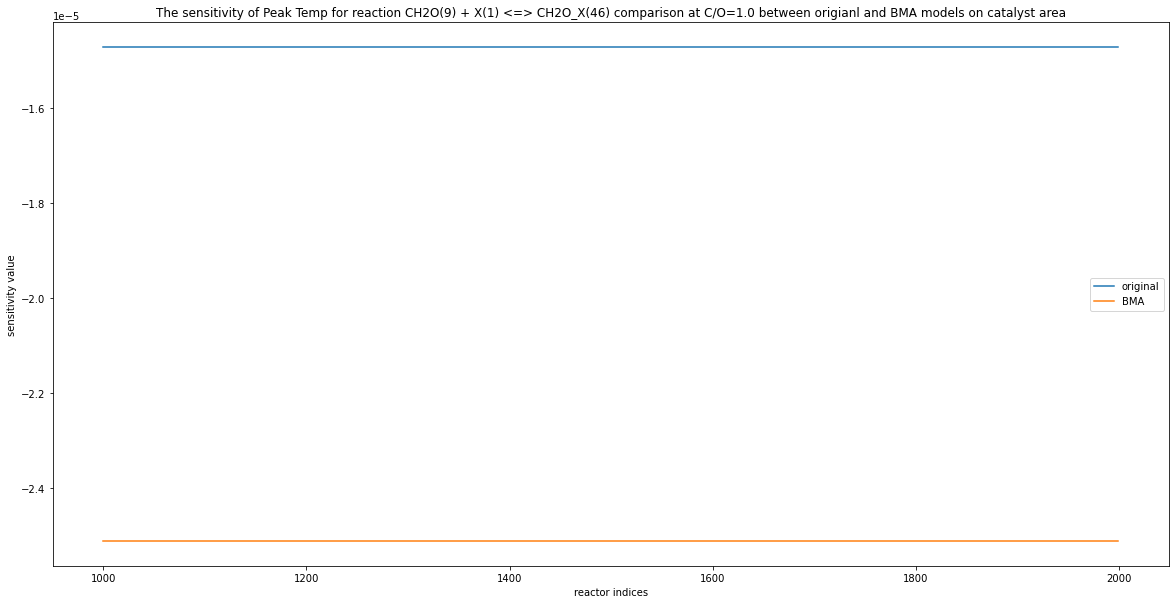

the absolute maximum index in original model is 1000, value =0.00013466278228264114
the absolute maximum index in BMA model is 1000, value =-5.8690927446474805e-05


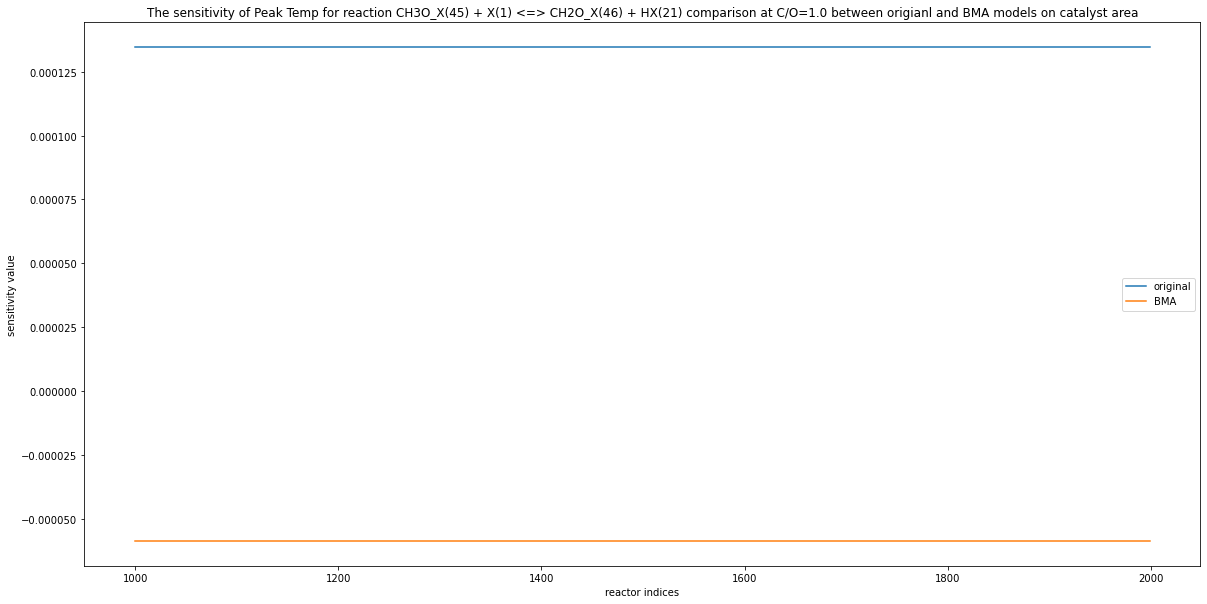

the absolute maximum index in original model is 1000, value =0.000114338707862057
the absolute maximum index in BMA model is 1000, value =-2.5140936746917543e-05


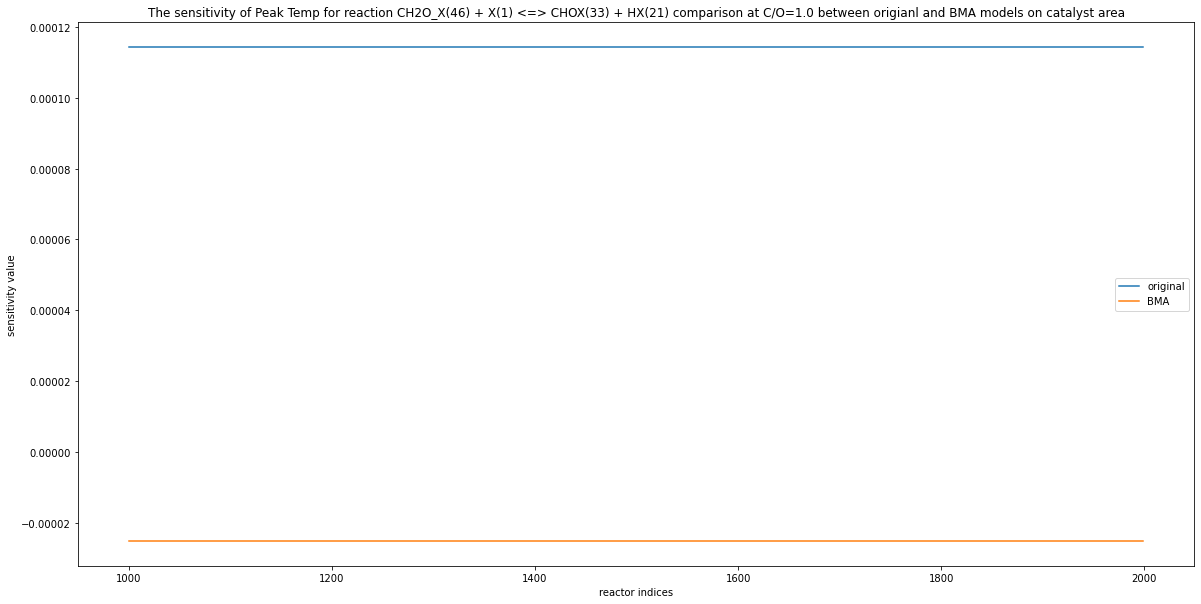

the absolute maximum index in original model is 1000, value =1.773711989396171e-05
the absolute maximum index in BMA model is 1000, value =7.80992014584821e-05


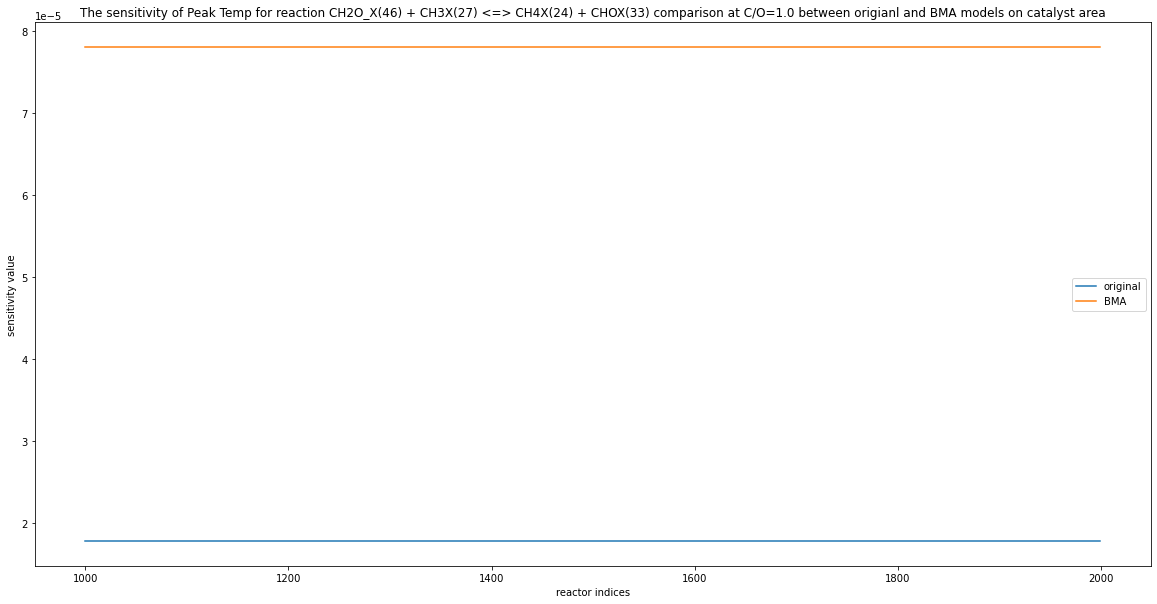

the absolute maximum index in original model is 1000, value =5.994734757381116e-05
the absolute maximum index in BMA model is 1000, value =2.9684020642541877e-05


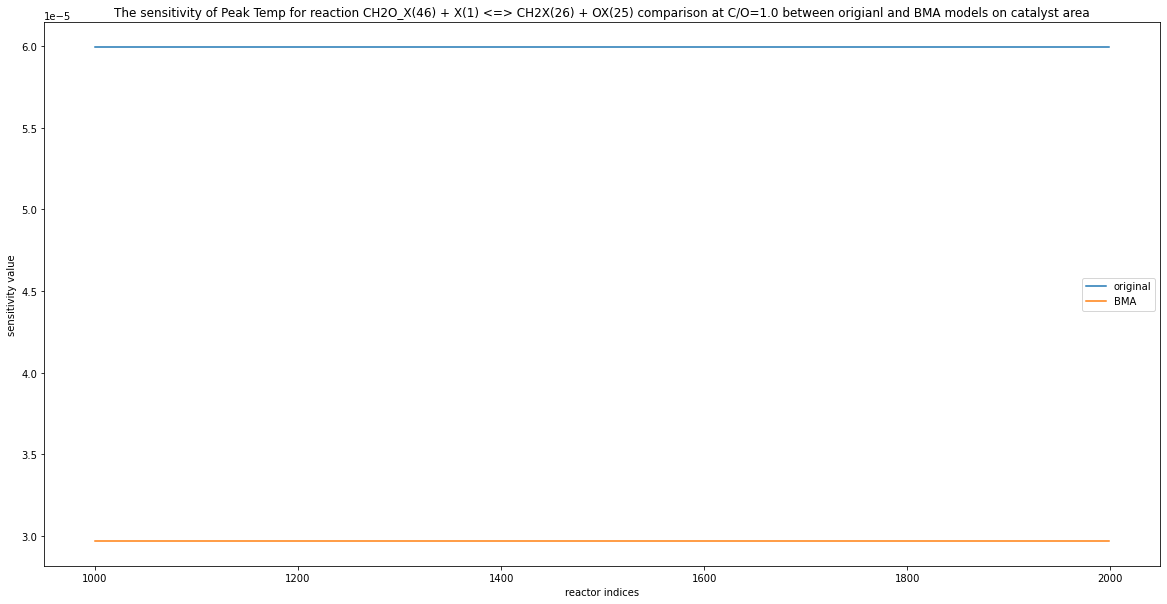

the absolute maximum index in original model is 1000, value =1.773658547161561e-05
the absolute maximum index in BMA model is 1000, value =-1.6863479406264897e-05


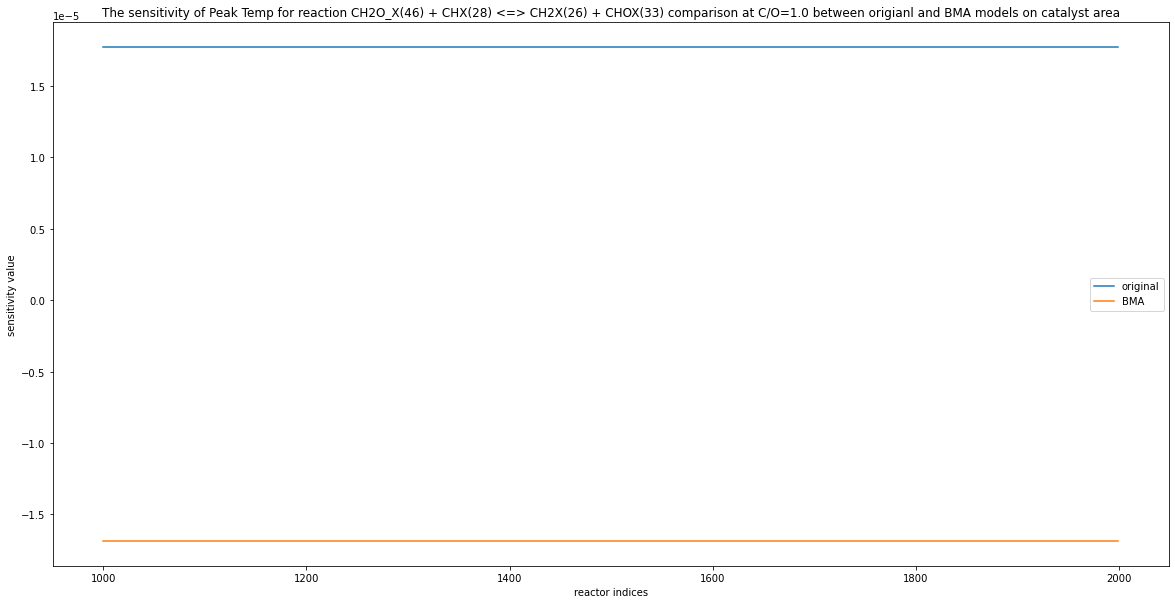

the absolute maximum index in original model is 1000, value =1.7735429877676027e-05
the absolute maximum index in BMA model is 1000, value =6.929503855644477e-05


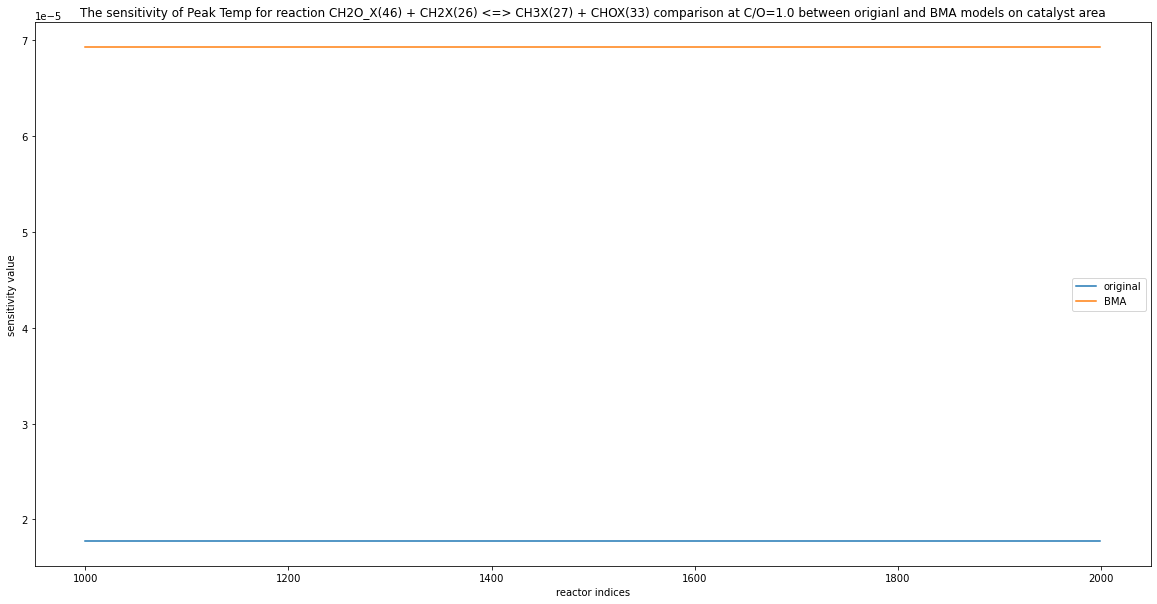

the absolute maximum index in original model is 1000, value =1.773580400128388e-05
the absolute maximum index in BMA model is 1000, value =2.7324095897006175e-05


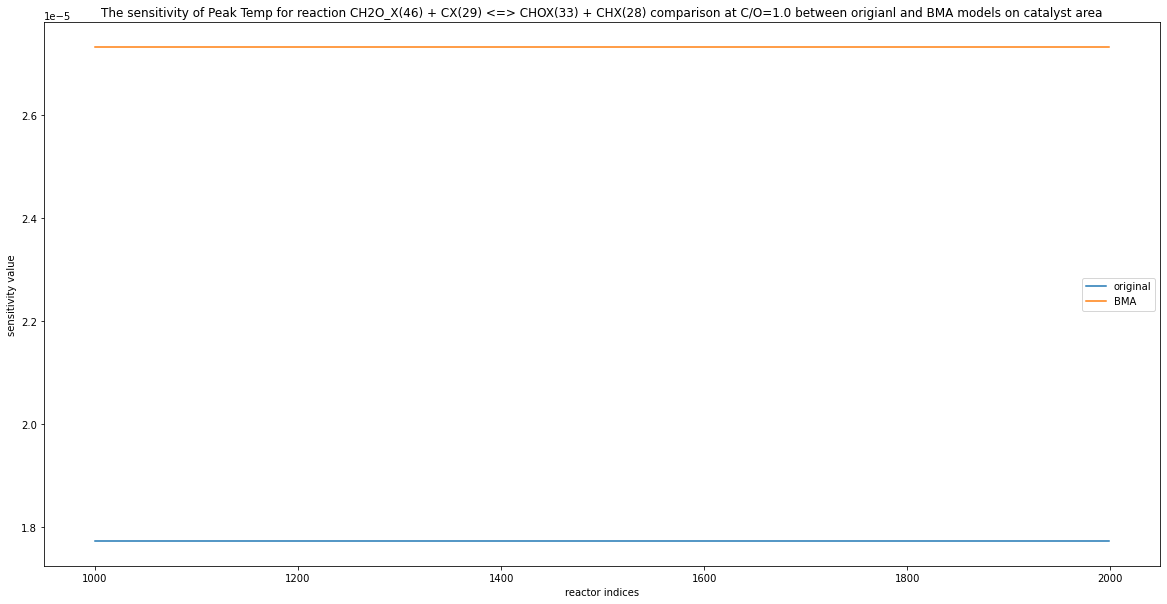

the absolute maximum index in original model is 1000, value =1.7735177609447693e-05
the absolute maximum index in BMA model is 1000, value =-1.4503352796245326e-05


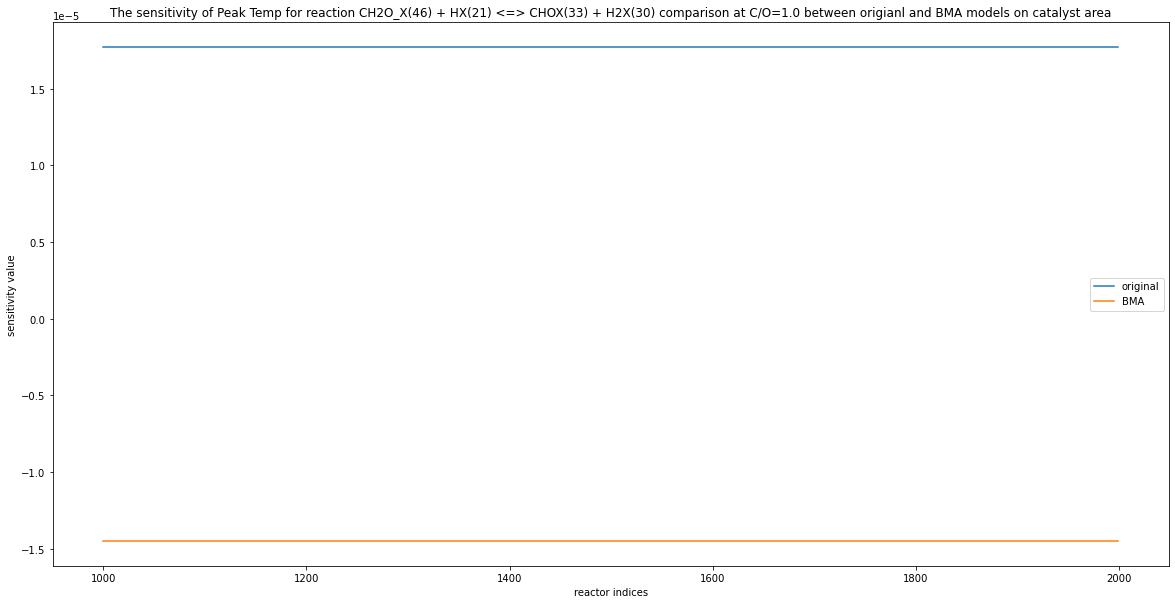

the absolute maximum index in original model is 1000, value =1.7736258852216298e-05
the absolute maximum index in BMA model is 1000, value =1.904634028427301e-05


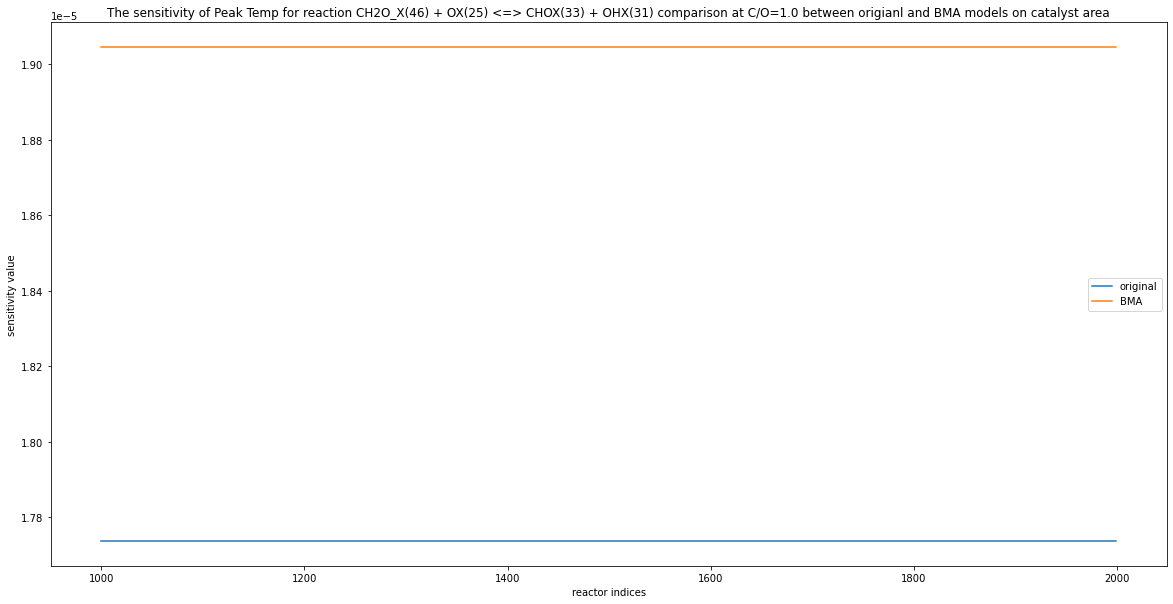

the absolute maximum index in original model is 1000, value =0.00013466268207262507
the absolute maximum index in BMA model is 1000, value =1.2610805138375122e-05


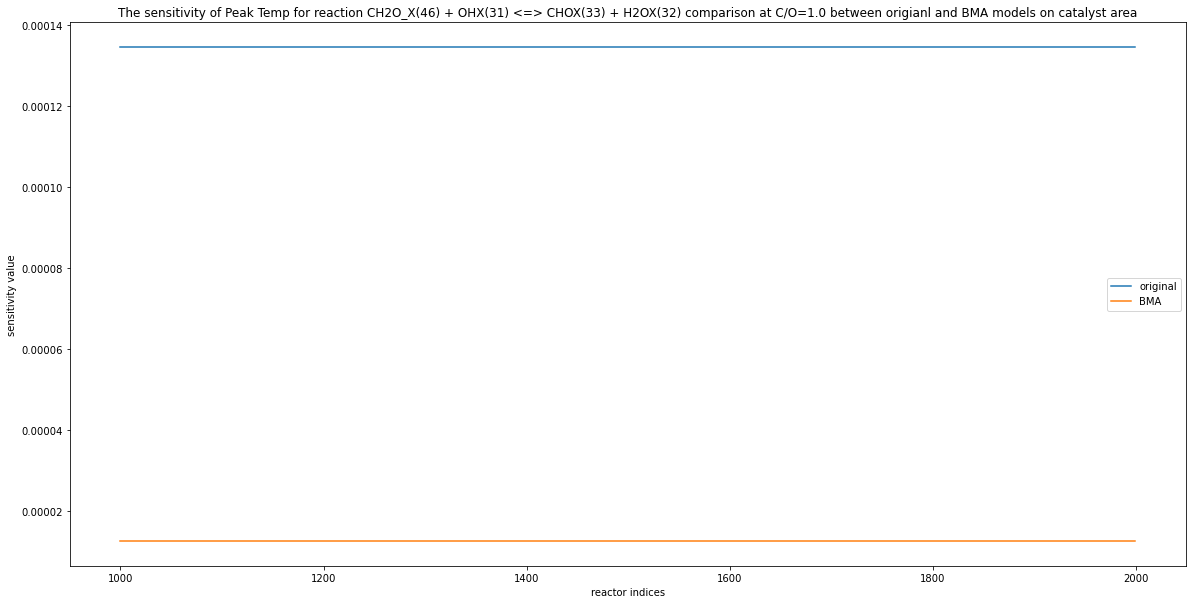

the absolute maximum index in original model is 1000, value =6.374153029950317e-05
the absolute maximum index in BMA model is 1000, value =2.732395970984768e-05


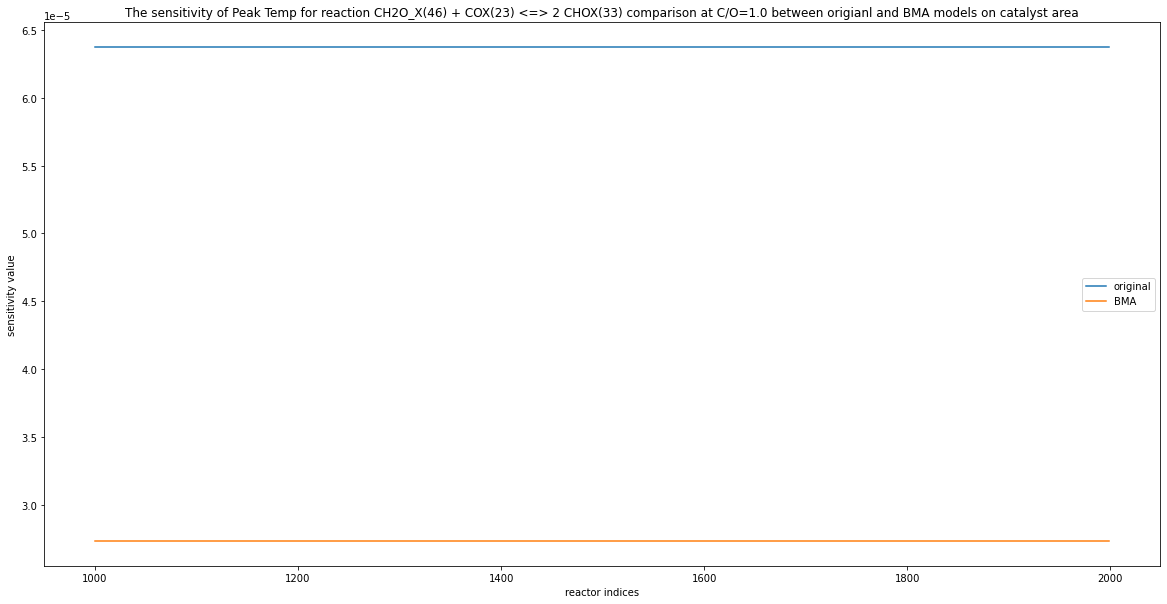

the absolute maximum index in original model is 1000, value =-1.4767161753782175e-05
the absolute maximum index in BMA model is 1000, value =5.7967845432111074e-05


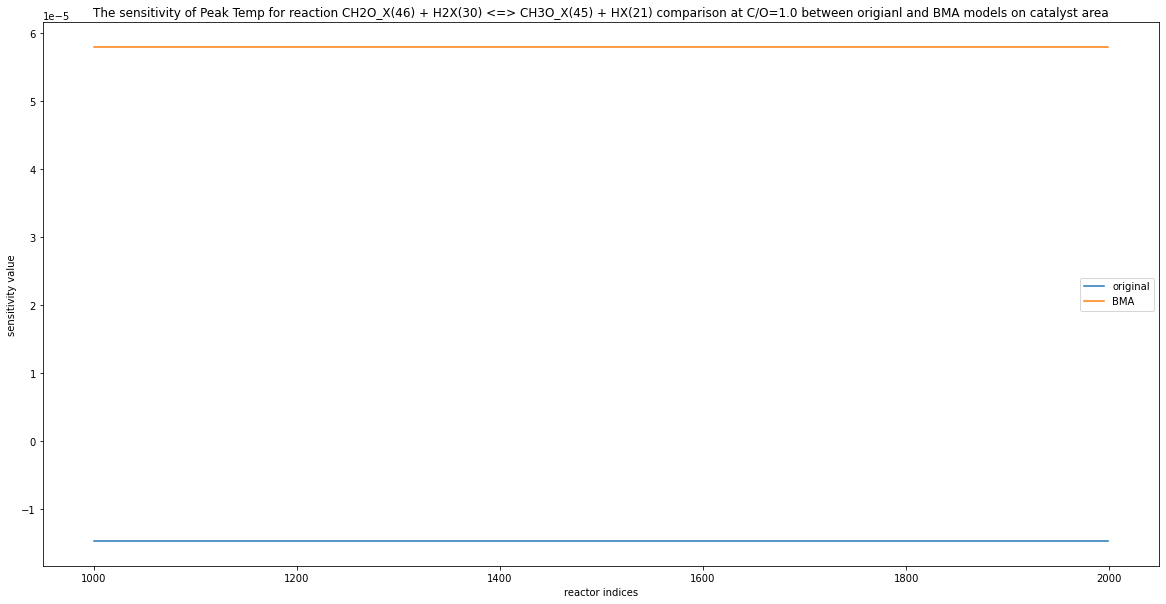

the absolute maximum index in original model is 1000, value =1.7275970626867027e-05
the absolute maximum index in BMA model is 1000, value =2.7230407397600564e-05


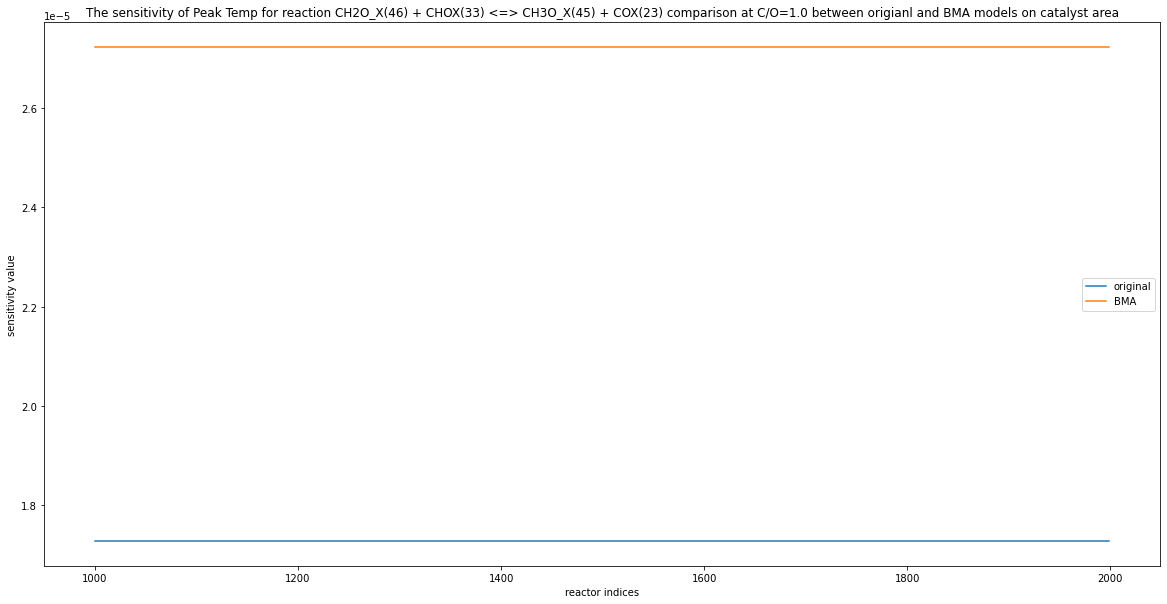

the absolute maximum index in original model is 1000, value =1.773609853483433e-05
the absolute maximum index in BMA model is 1000, value =7.809927864799775e-05


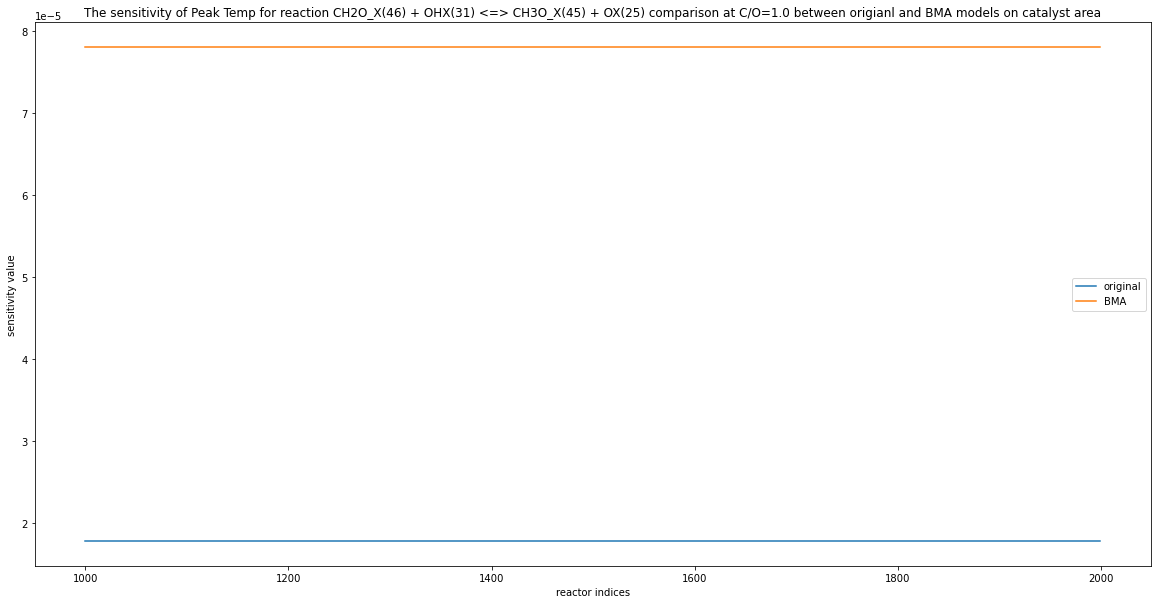

the absolute maximum index in original model is 1000, value =1.7735029857935652e-05
the absolute maximum index in BMA model is 1000, value =-1.6863274892298012e-05


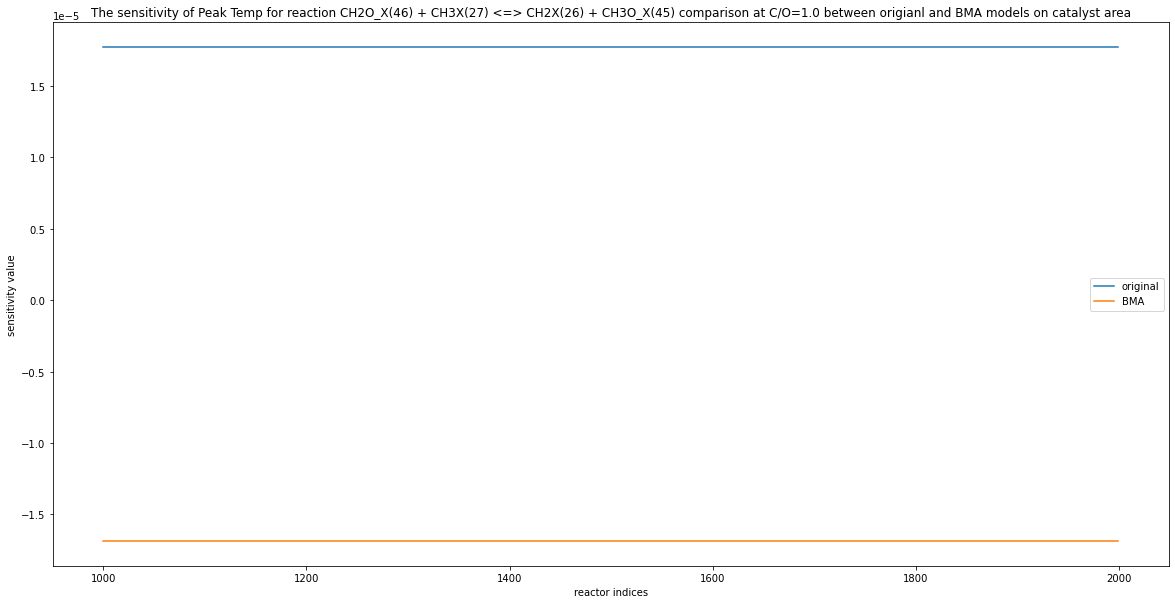

the absolute maximum index in original model is 1000, value =-1.4767374385453455e-05
the absolute maximum index in BMA model is 1000, value =1.904540348678653e-05


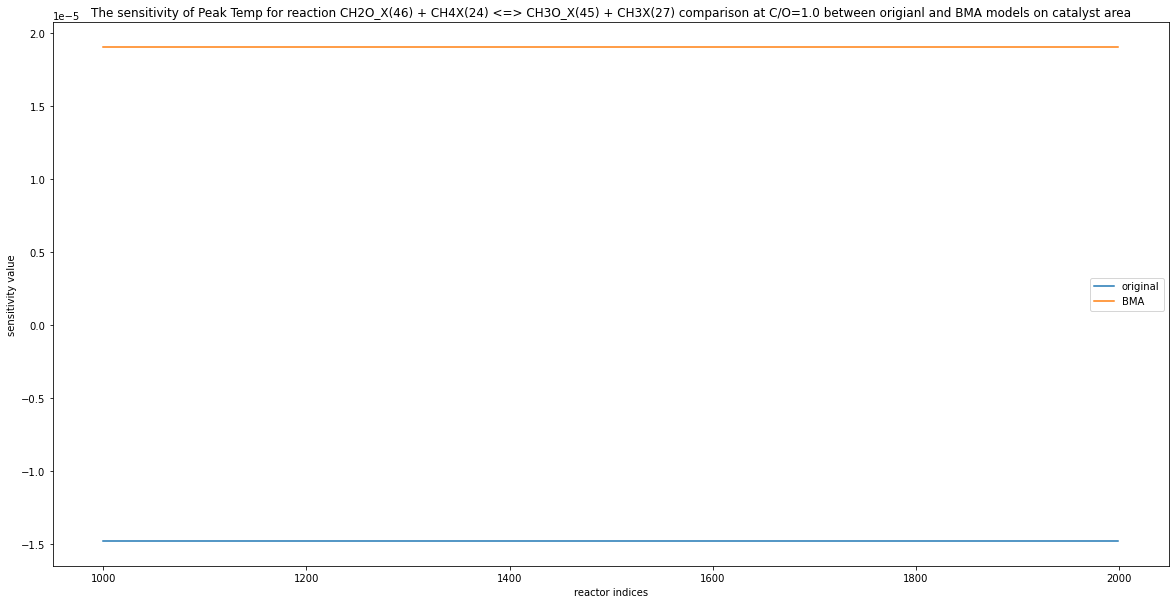

the absolute maximum index in original model is 1000, value =1.772981599139229e-05
the absolute maximum index in BMA model is 1000, value =-5.869146538481795e-05


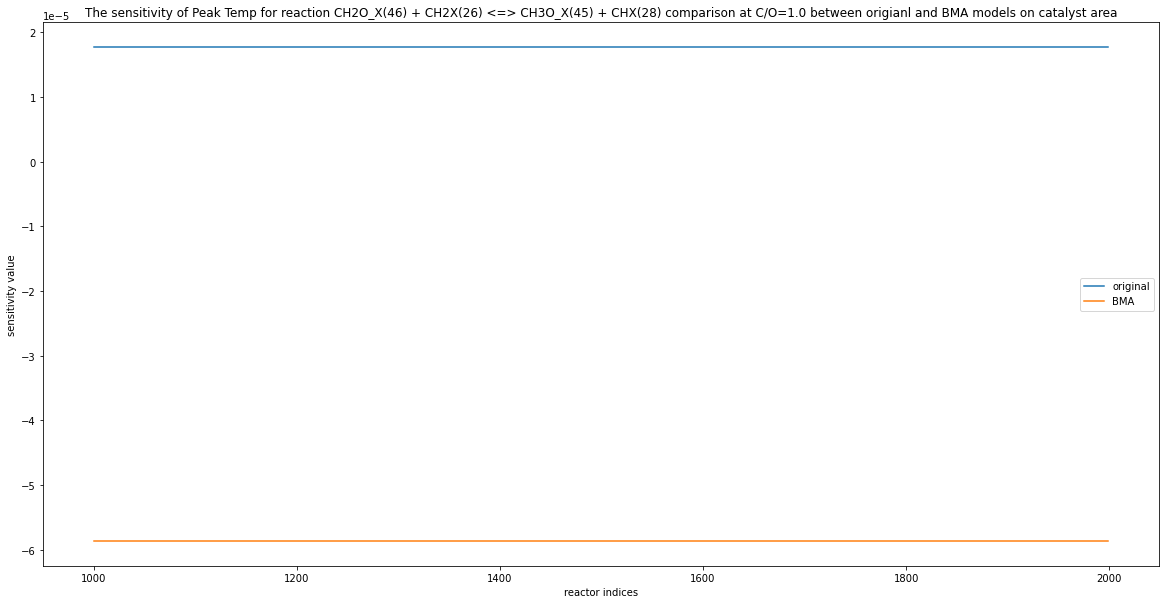

the absolute maximum index in original model is 1000, value =1.7665694333422793e-05
the absolute maximum index in BMA model is 1000, value =-1.4512338704464789e-05


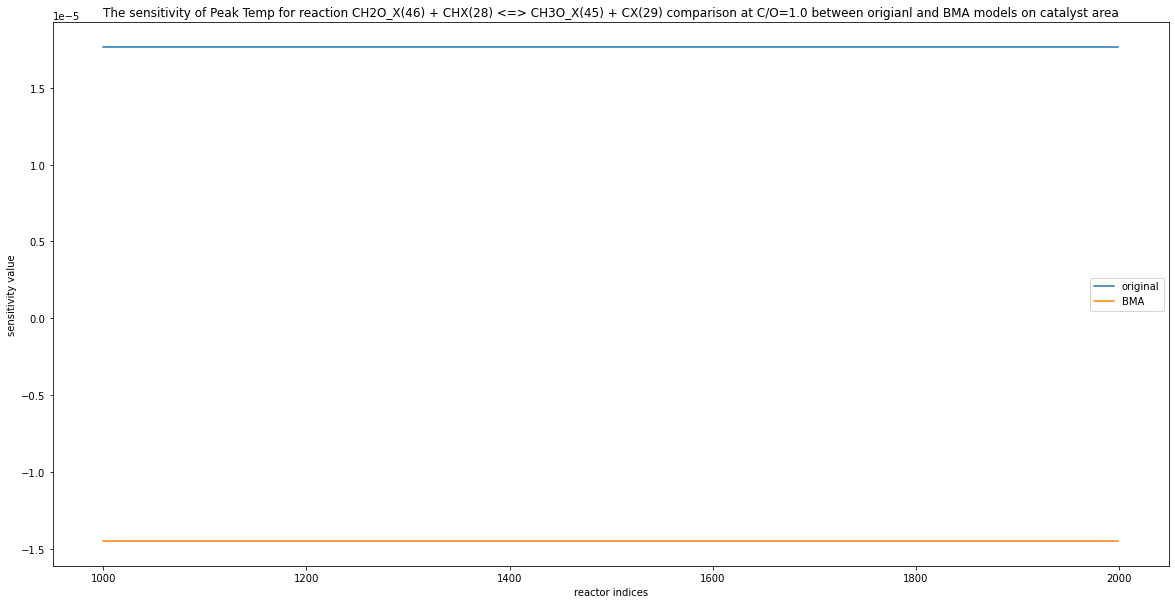

the absolute maximum index in original model is 1000, value =-1.4767299419039585e-05
the absolute maximum index in BMA model is 1000, value =4.967767956631505e-05


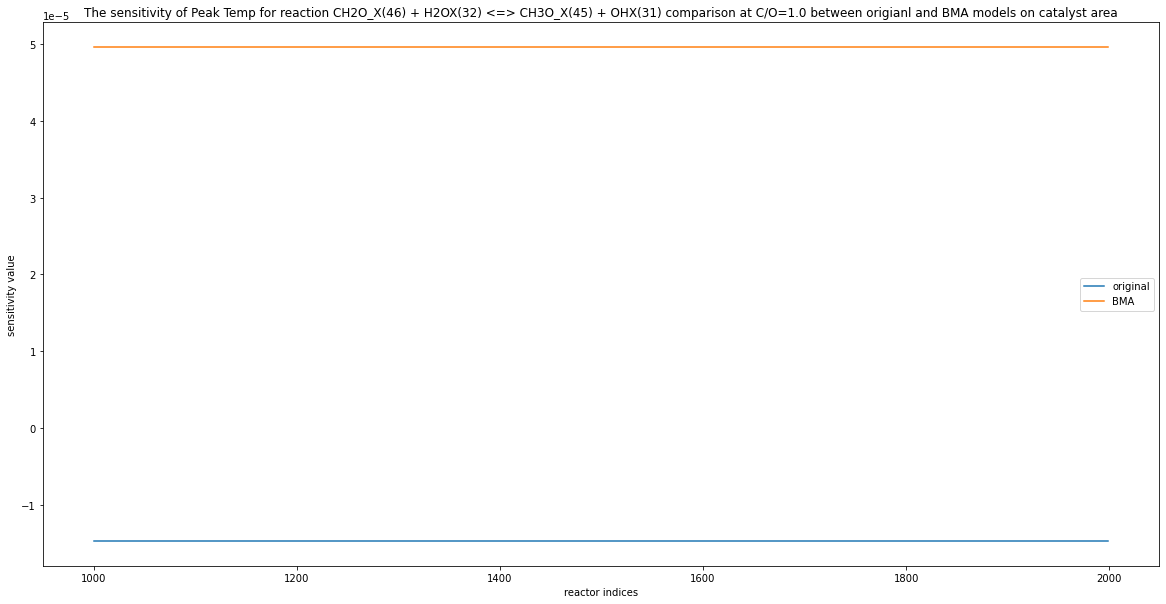

the absolute maximum index in original model is 1000, value =1.77356287875665e-05
the absolute maximum index in BMA model is 1000, value =5.679830213263069e-05


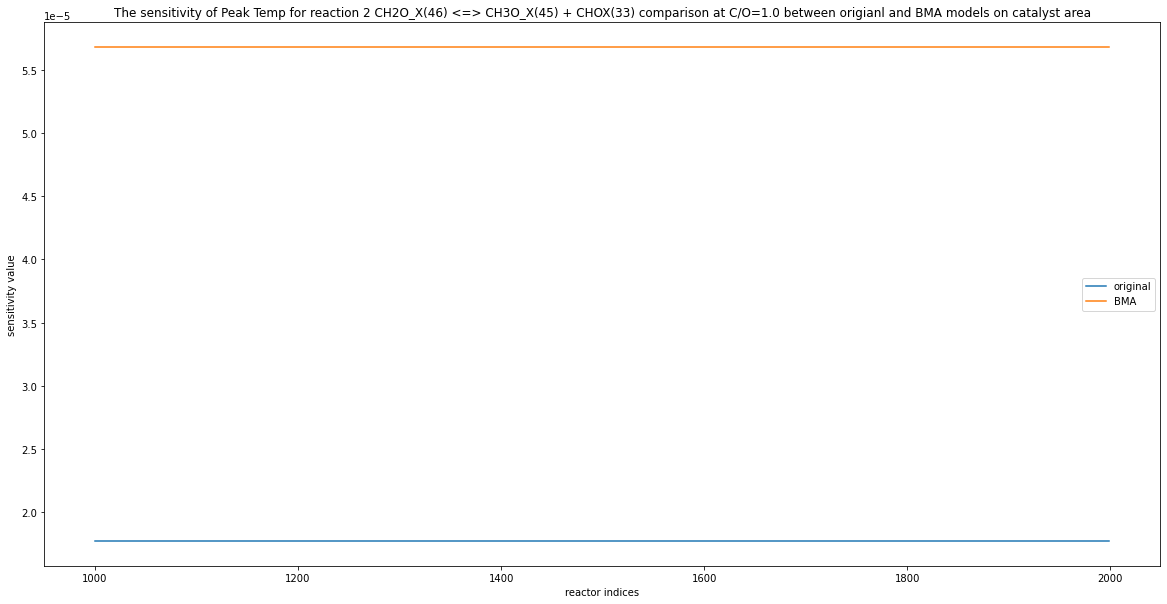

the absolute maximum index in original model is 1000, value =-1.4763926098208822e-05
the absolute maximum index in BMA model is 1000, value =-1.4497935331160119e-05


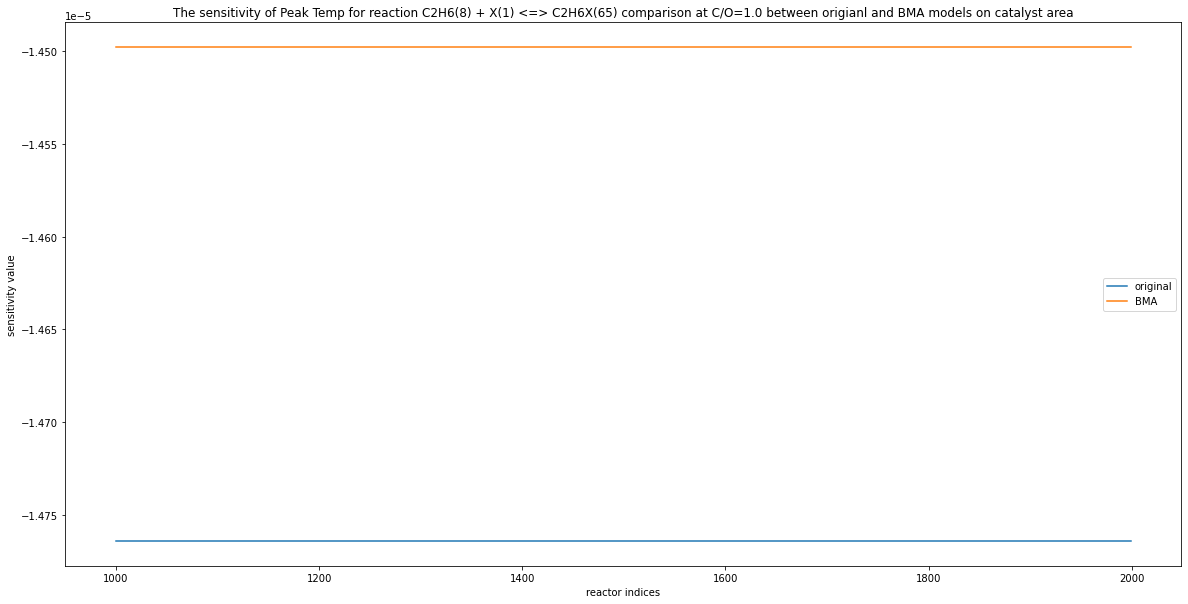

the absolute maximum index in original model is 1000, value =1.7736968301842534e-05
the absolute maximum index in BMA model is 1000, value =1.904337627777384e-05


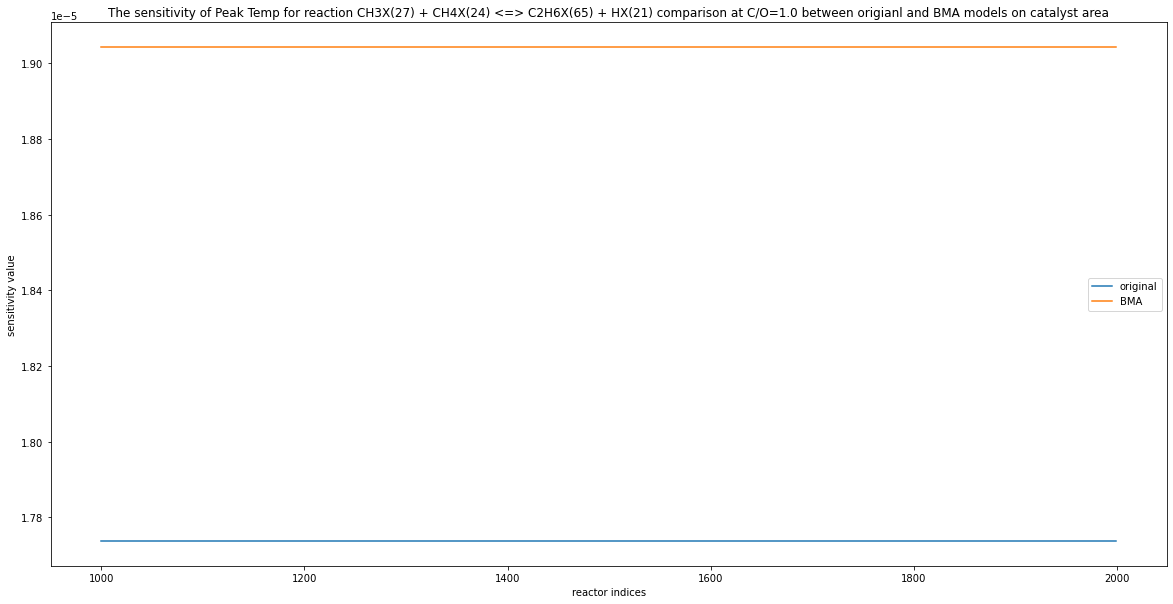

the absolute maximum index in original model is 1000, value =1.7735217078211227e-05
the absolute maximum index in BMA model is 1000, value =1.904542402960904e-05


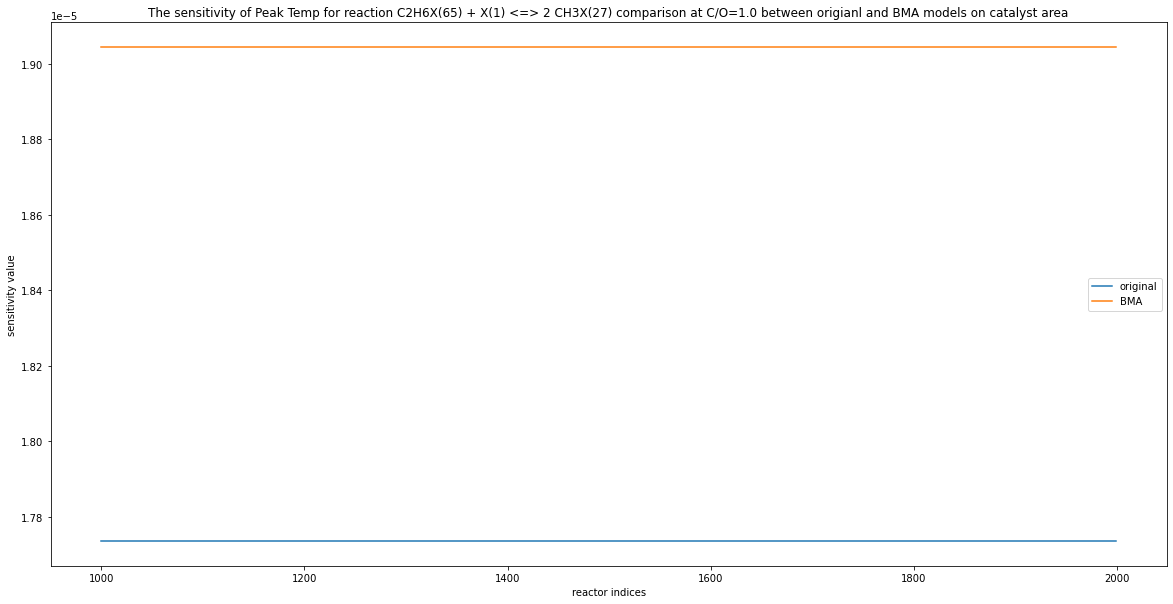

the absolute maximum index in original model is 1000, value =-1.477612254273988e-05
the absolute maximum index in BMA model is 1000, value =2.732283823220024e-05


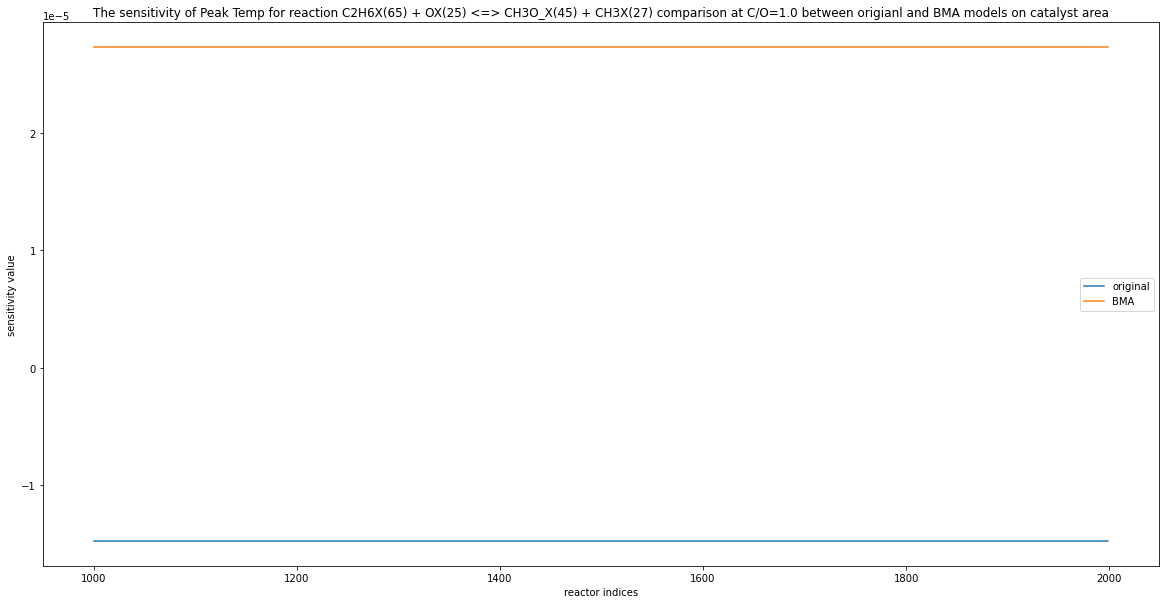

In [53]:
for i in range(107):
    compare_trends(1.0, i, 12)

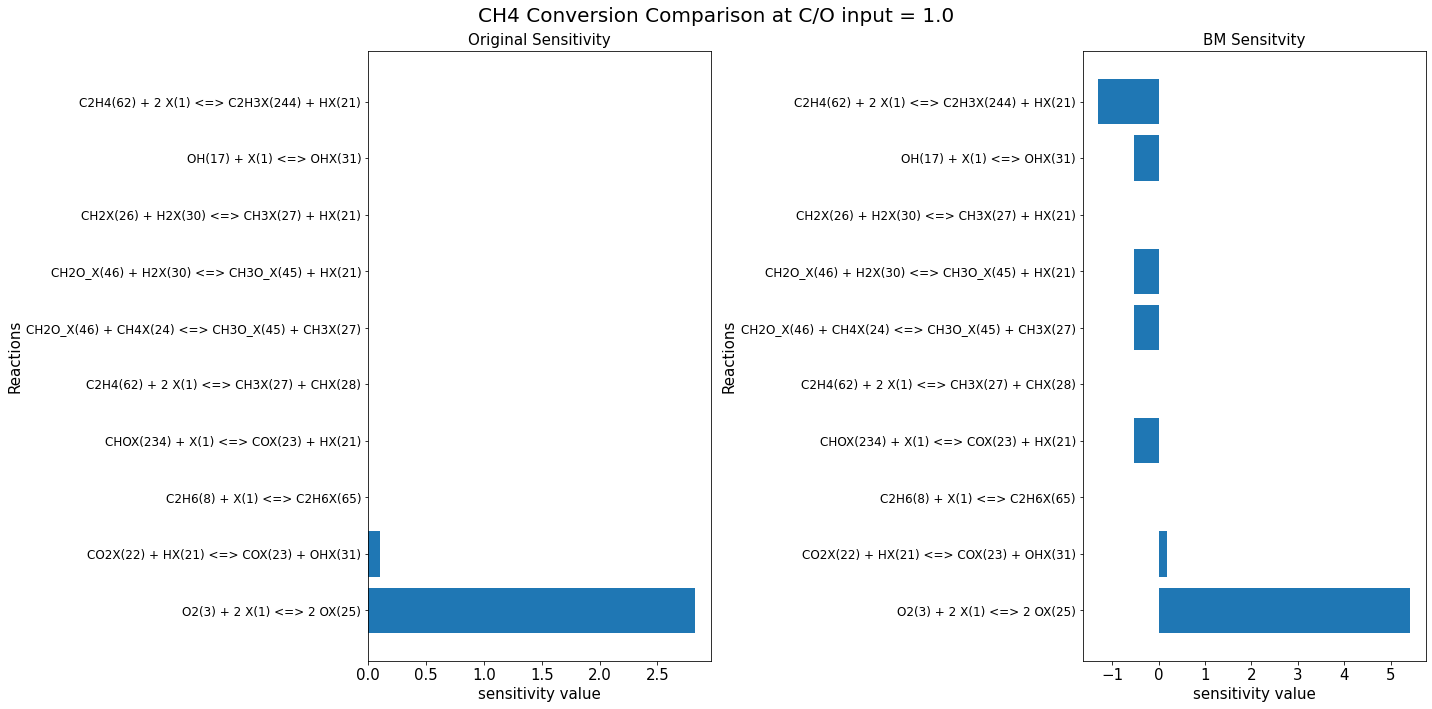